# Using Popup Class

## Import Classes and Connect

In [1]:
import warnings
warnings.filterwarnings("ignore", "Warning")

In [18]:
from arcgis.map import Map
from arcgis.map import popups
from arcgis.gis import GIS

gis = GIS(profile="your_online_admin_profile")

## Popups

### Pop-ups: Property of Web Maps

A [Web map](https://doc.arcgis.com/en/arcgis-online/reference/what-is-web-map.htm) or [Web scene](https://doc.arcgis.com/en/arcgis-online/reference/what-is-web-scene.htm) can show descriptive information about imagery and features configured to display when you click on the image or feature. A graphic appears as a pop-up, which can bring focus to the attributes associated with each layer in the map. Pop-ups can be minimal and straightforward, but can also be configured to display information in exciting ways through use of auxiliary elements such as attachments, images, charts, text, and they can even link to external web pages.

Popups are associated with individual layers on a Web map or scene. We can use the Popup class by calling the `popup` method on the _MapContent_ objecta and specifying which layer we will edit based on the index position within the map.  See [Configure pop-ups](https://doc.arcgis.com/en/arcgis-online/create-maps/configure-pop-ups-mv.htm) and 
[View pop-ups](https://doc.arcgis.com/en/arcgis-online/create-maps/configure-pop-ups-mv.htm) for detailed information on managing popups in ArcGIS Online.  

### Enable pop-ups

Before pop-ups can be managed with the Python API, the layer must be enabled for popups in a Web map. By default, when you add a Feature Layer to a map in the ArcGIS Online Map Viwer, the layer is enabled for pop-ups. Within the Python API, you can inspect the definition of the Web Map item using the [get_data()](/api-reference/arcgis.gis.toc.html#arcgis.gis.Item.get_data) method to return a Python dictionary representation of the web map and check if there is a `popupInfo` configured for the operational layer you want to work with. If not, you'll have to open the Web map in the ArcGIS Online Map Viewer and enable pop-ups for the layer.

<Item title:"World Countries 2022-01-06 16:33pm" type:Web Map owner:arcgis_python>
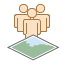

In [4]:
wm_item = gis.content.get("1acd741888ae44188eba04945307b408")
wm_item

In [5]:
op_layers_list = wm_item.get_data()["operationalLayers"]
for layer in op_layers_list:
    if layer.get("popupInfo"):
        print(f"{layer['title']} -> Configured")
    else:
        print(f"{layer['title']} -> No Pop-up")

World_Countries -> Configured


The World_Countries layer in the Web map we retrieved has been configured for pop-ups.

### Editing a Popup Dataclass

Let's initialize a _Map_ object from this web map to examine pop-up representation in the Python API. After the map widget appears, click on a feature and the pop-up will appear:

In [ ]:
m = Map(
    item=wm_item
)
m


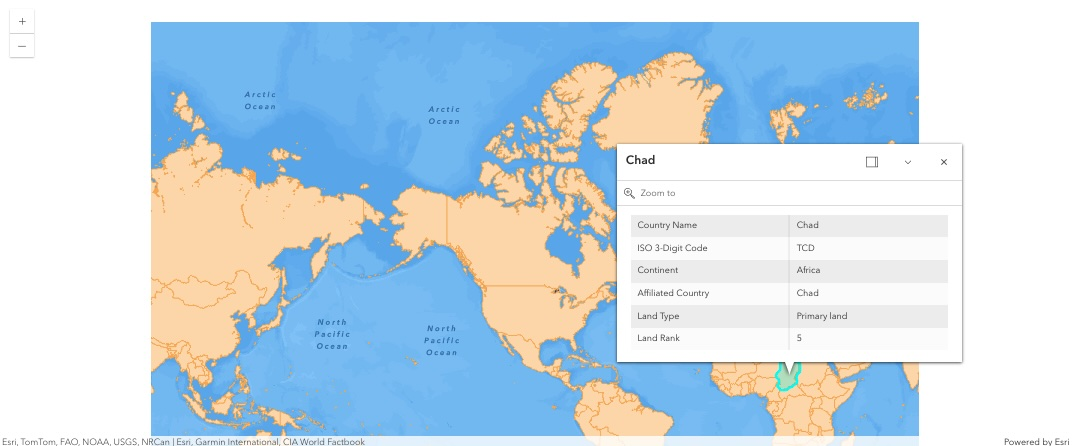

In [6]:
from IPython.display import Image
Image(url="data:image/jpeg;base64,/9j/4QDoRXhpZgAATU0AKgAAAAgABgESAAMAAAABAAEAAAEaAAUAAAABAAAAVgEbAAUAAAABAAAAXgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAZgAAAAAAAABIAAAAAQAAAEgAAAABAAiQAAAHAAAABDAyMjGRAQAHAAAABAECAwCShgAHAAAAEgAAAMygAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAABDCgAwAEAAAAAQAAAb6kBgADAAAAAQAAAAAAAAAAQVNDSUkAAABTY3JlZW5zaG90AAD/4gIUSUNDX1BST0ZJTEUAAQEAAAIEYXBwbAQAAABtbnRyUkdCIFhZWiAH6AAIABIACAA0ACphY3NwQVBQTAAAAABBUFBMAAAAAAAAAAAAAAAAAAAAAAAA9tYAAQAAAADTLWFwcGzOWzw1oOlmYd/YZqOn/QdOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAApkZXNjAAAA/AAAACpjcHJ0AAABKAAAAFB3dHB0AAABeAAAABRyWFlaAAABjAAAABRnWFlaAAABoAAAABRiWFlaAAABtAAAABRyVFJDAAAByAAAABBjaGFkAAAB2AAAACxiVFJDAAAByAAAABBnVFJDAAAByAAAABBtbHVjAAAAAAAAAAEAAAAMZW5VUwAAAA4AAAAcAEwAQwAyADcAVAA1ADUAAG1sdWMAAAAAAAAAAQAAAAxlblVTAAAANAAAABwAQwBvAHAAeQByAGkAZwBoAHQAIABBAHAAcABsAGUAIABJAG4AYwAuACwAIAAyADAAMgA0WFlaIAAAAAAAAPbWAAEAAAAA0y1YWVogAAAAAAAAahYAADMZAAAA/FhZWiAAAAAAAABqVAAArmkAACK6WFlaIAAAAAAAACJtAAAefgAAr3dwYXJhAAAAAAAAAAAAAfYEc2YzMgAAAAAAASVZAAAS+v//9O8AABv7AADtyP//+xn///+O////qQAA6EX/2wCEAAEBAQEBAQIBAQIDAgICAwQDAwMDBAYEBAQEBAYHBgYGBgYGBwcHBwcHBwcICAgICAgJCQkJCQsLCwsLCwsLCwsBAgICAwMDBQMDBQsIBggLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLCwsLC//dAAQAQ//AABEIAb4EMAMBIgACEQEDEQH/xAGiAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgsQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+gEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoLEQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP7+KKKzNNb7TbGSYBj5kq9OyuQP0FAGnRUfkxf3R+VHkxf3R+VAElFZ1lIzXN1EfuxyBVHoNin+taNABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//0P7+KytG/wCPI/8AXWb/ANGNWrWVo3/Hkf8ArrN/6MagD55/aQ+LPj/4aaPYHwV4Z1XUvP1XQoXvrJtP8kR3ep29vLblbq6ik3yRMUDCPavmKd6kEr9BeHtTvdZ0aDU9R0640ieZctZ3ZiaaLnGGMEksXv8AK7DH5VfvLGy1CIW9/Ck8aukgWRQwDxMHRsHurKGU9iAR0q1QBlWH/H7ff9dV/wDRaVq1lWH/AB+33/XVf/RaVq0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZOva3pfhnQ7zxJrcvkWWnwSXNxJtLbIolLMcKCThR0Az6V80/wDDbn7MH/Qzf+SV3/8AGa9W+O//ACQ/xl/2AtR/9J3r+aWvuOE+GcLmdKpOvKS5WkuWy6eaZ8PxXxLissq06eHjFqSvqn+jR/QJ/wANufswf9DN/wCSV3/8Zo/4bc/Zg/6Gb/ySu/8A4zX8/dFfWf8AEPMu/wCfk/vj/wDInyf/ABEPMf8An3T+6X/yR/QJ/wANufswf9DN/wCSV3/8Zo/4bc/Zg/6Gb/ySu/8A4zX8/dFH/EPMu/5+T++P/wAiH/EQ8x/590/ul/8AJH9An/Dbn7MH/Qzf+SV3/wDGaP8Ahtz9mD/oZv8AySu//jNfz90Uf8Q8y7/n5P74/wDyIf8AEQ8x/wCfdP7pf/JH9An/AA25+zB/0M3/AJJXf/xmj/htz9mD/oZv/JK7/wDjNfz90Uf8Q8y7/n5P74//ACIf8RDzH/n3T+6X/wAkf0Cf8Nufswf9DN/5JXf/AMZo/wCG3P2YP+hm/wDJK7/+M1/P3RR/xDzLv+fk/vj/APIh/wARDzH/AJ90/ul/8kf0Cf8ADbn7MH/Qzf8Akld//GaP+G3P2YP+hm/8krv/AOM1/P3RR/xDzLv+fk/vj/8AIh/xEPMf+fdP7pf/ACR/QJ/w25+zB/0M3/kld/8Axmj/AIbc/Zg/6Gb/AMkrv/4zX8/dFH/EPMu/5+T++P8A8iH/ABEPMf8An3T+6X/yR/QJ/wANufswf9DN/wCSV3/8Zpj/ALcH7LsS7n8T4H/Xld//ABmv5/qa2NpzjGO/Sj/iHmW/8/J/fH/5EP8AiIeY/wDPun90v/kj99X/AG8v2UIm2P4qwf8ArxvP/jFQv+3z+yZGu5vFeB/14Xn/AMYr+di+twR5yDnv9KyCAwwRkV0x8Nsrf/Lyp98f/kDN+IuZf8+6f3S/+SP6Q4f28/2ULj/VeKs8Z/48bwf+0Ktx/ty/stSNsTxRz/15Xf8A8Zr+cPT2gj+U8MeAPauisTi4Ax1qJ+HGWrapU++P/wAgNeIuZf8APun90v8A5I/oh/4bc/Zg/wChm/8AJK7/APjNH/Dbn7MH/Qzf+SV3/wDGa/n7orH/AIh5l3/Pyf3x/wDkS/8AiIeY/wDPun90v/kj+gT/AIbc/Zg/6Gb/AMkrv/4zUUn7cX7LkIBk8T4H/Xld/wDxmvwAqKWJZYyjf/qoXh5lv/Pyf3x/+RD/AIiHmP8Az7p/dL/5I/f/AP4bp/ZX/wChp/8AJG7/APjFIf26/wBlVRlvFOB/15Xf/wAYr+d6ozEjHLDPsen5Vr/xDnLP+flT74//ACBP/ERMy/590/ul/wDJH9Dn/De37J3/AENf/kjef/GKP+G9v2Tv+hr/APJG8/8AjFfzpNZwy5Nsw47dqzmUoxQ9uK0Xhvlf/Pyp98f/AJAn/iIuZf8APun90v8A5I/o+/4b2/ZO/wChr/8AJG8/+MUD9vX9k4nA8V/+SF5/8Yr+b+rtgF8/nsOKH4bZYv8Al5U++P8A8gL/AIiNmX/Pun90v/kj+j3/AIbp/ZX/AOhp/wDJG7/+MVXb9vP9k9G2N4r5H/Tjef8Axiv55apPYwu5fkZ9KheHOWdalT74/wDyBX/ERMy/590/ul/8kf0WR/t2/sqSruj8VZH/AF43f/xin/8ADdP7K/8A0NP/AJI3f/xiv52kjSMYQYB5pJSViZl6gUv+IcZZ0qVPvj/8gH/ERMy/590/ul/8kf0Tf8N0/sr/APQ0/wDkjd//ABij/hun9lf/AKGn/wAkbv8A+MV/OhYMzQfN2OBV2h+HGWr/AJeVPvj/APIB/wARFzL/AJ90/ul/8kf0OSft4fsowkCTxVj/ALcbz/4xUf8Aw3t+yd/0Nf8A5I3n/wAYr+dKa1uJ5DJjHYAntUtxZGWXzFOM9av/AIhvlf8Az8qffH/5AX/ERcy/590/ul/8kf0WR/t4/spSnEfirP8A243n/wAYp0n7d37KcS7pPFWB0/48bz/4xX87sUSRJsTpT8A8Gp/4hzln/Pyp98f/AJAf/ERMy/590/ul/wDJH9DP/Dev7Jw4Piv/AMkLz/4xR/w3t+yd/wBDX/5I3n/xiv54pIY5QBIM4qrcWavGPJABX9aa8OMr/wCflT74/wDyAf8AERcy/wCfdP7pf/JH9E//AA3t+yd/0Nf/AJI3n/xij/hvb9k7/oa//JG8/wDjFfzhPG0Zw2KZV/8AENss/wCflT74/wDyBP8AxEbMv+fdP7pf/JH9IH/De37J3/Q1/wDkjef/ABij/hvb9k7/AKGv/wAkbz/4xX839FH/ABDXLP8An5U++P8A8gH/ABEbMv8An3T+6X/yR/SB/wAN7fsnf9DX/wCSN5/8Yo/4b2/ZO/6Gv/yRvP8A4xX839TrKm3y2QY9R1o/4hrln/Pyp98f/kA/4iNmX/Pun90v/kj+jn/hvb9k7/oa/wDyRvP/AIxSr+3p+yexCr4r5PH/AB43n/xiv5x5IYgnmROCPQ9agRijBh2pf8Q2yz/n5U++P/yA/wDiI2Zf8+6f3S/+SP6SP+G6f2V/+hp/8kbv/wCMVWP7en7J6nafFfI4/wCPG8/+MV/Ob/aE3otUCSTk0l4bZb1qVPvj/wDIB/xEbMf+fdP7pf8AyR/SB/w3t+yd/wBDX/5I3n/ximP+3z+yZGu5vFeB/wBeF5/8Yr+cKmSIJEKHvVf8Q1yz/n5U++P/AMgL/iI2Zf8APun90v8A5I/o7/4eAfsjf9Db/wCSF7/8Yo/4eAfsjf8AQ2/+SF7/APGK/mo2kNsxz0pAM8Ctf+IZZX/z8qffH/5An/iJGZf8+6f3S/8Akj+lj/h4B+yN/wBDb/5IXv8A8Yo/4eAfsjf9Db/5IXv/AMYr+bVLJj984+laEOl7lDqm4e5qH4a5Uv8Al7U++P8A8gNeI2Z/8+6f3S/+SP6Pk/b6/ZLkGU8WdP8ApwvP/jFWo/27v2U5V3R+Ksjp/wAeN5/8Yr+cy209VX98Mf7IrTVVRQiDAFZPw4yvpUqffH/5AteIuZf8+6f3S/8Akj+iT/hun9lf/oaf/JG7/wDjFH/DdP7K/wD0NP8A5I3f/wAYr+d2ip/4hzlv/Pyp98f/AJAf/ERMy/590/ul/wDJH9EX/DdP7K//AENP/kjd/wDxikP7df7KyruPingf9ON3/wDGK/neqreNst2xxniheHGW/wDPyp98f/kBf8RFzL/n3T+6X/yR/RF/w3t+yd/0Nf8A5I3n/wAYo/4b2/ZO/wChr/8AJG8/+MV/N1LKkIBb9KcJEKeYOla/8Q1yz/n5U++P/wAgT/xEbMv+fdP7pf8AyR/SH/w3t+yd/wBDX/5I3n/xikP7e/7JqjJ8V8D/AKcLz/4xX83yNvUMOM0yYgRNnjij/iGuWf8APyp98f8A5AP+IjZl/wA+6f3S/wDkj+j5f2/v2SGIVfFnP/Xhe/8AxitaL9uL9l2aMSR+J/lPT/Qbsf8AtCv5nrLAJOD9e1euwRmKJY2OSKit4cZZDapU++P/AMgOHiLmT/5d0/ul/wDJH9BP/Dbn7MH/AEM3/kld/wDxmj/htz9mD/oZv/JK7/8AjNfz90Vh/wAQ8y7/AJ+T++P/AMiaf8RDzH/n3T+6X/yR/QJ/w25+zB/0M3/kld//ABmj/htz9mD/AKGb/wAkrv8A+M1/P3RR/wAQ8y7/AJ+T++P/AMiH/EQ8x/590/ul/wDJH9An/Dbn7MH/AEM3/kld/wDxmj/htz9mD/oZv/JK7/8AjNfz90Uf8Q8y7/n5P74//Ih/xEPMf+fdP7pf/JH9An/Dbn7MH/Qzf+SV3/8AGaP+G3P2YP8AoZv/ACSu/wD4zX8/dFH/ABDzLv8An5P74/8AyIf8RDzH/n3T+6X/AMkf0Cf8Nufswf8AQzf+SV3/APGaP+G3P2YP+hm/8krv/wCM1/P3RR/xDzLv+fk/vj/8iH/EQ8x/590/ul/8kf0Cf8Nufswf9DN/5JXf/wAZo/4bc/Zg/wChm/8AJK7/APjNfz90Uf8AEPMu/wCfk/vj/wDIh/xEPMf+fdP7pf8AyR/QJ/w25+zB/wBDN/5JXf8A8Zo/4bc/Zg/6Gb/ySu//AIzX8/dFH/EPMu/5+T++P/yIf8RDzH/n3T+6X/yR/QJ/w25+zB/0M3/kld//ABmj/htz9mD/AKGb/wAkrv8A+M1/P3RR/wAQ8y7/AJ+T++P/AMiH/EQ8x/590/ul/wDJH9An/Dbn7MH/AEM3/kld/wDxmj/htz9mD/oZv/JK7/8AjNfz90Uf8Q8y7/n5P74//Ih/xEPMf+fdP7pf/JH9An/Dbn7MH/Qzf+SV3/8AGaP+G3P2YP8AoZv/ACSu/wD4zX8/dFH/ABDzLv8An5P74/8AyIf8RDzH/n3T+6X/AMkf0Cf8Nufswf8AQzf+SV3/APGaP+G3P2YP+hm/8krv/wCM1/P3RR/xDzLv+fk/vj/8iH/EQ8x/590/ul/8kf0Cf8Nufswf9DN/5JXf/wAZo/4bc/Zg/wChm/8AJK7/APjNfz90Uf8AEPMu/wCfk/vj/wDIh/xEPMf+fdP7pf8AyR/QzoP7YP7OnibXLLw3ofiLzr3UJ47a3j+yXK75ZWCouWiCjJIGSQBX0vX80vwI/wCS4eDP+w5p3/pQlf0tV8PxXkWHyyrTp4dtqSvrb9Ej7jhPPa+Z0qk68YrlaS5U1082wooor5M+sCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9H+/iuHtfC2maisl5cS3au8suRFeTxJw5HCJIqjp2FdxWVo3/Hkf+us3/oxqAMX/hCNG/57X/8A4MLr/wCO0f8ACEaN/wA9r/8A8GF1/wDHa5bxR8Y/DnhLWpdB1DTdduJYQuXstFvryA7lBG2WCB42xnBw3B47V3nhvX7TxRokGvWMNzbxXAO2O8t5LSYbSV+aKZUdenGVGRg9MUARaBYw6a13ZW5kZElGDLI0rcop5ZyWP4njp0roayrD/j9vv+uq/wDotK1aACiiigAooooAKKKKACiiigAooooAKKKKAPKfjv8A8kP8Zf8AYC1H/wBJ3r+aWv6Wvjv/AMkP8Zf9gLUf/Sd6/mlr9a8Of92r/wCJfkfkviL/ALxQ/wAL/MKKKK/Rj85CiiigAooooAKKKKACiiigAooooAKKKKACqV+xWDbjg8VbZgilj0Arm7y7QsZHOB2FXCN2JszJb4KXjUcjgVRtIxJOARkDmopn82Uv61f0+KQHzOikV1WsjIEgja9ZCOBzjtXRWAXz+ew4rAswDPI+c/TpW5ZRxyykM3K44B5rOoUjbkYohI69vr2oQFUCt1ApSCSCDjFOrmNAooqtdeZ5B8rjH8qEBiS7BIRGCB6Gs+S8txHkfNntVymqioMIAB7V0IzMJIbpU8yMEA+lRSLIrnzRg10lQPbxSSCRxnAxjtWimTYr2duohzKoOeR9KuNsHzt/D+lVnvIIW8v09O1MjSa5UPOfkP8ACKlrqxkQ1IZ5Tj61oxusqB16GqD6eDKCnCVfjjWJBGvQUO3QEPrPvy5CRL/Ea0KiaFHkWQ9VpLQYlvCIIwg/GpqKKQBRRTlVnYIgyTQA2its2MZhEY4I74qvHpxz+9PHtU8yHYzKQjIxV27SCLEUQ+YdTVOmhHNmKVRllIH0qOunKhl2noeKzn05Nv7snPvWymTymTRV46fOBkYPsKrSQSxf6xcVSaFYioAJ4FFXrMEKz7/L6AHtQ9BIpqjOcIM/SmkEHB4xWjM13JLiNWUe3FZxJJyaEMKKKKYgopOAMmqj3ka8KM4/KmkBaKITuIGRTqx/tU/r+lILmYNuzVcjJubNXra88lfLcZXtisCK9wMSjPuKc96Mfux+dS4dB8x0UuogD90PzqWLUYJBk8fqK4x5pJPvHj07VGrMvKnH0o9irBznoJuIFGS4/CoHv4F+7830rjPtU/8Ae/QUfap/736Cl7AfOdlJfQqn7vk9qx7u9crmQ9OiisY3c5PBx+FUrm5EY3yHJ7CqjSsJzJ5JHkOWp0QaRhEDgGsWPUTn96OPatCKaKbPlnOK2sZpm9LIsEfH0AqpFby3X75/uiqSqWIVRzXaW9mE08RJ94qD+NYyfKjRK5t6PpVvBEk/DHHHHA+ldBWRokpksVU9V4/CteuCd76nRG1tAooqKWQRRluBgcVAxk1xHBgP1PYU2K6ilYImcn26VhszO25uSausfskPlr/rG6+wrTkRNzZoqrZqy267u9WqzZQUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB6t8CP+S4eDP8AsOad/wClCV/S1X80vwI/5Lh4M/7Dmnf+lCV/S1X5L4i/7xQ/wv8AM/WvDn/dq/8AiX5BRRRX5yfowUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH/9L+/isrRv8AjyP/AF1m/wDRjVq1x2oeCdO1C6a6N1fQbudkF3NEn4KjAD8qAOxorgf+FeaZ/wA/+qf+DC4/+Lo/4V5pn/P/AKp/4MLj/wCLoA6mw/4/b7/rqv8A6LStWs3S9Lt9ItRaW7SOOpaVzI5+rMSTWlQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5T8d/wDkh/jL/sBaj/6TvX80tf0sfHpgnwM8Zseg0LUf/Sd6/mca9gCkqckdulfrfhyv9mr/AOJfkfkviN/vFD/C/wAy3RVCK+WR9u3Hp71eHT0r9GasfnAtFFFIYUUUUAFFFFABRRRQAUUUUAFFFFAFS9kMcHH8XFcLfZ+0HPtiu4v222+PUgV587mRy7dTXRQRnMmtYllmCN0rfVQqhV6Dis7TkdVZmGAcYrSqpvUSGJGiElBjPJo01sam2e/p06Yp9Z0BYyPNAAUJ6d/wpbpjOxW5gZ9itz0qxXLKcqDjFadrdpHH5cnGOmKycOxSZrVHI6IhMnSsptQlKYAAPrUpu7eaLZOMcdv6VPKFzLOM8dKKDjPHSitiQooq1FZzSruGAO2aWwDLWwhnfc6rt/CrF9AkW1oxgHitC2txbpjuetOuIhNEV79vrUc2pVtDnqcEYnaBz6VeXT5DHknDela+0bdo4HTim5ISRziQyOpdRwtR1r3YZUW2hAw3GPpVaaOKCERkfvCPypphYo0UU4KxBYDgVQhtWrJWNwNvaoTDIsYkYYU9K17S0EI3v97+VTJ6DSLtFFFYlmV9kkmnLzDav4fhUd+kaMipxgdPatmofIi6soJ9TVqRNjnaK2J7EOd0WF9u1RNpxEeVPzenar5kKxmVVubb7Rt5xj2q1RVLQRivYTB9qcj16Ul7NHIwSPolbdZ7WlpDHmT86tS7k2M2GeSA/J09O1Q0Ux3SNdz8CtbEj6y7mdvM2ocBeOKbLdyPwnyis+d2jiLIMnjArSMSGywZXb5SxPtVT7TGyv5ZyUFAs7rUJ0t9PBaSYiMIoyzMeAoA79sUs/hbxDZqz3FpJFtKLhhsLGToFBwW+gBrmxWZYLCuMMTWhBy2UpKN9Ula9r62St1sjpw2AxWIUpYejKajvyxbtZX1stLJX9EZaC9lxKmTzxzWrBE8S4kbcf5V18vwu+JOirdzato91DFYRq85ZMCIN93PpnHA61y0m6MHjle30rHLs8y7MOb+z8TTq8u/JOMrdr8rdjbHZPj8ByrHYedK+3PFxvbtdIWiucklmcBJD93tVxNQKoFZckd816nKedc16KjikSVN6dKkpDCkJAGTwBTXdI13OcCvYvCXwI8Y+MJLRNSVtHh1DAtXuYyqy5GRzwPQAcnJ7V85xJxZlGQYdYrN8QqcHot23svdjFOT3V7LTrZHvcP8MZpndf6tldB1JJXeySVusnaMdtLtX2R4TNfOzbYOBXsPgj9nn4pfECW5GlWQjFm6JMZ3VCN4yMAnnj0r0jwr8OtK8JaousT2gvFtbiMhZuWKbozypXaDuUhcHkHB7V+nngJtHu9JXUdLsLiwxHHb7LlWD7IhlQNxOVG8hT+HQCv524p+kLOvXWF4ajFQtrUlZy6NckU3FWV0+a+9rRcWj944b8CoUaLxHEDblfSEbqNldPmbSlrpy8tlpu00z8yNL/Y28f6vox1GyvLVp4pXhmt8kMjxkKQCcKcc85xjpWT4h/ZJ+LvhjXINOsIodQjujsinhJ2Z44bj5PXJ4wDzX6r6z410Lw1cvba4WtVCeYjlcpIO+NucHPADbdxOFzXHT/EDx0E/tKz8J3M1l5hUDzFS42jjPlNjH0z+lfD0PGziulL38Yp76OlCy1392MWrbK8rep9hX8IOGakfcwrilbVVJX221bWvW0b+h+Oeu+G/FHg3VTpHimxksLpVBCyDqPbt6VY0+8lk2x5wNw4r9A/jN4U8e/HLwvNeT6Q2grobzSItwoeefy14CbTyrA+wGO+ePzb0m/MZ3SjlSMjvxX9LeGvHf+s2AqOuorE0mlNRvy2d+WS3VnZqylKzXS9j+e/EDgv/AFexsFR5nh6i9xyte6tzRdrbXX2Y6NWWlz1rToioMnQHgCtFHWRQ6dK4WHxZCFNuVx9MZH8q6TSr2OaILnj+GvvJ05LVnw0ZLobNZd/JuKwLyetalVWt0NyJcdvw46VnEpkMEaWkPmzD5qz4Eeeft6nNbTJFcx4PI7YpIIFgUqvempCsT0UUVBQUU1mVF3NwBTqACiiigAooooAKKKKACiiigAoqLz4P76/nTmdE++QPrRYB9FUG1KyRzG7gYpxv7bZuQ7vTFPlfYVy7VeS5hiHJzjjArInuXnwDwB2qsSScmrUBXN77XD8oB6/pVkEEZHSuYqdLmeMYVuKHDsCZ7v8AAj/kuHgz/sOad/6UJX9LVfzIfAC+c/HLwXHIMk69pwz0/wCXiOv6b6/IvEdWxND/AAv8z9c8Of8Adq/+JfkFFFFfnB+jBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9P+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPJPj9/yQjxr/wBgHUv/AEnev5fPPh3FCwBFf0+ftDkL8APHLHt4f1P/ANJpK/lRa+H8C1+xeGcObDV/8S/I/IfEmVsTQ/wv8zto5l3fumGR6GtKC/ZPll+YetecpfDcMjb7it+11FCgEnPuK/SZ0j83Ujto7uCQZzj2PFWAQRkdK5MTQk4DD861bW7SGPY+TzxisHDsaJmxRUUUscq7kP8A9apazKCiiigAooooAKKKKACiiigDM1CSRQIx90/0riJVLXDKvUtiu11IjKD61xSPsnDt8uD0H8q6aOxlI341KRqh7ACn0UUhhSBVX7oxS0UAFFFFABRRRQAUUVUmu0ibywNzegoSAt1t2czPEFZenAOOMVk24BmUE45ro6zm+hSQUUUVmUFFFFABWFfKRcEnvjFbtVbuHzosKPmHSqi7MTMGtK1dIgsTY/edfb0qN4obUrvG9uuO1R2ojMweVgMetaPYk3Ni4AwMDp7U6iisSwooooAKKKKACq0lvvmEu4jAwMVYyM4qtNdRQfKeT6Cmr9BGDRRUcsgijMh7VuQNmnSBQX7+lc5dagkjbmP0Aqle3rzuQD/n0FZtdMKXcycuxda9fPyAYqq8jyHLnNMpkYuJ72KxtozI8vChRkk+gAq5zhSg6k2lFK7b0SS/JIIQlOShBXb0SX4JIikuoYnEbn/61em/Dz4dXHj7UYorgvBpzzJBJdKm9I5JP9WH5G1ScAnsK9j/AGdPgVbePtVu7jxSsDadLbsjxl9t3GwYYKJjjpySOB0wa+hPhLovhr9n3xZqPhzXAZVnnEUF7sy8aFV2h9ucK+Rz2PBAzX88eIvjThcLRxWWZRUtXTUI1EuaOq9/lafuyhsm1bS68v3XgPwjxOJq4bMMzp3oNOTp/DJW+DmTWsZaaLXpodRo37Nvhe30u013Q9P/ALH1i0tfL2NtdWuovuy5JfALZz2ZT06GvSI9Ik+I/gOzu7iC3g1eymDhWG1YpoW2lHAGRlBgjHpjjFe2VUsrGz063FpYRLDECzBUGACxyePqa/lfFwq4qfPiqsp3jytybb8t+2v6H9K4V0sNDlw1KMLO6UUkl30XyKEWgaXHqN5qfl7nvhEJlb5kPlZCnB6cH9BXyt4/+CGkfEjV7jTfDnh2LSI4mLS6jKDC0jqfuRIM/KxHLbcY6V9h0V0YedXDVY1sLN05Rd046NPfRrbXUxr06WIpyo4mCnFq1paq1rWt6aH43ftF/BOL4US2NzbFSt4zgiNyyqBjb97nPDe3FfMABJwK/oF8VeHvCesWo1Hxbax3ENhHK/70FlRWXDnb0Py+3Havxdj8GXfi/wAYahY/DKxmvbZ7iR4FjQ/LESSoPA2gDpmv6n8HPEKpVwFbAZxN8uHjze3qTb92UtIzlLZraF5PmjF7cp/NXivwLCljqWNyqCvXfKqNOCWsYq7hGO62crRXK2u6PN7O3eBSX6nHFX41VpFRzsUkAtjOB649vSvqzQ/2VfFZ8J3vifxkZNM8iNXSEIsj434ckbh91Ru7fX02fg/8Amb4jvpnjfTxfaM0ZiWdi0Y81l8yPaMqTlEJyAVx9RX1WP8AGXhqMcVTw2Ic6lOLaUVbm1UbwlJcjs3p3tdJxs381gvCfiByw1TEUFCnUaWrXu6OVpxi+daLXa2zs9F86+A7jSdIeDX47O91HVraRi0McYkhjj2khwMEEnGCGGAMnB7fpr8Pj8Q9L8PzS6fpEUlncyedbQfaVkS2UMTsCgLyOhUbdrDpWP4F+FEfwp8dS6nocwigRCktmse6S4sgPklDZ5aJ/wDWKFBI5/uqe98Laza6D4h1FdLSafQbiUCGWGIyxpcDaGRRGCdnIAOAvG0dK/k3xE4iwudZtHMaamubZyneUY78lvgjGMnJWjsnG7uf03wDkWIynLJYCbg+XdRglFvRc9/iblFRd3o2mkraHFQN4M+MUc8c1j9h8QSRkpJLkwSNBtxgZKtxtJUqWVcccV9DWnh+xs9FfStNiXTBMnzfZMLsYqFJU7QMjHB29ulczF4Cs9JvdJvdFRWlsJpt8sp+cwT72ZcqOcOwKjt+dd5ezXFvZyz2kJuJUUlIgQpYjoMnAFfH4ahy80qkbPy9Ff53uu9kt7H1terfljCV15+ui9LW8lrZLY8+0/4XeHYbq4vdWU387yq8VxMxM8YRVAAkzuzlc8EemK9Lrm9G1fW7+6lh1TSZbCNRmOR5YnDexCMSDj6j36Z4bxN8cvhx4Lvm03xbeNp06syhZom+YL3BAIIIwR7V1YKjGTjSw8HzS0SSd3a72tfu/TyOfF1pRjKpiJpRja7urLZb7LovuR3/AIn0P/hJdCuNBaZreO6AjkZPveWSN6j03Llc9s18n/Fn9j/wl4k0kz/D9F0y9t1byof+WT8cLnqMnnnP4V6RY/tTfBG902PUn1hYBJn93IpEgwccqM46ce1fNXxX/bNh1LS9U8M+ALJxuDwLfk/Lsb5d6rgbfbNfccN5DxLDMYSyqhVp14ta2lBRd+X3uZKK+JpprVXVnsfG8QZ3w7LASjmValOjJPROM21bm93lu/spprRaO6Pz51LT7vRtSn0u8G2a2kaNwOzIcV2nhS6leJo2J+Xkf/WrjJLHUpBJd3CP9wTsz8EozBd3PXJPaks7+W04H3en0r+7sJU9th1F1IznGyk47c1lfTW3dLomj+LcVT9lWbVNwg7uKlvy3aXRX2tdaXR7zZXDS5WUjPatCvOdF1db1BG/LD9cV3trKssI28Y4x6VhUp8rCMrkNs5gItZuD/D71frPv4/kEy9Vq1BKJog/51D2uUuxNVae7gtseccZrKfWIZUIiO3+ePpXG6nrEl2PK6beK0p0W3qTKaR1t1rVqQY8jaD1+lY95q892wKfKgxgCuWhilmIdz8o9a6KGyMsQkDYz2xW/s4wM+Zs7DTL0XluD/EuA1aVZekwpBblUGOfzrUrkla+hstgoopCQq7j0FSMRmVF3NwBVN7+Bfu5as27vSwJY7YxXP3OoFTiIhV9a2hSuQ5HVrqRx8yc+1ULy9LLvl4UdAK5RtWbp5nT0FY19qzgbyfp6/8A1q2hQIdQ6SbWUiGNvNY1xqt1cccKPQCseKaOZcxmqAkW0uXD8h+eO1dMaSXQyc2bJmmJzuNWLe9lhYEnOKxXladhFbnAxy2OlWwFXCCqcUJM7NNTJXJUHPpxUE13LLx91fQVzkdzJGmxenb2qMySMMFiRWSpF8x0Xnzf3z+dWRfS4CjAxjk1ybOzfeOauwXYGEk4AGBih0wUj6R/Z9dZPjp4Jdeh17Tf/SiOv6gK/lY/Z6u42+PvgVAc/wDFQaYAPT/SY6/qnr8Z8S42xOH/AML/ADP2Dw2f+zV/8S/IKKKK/Mz9JCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9T+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPG/2iv+TfPHf/Yvan/6TSV/KHX9W/7SJI/Z38ekcY8Oap/6TSV/KHBJ5sSyetfs/hf/ALriP8S/I/HvEv8A3nD/AOF/mS1mJqciSHHCn04NaDkqhKjkDir2jeFtN1XwvqOuy6va2lzY42Wc2RJODj/VkDGR6V+hZjmeGwFKNXFO0XKMVaMpaydl8Kdlfq7JdWj4DA5diMZUdLDJOSi5bxjpFXdrtX06LV9EVU1KXzkT72Rkj0rrbTVEZVV+ffv+Vavwb+DPin4q65HbWEMkWn5xNdDAEa+2cen6EVxOuaNqPgrxHeeHNbytzZSFGz046fnXl4fibKcXmdXJsPXUsRTjzSitba8rV1pzRduaO6utD0cRw7meGy6lmtei40Kj5Yt6X0utN7NX5Xs7O2x30M7J80LcH0rokkjkGUINeXadf4fdgHjt6V12nXO91ePjJ2kV6dSlY8qMjpqKKK5zQKKKKACiuK+IPjfS/h94Xm8RamyAgrFAjuIxJPJwi7jwoz949FUE9BWLoPxNsNU8MeGNakt5XuPEixiOG3AcI5jLyZJKgJHtIJ+nFIpRdrnp9FcBcfETS4rHWdTgtbiS10RJ2ln2qsLvbZ8xEJOcoQQcqBwcE4qGLxzcyX2jWFxZ/ZJdRsJ76eORsmBYfKXGQMEbpfbgdB0DDlZva1c+VJsGckY9MVyUcjGdmPQYIqnp3iWDxfZLrdnDPDBMqmJ5kCGWNlDK6gE/KVYYzg+oFWYIjECGOf8ACu6mkonPPex1qEFQV6Y4p1MjIaNWAwCBxT6xKCiiigAooooAKKKKACmhFUkqAM06oIbiKYkJ2oAnBIORxit2C7jkjy5Cn0rKtY45JgknT2rWgtUgJPU9vaonYaLVFFFZFhRRRQAUUUUARNCjOJMfMOlV0sYVO58sfertFO7FYKKKKQwooooAY670KdMjFYMoe3cwqxx+VdDWDe/8fLfh/KrgSxkdxNEuyM4H0FQEknJoqGWeKEfOfwrVLsSSMyou5uAKxb298yIiIYAGefaqd3doX8x+PQVjzXDy8dF9K3hTM3Ir0UVTvHKIuDjn/PSukzNGC1nvp47G2wJJmWNc8AFjiv0T+Bfwn+E3gvVk8WR6v595o37q5mlHlwNNMv3Y23bTsww4BzXivw4+Bcvi7whfXklheaXqNgjyx3zSL5RkjAbZs+8MqQQRjGPxr0D9mrxJpVpZmT4gXdn9n0zfDbW7q4mhPdtiLsbd93LDeNowe1fyN4r8dSzvCVf7JxfJh8PNU6kL29pzOSjNSpuUZ0vd+FyX95J8qP6g8MuDY5RiqSzPC89evDnpyt/D5VFuDjNRlCp7y1UX/ddrn2bL8OPCWrzR63YSFX89rmOaHY332RiFbaSBuQEYORkgHbxXfXul6ZqQA1G2iuAFKjzEDfK2MjkdDgZ+leIWnxe8Mx38OleFIRFpsTtlhA+6U5+ZIIlAJ5IJboM9MkA+v6FrF9rAee40+axhAXyzOVDv1z8gJK4wOuDz04r+e8NLDtuEVq97LTT9O2x+7V41klKT0W21/wDh/ItaLpFvoOmx6VaPI8MORGJG3FVzwoP91RwuegArVrym/wBXn8W+LpPB1nJJbWdgCNQxtHnCVRsRWGSM/NnG1hjjFepxoI0WNc4UADJyePc104epGV4017sdPu7eS2MK9OUbSm9XqPryLX/jd4A8O6QdSvrkiUKP9HxiQOf+WZz8quO6k54r0vV5dUg0+R9FhSe6+VY0kbYnJAyTg8KOSAMnGBXzZ8Um0P4faB/wn/xI8rV9RV/9Eslwlssr4yVjON+3uzZJHHHGNIwr1cTSw+Hg5OTSslvd2ST7t6LR77GU50aWHqV60lFRV79Ekrttdktem258ofGf9pTWPifGng7RFOlaZI4W4bdlpfm4ycLhBwccZ719j+CfAei/BI2Vz4cuZJNF1IBb15cMiSFR5coYDKKx+XBO0Z57V8CN4C8d/FSK/wDijdokoQpcSWwyjm3JZcoMBQBsxgEdc8Cv1yi02ym0NdHkgKWzQCEwseQhXbtJBPQccH8a/ROOqmXUMBgsoyeraVNSdeClzL265V70koqpa0o3S5IpNU/tHwXBVPHVsbi80zWneM+VUZOPL+5al8EXfkT92Vr8z0c/smT47WeTwbqVvawyTyTW7xIkS7mJkG0cegzk+1fOviX4M3GkatoGv22qyWDwTRwtJCCwjaTHyHLDdE8gBIONpwfp9T6ZYDTLCOwWV5hEMBpMbsdhwAOBwOOlXWRHG1wCODz7dPyr84VOXP7aL5ZcrXopJqS9JRfK/I/QHKHJ7KSvG6f/AIC04v8A7daTRheJNCTxBpb2SyfZ5xzDcKMvDIOjL0II9iK8++DN3qN1o2p/2xZ/ZLxdSuPP2gqjOSOVBLYAGFx7fjXsFFb2VrW/qzX9eiMba3v0t+X5W0CiiigZw/xD/wCEwPheWHwKo/tCVlRWOPkVuC3JUcfXOOmOo848Ffs7eCvDV22ueIy3iHVXZma7vgG+9kYCcqBg9K9/oqoTnBSjGWktH6du9u620WmhE6cJuMpR1jt5efa66Na20PmP4xj4cWOiXngPw/o9pe+ItRt2it7O0gj85fMU/O2B8igDOfyFcP4g+GWj/DP9ljUNK1OCBdRWybfKyrv8xznaGxn8ATjnHFfXcHh7RbfWJvEEVugvbgKrynlsIMADPTj0xXgvxksr34k+JtL+EmlPGbbct7qu4BgkEZBReMkMxHQjBB6104LGey9nRnaNJVIza7uOifRXUeblSW8mrv3bc2Mwiqe0rQV6rpuCfZPdejfLzPa0U0lrf8vJv7V1Pw/B4fAVLvT7Jjlm8z7RbSssirGMEZQnse3FeyaT+xx4+13TRq2mTqsTqTGLhPKdumMLn7p9Tj6V+kGpfBX4X6q0ct3o8BeKSGVGA5BgwFA9sDBHf6813usa3o/h6wbUtbuY7W3QHLyEKOBnA9TgdBzX33/EVc4wqX9lyjhouU5zSjCSlObu3zTi2le7jHTl5uVNxUUviF4ZZViG/wC0k67UYQg25RcYQVkuWDSvy2Tf2uXmspNt/go1nq3gvxFLomuQNBPA5jkRwVII49OnpXp2kzCXJjIKkZ7Vl/Hz4l23xS+JF14k0+EQ28YFvCw4Z44ydrH3IrnvC+oJHGryHuK/sHIsTjcZlOGxWYUvZ15RTlHs/Tpda2+zs9j+VM7w2EwuZV8NganPRjJqMvL9bbX2drrQ9JnXfCy4zxXJQX09g/71Sccbsda7BHWRA69DXI6mkkMO0jrjp6V6FL+VnnSONvJybl/Jb5M8Y6YqmAWIUU6QBZGUdAaI8BwScAV6K0RzG5aW74EK8n9BXRwRmGIRntWdYID++D4A6j2xVya5jEL+Wckcce9ck9XY2SsbaavZxqscrHPTken9Kkm1nToHETyfMe1eOzXqRPlm+b2rPn1F3/1XHuav6oifbHuC61YMSFbp9KpXPiCyVWiyOmOteQf2k6QARkhz19qZc3UqlPL+UFQaFhUL2x3OoanE6BYea513aQ7n5rChvHWXfKSRitD7bb5AB68VvGny6IjmuW6wLnzFcwuchTxmt+sbUQfNB7Yq0JjLAE3HHYc1cvLZCpnGcin+HbWG91aGynnS1WZlQyyfcQEjk47CtEx/6SscZ8xQ4HHy71z2JHGfpxXHVx9KFWdH7UY8zVumqWrtH7L0utr6I6aeDqSpwqfZlLlXqrdF71ldbLyWuhW0OFrieOK4R/IX5pPLXLiMcsR24H4Voa9b6VDr15D4ZWZoVcRRLLgy5AAOduR97pj8K+gvA3h3WPDWm3dzY2k1tqoieNrlnDwbScYAXdujPCvlcds9q8zbwhfeIoNQvdK02K3fSY916YW2wKqfu8APklmIDcH/AID3r8VyzxWwOP4hxMoT5cNRj7NS9pBwbnKNqsoqVuW65IyUm/e5eWLkk/1rMfDXGYHI8OpQviKsudx5JKaUYv8AdRfLfms+aUWkly3Tko6c14g8Mah4VuLe2vrq2uvtMfmr9nkEm0ZwA2Punjoeaw67Pwd8PfEPjbRdY1rQhGsGiwiaQNwZBuAITjHAyT7VxlfqfD2YRqRqYCri1XxNBqNVqPJrLWPurRe7po2tH1TS/Oc7wMoSp42nhXRw9ZXppy5tI+6/e0b17pbrpYKjklSJd0hwOlSVh3zlp9p6L0r6NI8Jnu37OV3bt+0J4EUH/mYtLA4/6eY6/rGr+SD9m3/k4nwD/wBjHpX/AKUx1/W/X4v4or/asP8A4X+Z+w+Gf+7V/wDEvyCiiivy4/TAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP/1f7+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8W/aR/5N28e/9i5qn/pNJX8m+nMPLZPQ1/WR+0j/AMm7ePf+xc1T/wBJpK/kqtbkW5ORkHFftHhd/uuI/wAS/I/HfEz/AHrD/wCF/mb1YbWskl39ltEZ2P3VUZPT0FXLyYCIbe/Kkf59K6z4Y6NaeJfG1pYalfTabCQxkurcbniVV+9jIOPXGTjtX3ee5rDLMtxOY1GlGlCUtdtFpt+h8PkuWzzHMMPgKau6kox031dtOh+wn7Pfh/UfDXwf0TTNVhSCfyA7IqBSN/I3YJy2Mc8fTivgH9tm902X4oR2FvYiG5igRpbndnzgyjaMY42gYwP619n6ZrXi3VPEEXwmg1mOT7LCZptQtY3Z2gyAiFuVSQjq2/ntyMHyv4qfszSeN/EljpFrfX80qwSPJqF5mVV+VtkeeFA3AZwM4PSv4W4B4swuX8SUc3zOMlTUpXcU/inGSukndxu7fo7H9l8b8MYnHcP1cry5xc+WNk7fDCUdL2spWXl8j80tNlSJcggNn869E0q4TYAhwc7hXnlxpEtlqVxYSOM20rRll7lDjitq1upLdxg8D9K/vWFWniKMK1F3jJJp+TV1+B/FE6U6FSVGqrSi7NdmtGj1S1vN5EcvX19a0a460uROm4dR+VdVBOsyA5GcciuScbGkWT0UUVmUZ95Y6XLPBql/FG0liWeKVwMxFl2sVJ+78vBPpVTTtJ8OpDa3GlW9uI7cSG3aJV2oJuX2EdN3fHWuV+JXhnVPE+l2MOmQwXa2d9FdTWd0xSG6jjVh5bEK+MMVcZUglADXGW/gLxpo3g5tP0A29rPeapJfXNpaTvbRJBKD+5hmWMsuGCMzCNdx3YAzSLS03PVk8IeFI7i+u00y1EupoY7tvJTM6sMEScfMD3B61aTQdIg8p7S2iie3gFtEVUDZEMYQei8DjpxXnOpeHfiXP8QdL1Ow1COLQ7aCNZofNfeXXf5mV2hZN+UALdMZAU9adt4f+Ko1TxPqNzewxpd288elxLPI0aP83lOwYfuyF27tnGSeOBQFvM2oPD2h+G7T7HoFjBZQs5Zkt0WNd2AM4XA6DH0AFFU/CGj634e067tNfvZNQBuWaB5HMjiHYgwSQOrBmx0G7A4xU888cRyRwegFdtLVbHPPRmyuojgOv5VOl/Aw+b5a5j7ZFtJGeO1U7jU0iIwQo/Wr9l5Ec53kcqSrujOR0qSuLt75Tgk7T2I6VsW+pY+RiHHt1qHSaKUkblFQQ3EU/wBzr6VPWdigooooApXzlIPl7kVnWciRS7pOBiruo48tee/SsitYrQlnVwyeW6yr2ro1ZXGUII9q4yymMqEEAbcAYrcsJmWTyexrCcS4s2aKKbuXdsBGR2rEsdRRRQAUUV538SfGNx4T0RItHia41bUG+z2UMcZlbfjLSFF5KRKC7Y64C9SKBpX0PRKK8Z8LfEXWNT8NeECbVLrUdcXZd7pPJWI2yf6Q+AjZw42hMDkgZAp03xTuXtfFVxY2lsf+EbguXETXB+0O9tu+/CI/kjfaShDMWXBwM0rlcjPZKK8s0vxdrN9rGhWFz5Ra40eXUbz7GfNhYjyVQRkruIYuxXBHA71pfDfxvJ8QNAPiDybeCNmARIbj7QygorbZP3aBJF3YZBu2kYzQLlZ6DUM86QJub8BU1Yt6ArnJ3Mf/AB0VcVchmvG4kjDjuKz7425Ger9OKo/aJREIRwtULmQRQk9M8DFXGGpLYy4u0gO0DJ9PSudnuPL5fJJ/pRPMIl3tyTWO7tI25q7IUzGUhHcyNvbvTaKK3IInmijIDkDNdR4Q0xdX8S2Vi4OGlX5wdvl4/iJ2tgL346Vd+Huj+DNZ8a2Fl48leDTZW8uR485G4YXoOgOPwr0v4OeGNPvvjddeDLXVptK2vcxWtxHJhiUOFTqu7coIxnntX5rx3xVDD4LMsupU5+2hh3UUre5aT5NHe7cW05aWS67pffcGcNzr4vL8dOcfZSrqHLf3rxSnqrWSklaPW/TY/VD4fR+M7XSZLDxvmS5gk2xzZQrJGFAB+XBzxk7lHJ446fDPjDwZ8UfgN8RL34g+AbcNpl9diKOIuJDL52W2bM7iM5A7jr9Pvjwbvj0UWU+pLqs1tI8ck6kHnOQD15CkZGTUHjLwfB4utbVfPa1uLG5jureZQG2PGf7p4PH+e1fxTkWcVcvhKUIKpCceWdOesZK6lZ2as00uWSacWtGf19nWU08dKMZTdOcJXhOGji7ON1dPRpu8WmpLRo+PvB/7UXg6z1m98ReN7Se21K5fyJlRSywRxABEQY/ibcWyR0pfC/7QnjHWbcp4VtL3xBqTCVYoxEI7dAzk7pDjLHA4xtVQMV3vwR8LaBFrniXwlq9laai9lqErSXNwimZ2ITB8sggLyeQewFd94V0+3+FPjMeCbRANJ1xpLizwNq28qD5ovcFQCOevAFVi6uSxaqYXDVE+ZNKVW9O0ldpxjThUs3blvVbS3lda54WnnEo+zxGIptcrT5aVp3i7JqTnKndJa2pKL6Rtty3gP4Oajql1e6/8VVum1GedZwFutsO/A5RIT8u3GOWOfQV9OxoI0WNc4UADJyePc0qOkiCSMgqRkEdMVzPiHxdpPhZo21hZkhYEtOkLPFGBwN7KCBk8CvLbhTjzzl89Fp02skkepGLm+SnH5IZ4j8W6f4VkifV1MdtIkrefwEDxruCfVlDY6DjFfmlpNpr/AO1b8V7h76VoLS1IlXdhkgtA2PLAG35m4xj0JNdh+1z4nuNNWPwhFrH2+3uH+1GDcreSm5iqk8sTnG05Hy8YwBXz18HP2g9f+DjXyaRZxXkd/wCXujlOArJnkbRnocdce1ftnh/wXm9Xh7FZ/ltO+Lk+Sgrxi4RTSqTjKTUbyXNFX5bQ5rN83Kfj/HPF2V089w2R5hO2Eiuas7NqUrN04OMU5Wj7rdk7ytolHmP2V03QdK0mK2jsoVQ2sAto2AAIjGOOMegrYryn4NeKdc8deCLfxtr0bW76n+9S3wNkaABRswSSGxn5sfQV6tX41KjKjKVKceVxbTWnTTdXT26Ox+txqxqRjUhK8Wk1utGr7NJr0sgooopDCiiigAooooAKKKKACud0Lw9Dos99emTzri/naaR8BeOiIAOyLge5ye+K6KqOp3qabptxqMgJW3jaQhRk4UZ4HH9KicY6Tl0Li5fBHqeReJfGfxatreNvDXhbzmnnRY/NuEG2I9fMAPyHA7ZAyBX57ftJ/GfxX4/1Q+DtS0sabb2YTfby4eWKf+IhwcHjjoMDtX0V428UeLvDXw9uPHUni6S01F1En9nJGrnfPzEGDklBtxwFUdvSvzO1S/ury7ea4Yl5Duf3Y/5+lftvgJwoszxTzfFQTp0Hpe/N7S6cfhtC0Vrbe7jc/HfGziZ5dh1lWFk1OqtbKPL7OzUt7z956J7WUrGbIhjcoe1bOmCW3PmEcHkCshbeZ8bVPNbtsJEiUSAAjt9K/sR7H8qRPYtLO+IuOhxgVVvFSW3a2Y7WUkL9Kx9Kmc2wZTj6VpqVdv32ee/pXmONpHVfQ8/v08u4K9/8KpDHeuw1nTXUb8dRweo4rkGUodrDBFdtOV0YyVi99ugijAPGOBmsv+153WVVAyvT6VqQeC/FevhbnRtPlnjJRAyjglyQAP8Avk/THpXc/Dn4IeLvG/iS88PwxmOS1tp5cjbtdo28sLyRxv4Pt+FfLZlxvw9gIVZYjG070/iipKUk1b3eWN3fytf5I+jy/g/PMbKlGhg52n8LcXGLXfmaStpvt+B5doWi6jrVxLNaQidbVDPKpOMqgyRxzyBjj9KjGiX95bHUtNtZPsxdYlyQzFyOgwBu6dhxX6JfBrw74L8Fae8nxIvLPSZNMaS0uLKSQlpGZSM4cnGVk48sDJNet+DPgR8L9V1I+L/D8/2rSZWSSCGP5Fyism1uA2xVxs6fliv59xvj9jljMTVwmDXs1LkpXk7OMX7zkk+W894zinyxsrSTufuOD8EMG8Jh6eJxbU+XmqWirxcl7qjdXtHaUHa7u7xtY/Hl0eNzHINrLwQeMYq7dBWhjePGAMflX6Dftb/Cz4Y+ENFtPFWlRR299JcxrJbLJh54guOMkkYxycGvhbSdSsdC1iy1HUrJNQitjua3kJEcmB0OOcZ9K/cuD+OZcQZPUzLDYSXtIJrkvG0qijfkhJteSUpKK1XaSX47xTwbHI81hl+IxMeSVnz2l7sG7KUopPz92Lk9NNHG/J05GKMGHauv8XeIdS8bawddurS3tWZFQJbRrEmFGBwO+O9YYtTK6l4liVVAIUn5sd+Sf0wPSvscvxOJq4elPF0PZ1JL3oqSkoPtzaX9Uj5XG4fD061SGGq89NO0ZcrjzLvy629GzRRg6hh0Irt/BWieBNW1Df44vpraKH5khhiLGbAJ2bh93cQFHy9/y4kAAYHAFWbS5msrqK8tziSFldT6FeRXFxBl9fG5fVw2FrypVGtJQajK/RXcZWT2bSuls0zryTHUcHjaWIxFGNSCesZJuNvRSje26Tdr7prQ+tvBOn+EPDss/j/xhpaaXoc9mEilgQtPI80p2GOMthSoGGO1lGBzuxXhlpZ22seKr3V9Cg+zwQESwrcoZonY44ZioHzdeR/Kote+JC+I1sLLX7WIQ2kEsCy+WJGBlyzNtGwZyfl5wvpXP2PjTWbWzudP0y5kS1eQPEXRTJ+7IC5JzgbRgqOO3Sv5y4e4D4nw2Hxc1Bwx9WEKb9pNypKk5JWulUVSSjF83M04xnaEIKzf7xnvGvD2Ir4Wm5KeCpSlNckFGq6vK38N6fs43kuXlTTcLylN6L6a8N+KdX1XT08IaVpbrqcjXRiEabbNNx5+zoCG+deCM4ZTnAwK6b4baH8G9P8AD2ra58S9raxEbqaexctGjojq0f7vGQ2cbR2BOOOa+ZdB+Lmt+FfDA8N6faxEifzftMnzNzF5G3aMZATpXA69daHeSpdW089xKfmnkuVAZmPAAwx+XABAxx0z6eRgPBzOHmlbC1v9moVZX56a5+fkbd373uQd1yxnK/Mov2d07erjPFbK1ltHEUrYirSjbkqNR5FJRjZe7701b3pQjblclz2aPXr79orxIPhyvwo0DT7fTrRozFK6ZMjAn1GO20Z68V4nVWK4Es3lrjAGcirVf03w7wnleRU50sso8im7y96Um35uTb0P56zziXMc4nCeYVebkVopRjFJeSikui6fkFYF4Sbhuc44rfrAvABcsB7V9HE8Fn0h+yh431nw58bPCWgaYsKx6p4g0qOaRowZNv2mMYVv4eCRx2JFf1X1/JB+zb/ycT4B/wCxj0r/ANKY6/rfr8J8R8swuGzCNehTUZ1VzTf8zVkr+iSSP2zw7zDEYjAyo1p3hTajBdIrey+YUUUV+eH6CFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB/9b+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPFv2kf+TdvHv/Yuap/6TSV/JBX9b/7SP/Ju3j3/ALFzVP8A0mkr+SCv2nwt/wB1xH+JfkfjniZ/vOH/AML/ADNK0IuIzbzc7eRUdtdzabO7W5w33Q44ZcEHKnseMfSqsUhicOB0qMkk5NfplfD060HSqxvF9D83o1p0pqpTdpLY+6P2PvijZaL4u1LQNZnFpp89s0sQcrjdG275mOGZtp2jGemMV+m99fNb6XPf2Ef2p4o2dI0PLsoyFH16V/PAOORXtPgX47fE3wJot5oPh7VfIt7jLkSgyNuxj92cHaSO/HTr0r+bvEDwVxGIxVTMsknG0+W9Npqzsk5KWt7v3pXinfmd3c/f+BvF2hh8LTy/N4P3L2mmtt1Hl0tZe7GztbljZJHW6L8ML7xrpfiTxzcySW9vpkr5iChpd0m/YNvQ4cKmA36CvDr2z1bRNYl0PWY/LuITtdD1U4z2r9e/gH8PYrD4V6TLqE1z5l68WpzRyYT9/neM4UEqflOD/dFfLP7aOk+Dj4o06/8ADTfaPEFyXF1DETIfLRQBkDOCMHj9K87w98TsauIXleKs8HL3Kdv+XapxtGS7U+WN531V+ZtKNjv458OsJ/YUcyw2mKj707/bdR6xenx8ztC1lpypNtM+P9PufKcKex4/wrtbe44EsBxXj41GXPIGK6Wz1KeIB1Jwa/qCpSufzlCZ6Ot9cA5Jz7YrRtrtZ/kbhq5Gzvlmwr456GtIEg5HGK45Q6GyZ1FMWSNm2KQTjNYUl1NKACcDGOOKr1CgVc6TzYxn5h8vX8KypNRfJKYC471jT30NsdrnFc1f6+iIVz37fyrWFG5LnYm1fWFgzBkAHGPwrj77UftCAIf6YxVK6umunDtVWu+FNROaUrlpLy4QYzn61XZmdtzck02irIJ4Lh4D8vI9K1YL6ORgv3WrDooaGmd1bXzKw38Hsa6SDUEfAk4z3HSvMLKeUP5f3gf0roYLhosA8r6VhOkjWMz0Ciudt9XjiXyyd3p2rSi1CFx8/wAv6iuVwaNU0R6jj5eP8/Ssurd1c+eQFGFFVK0itCWWrTc0ojDbQfT2rfU4IPp6VywJByOMV0Nvt8oMpLA+tTNDidBI7R2hYN1xt9cVifaltTv3bT0rM1HUktF8uPmT09K5Z7yZ/alTo3QOdj1e3v4Jog5IHFXI3WRdydK8n0+KYSx3BPyFv5V6St3Baqq3ThWIAA9MVnUpcuxUZXNKsrWte0rw3pr6rrVwttbqVXce7McKoA5LE8BQMntTdM1L7c7rjGOR9Kw/GfhW58Tw6fLp12tnd6XeLe27vF50e9UePDx7kyNrnowIOCOlYyTWhpGzNzQfEWk+KdO/tTQrgXEBZkJAIKuhwyspAKsp6qQCK2cv78V4tqfwi/tLwx/YtxfRT3E+oNqV49zaiW2uZXUpte33qPLUFdi7zgopOat6j8KLbUPiFpnjprpUTTII4YrYQ42eXv8A9UwcCNW3YZdpyFAzipLtHuevfP05pDu/irxGz+Dr2ur+KNdGpILrxHbzW4kjtRGYRKW2lsPiVowVUHC5C+pNdp4C8Cad8P7C803S2Hk3V290EVPLVNyom0AE/wBzJPG5iTjmgTS7nc1WuVnKfuDj2qzWVdXhzsgPHqKqKIZnMpRtjdRVO8wIOQD9eKgu9Q+zswIzgda5i5v3mbK8V1wptmTkkNvJEYhB1FUaTKghT1PSvavg78KdC8X6jFrPjnVodL0qV4wI/MAuJcsEGBzsXd8pZsV5HEvFGXcP4J43MZ8sdklvKXSMV3+5Lq0j1+HuHcdneLWDwELytd9FGK6t9Ev+AlfQ8Wr6R+GX7Mmu/ETwhceKrXVraKQ8wW3Mj4H94DG3IB2j29K8k+IvhbT/AAZ4wu/D2lX0eo20JUxTxkHcjqGGcdDg8jtXtP7Nrappmtr4ns7y2it7CdfPhlYI+yQbSw+U7htyuBlhn5RX574l8WYulwpSz/IsX7KL5JX5E3KMtkrqSi9nqrO3LezPuvD7hjC1OJqmR5zhvaSSnGylZRlHd6OLatpo7r4ktD5s1DTr7SpxbalE0EjZwrjBIBI49siqcDzW2pw6nEzBoWVvlYoTg9mHI/Cv1P8A2gvh58PfGvw3n8bWdwIBods7w/Z/9UMjdtMa4wx3cZAxnnFfOXhv9nvTfiX8ErHxd4GX/ifLIYpV87ELhWOdwdVCtgjoSMAY9K8fJPGfLsdlEKudUHHmn7Gbgr01zxk00+bm5XGLukuZWbta1/Uzjwlx2DzSdLKaylyw9rBS0n7jimrcvLdSate0Wml3S9Y+Hvxw+I3imb7J8MPDEf8AY9lM6uB0VCPkGdwJY9SeOvSvtnT72Y6JBqOtKtrJ5CyTqThYztywyegWvzQ/Zs+KGqfD/WpvAuopu85zsglnSKIOQO543cDGOoz7V9o/Fv4h6PYeHtY8OWsiyXUdsPPH3tkUvyvhQcsygj5Bg/MMZwcfzPxjl1DKM0q4XDRtRSXsrNyVSEtac09pcy09y0VayXV/0NwlmFbNMtpYnESvVbftLpRdOcbRnBx0cVF/z3et79F538XpPCfgTVdJ1PwuXfxFb36kRx5d3S6Yl1lbsCDgbsnGBg/LX0TeWngzxpZ2N1qCQXsLnzLbzOjEqTwp6nbztI4x044+dvBPgbwPqPhW08ReNLdLzVdZcXEcBl2ukdzIEQooYD5VI+YAHHFeq+BvhHpPgXxJc6jYbprYoPs3nSM7ws2Q6gdMEBcHqBxXy0b6UuRW6rov+Araaat3fLsfSaa1eZrTTz6f1rZJWVybx54jg8E6Xa+HPDT2enyTBwvmHYkEQUksFUevC8HJ7Gvib4ofHf4raf4VtpI7yzktriR7ffAdzyJ+8U+YhRcMV4wfQHbnBr9Ir3T1up47iR3KxKw8lcbHJwQTkfeUqNpBGK/LH9qG38L2Gv2dhp+lSaZqaRK115jiQvnPVw7bj05P6V9n4fZNSzDijCYTGw56Mn8Nm1aMb2aUoq3du9kvhfT5PjrNauB4cxOKwk+SrFfFdJ3k0lZuLd+yVv8AFHr8m3l1eXrJa3DOY4V2ruOdq5JwM9Bkk4r0XwX8HvHXixrebQ9Nnmhmmjh8/ZhEEn8XOBgDn6V9g/Cr9jwXUdr4h8eXuYZY9621v1w6/KS56YzngdhX6A6fY2+l2EGm2uRFbxrEmTk7UGB+gr914v8AHKFG2E4XjFxtrUlF29IQ9315padovc/GOFfBqdVPE8RycX0pxkr/APb0veXlyx1842sc34A8Jw+BfBun+E4H8wWUQTd6nqce2TxXYUUV/NTk27yd2f0LGMYpRirJdFsgooopDCiiigAooooAKKKKACiivKvjfrupeGvhRrus6UEMsVq4y5IADDbkY788dP6VdKlKpONOC1dkvnojOpUjTg6k9kr/ACR+V/7QLXGv/GfXb2yu49Qt4CJA0b5CxqQoHbJUnHfjpxivnmfJmbdyc13Ot6hfauttqPiVZJNRnSLZNIxLPBCpRS2WLEnAAJGNqjHFcVcqxuHwuMelf3vwDh6mGyilhJNONJKmmkknyJRk7qUlL3k9bRaaad7Xf8ScaV4YjNKuKjFp1G5tNvTnblFWcY8totaaq1mrbK8jTS2Y8j7w4NOtJJR+7lVvqabaXG5RGqgBRyc1o19mfKo7TSvlg8ruuP5VsxeTyJcjPQjtWFpG7ySzegrYrgnudEdizqT/AGezVI/3i5OK811dHWDzouD0Nd87iNC56D0rmtUtTLbmeM/K3PHGKujoTNaH1x+yxd+HfGHhWf4Z6/Y+dLNJIyXG4Bo/lJXgkbh8z8cjttIzX1JpHgiP4cal4PRlJFs13p26JsrsuCXiDbsE4x1x1z7V8Ufs7/ELSfBmo6dPe2C3ClzazvuAaORiTE4DYBLAlR9MemPp/wAT/Geab4p6r4Is0OoJp5iSOLyHkiif92zO+1cny2U7eed3HHFf59cfYGvDP81q0sPOKVWc7LXljz2c5KO0XJuzeqhUj9mSb/ufgjG0J5FllKrWhJ+zhBPa8uS6hG+7jFJNLTnpytrFpeVfH/4aeJfBni+z+I2jWS6sjecJi5ABkmkYgYJJ4Q4BXaeBg8Yq/wCEP249Fitrm38UaL9kEEf+jpatu3uM/KcgYzxzXvfx5+Len+CLePwpcW1rcz6osSxpdMdjh5AjDYqsflHzZO0ehzgH8svjJ4JvvAnju60u+FuvnfvlW1J8tQ38OCSVwQRg9PbpX6D4a5BlefzhlWdUnF+zf1erFyjNxhUbnDVuEknJ8vuKy5km3FOPw3iBneY5HGeZZRVTjzr29Nxi4KU4JQnoozi2oq659+W6SdnN8VfiVf8AxU8Zy+MdXjFsjKqwwKSQoQAdD645rz6SWB41nmjbaCQpI4JGMj044ptjctbW/wC4gR5hKjpIcNtCgjaVORg5B6dqsulxdSm41CVpnZi5ycjJ6n9B+Vf1jk+X/wBnU6eXYOgqeFpLlXvXk9L6Kz3b1lKXM3f3dUz+Zc1x31+c8fiqzniKmrtG0V0302S0jGPKlbXSw6KXzRkKQPepSQBk8AVTubsQfInLfyqhJO9w3lrwGI4r37Hi3NiORZV3p0rPmuLiGctg7OBjtV6CBYE2rUjIrjDAEUgEGJIxvHUdDUc0hgj3IuQOw7Cp6KBmKL1io3qCR0JFR3M6T7WAwRwakvynnYUcgc1JZ2mf3so47Cq0I8iexgCJ5p6t/Kr9FFSWgpbbUL3Q75NZ01gskfBDKGVlPGCDwR7UlV7pd1uw9s/lXPisJRxNGeGxMFKnJWcWrpp6NNdjbDYmrh6sa9CTjOLTTWjTWzXax6d+zrL9o/aQ8CzlVTf4l0ttqDCjN1HwB2HoK/rar+SD9m3/AJOJ8A/9jHpX/pTHX9b9fj3idCMMRhoRVkoWXyZ+t+G03PD4mUt3JfkFFFFfmB+lhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9f+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPFv2kf+TdvHv/Yuap/6TSV/JIYZRCLgqRGxKhscErjI/DIr+tv9pH/k3bx7/wBi5qn/AKTSV/JBX7P4XqX1avy/zL7uX8P607fj3iXb6zQuvsu33/12CpIYmmlWFMAsQBuIUfmcAVHW/r97ot5LEmiWpt4oV2ZY/M46gsP73rzjGMAYr9FxOLqwr0sPSot86leenJDlStzapvmbSiop7PZI/PsPhqUqNSvUqpcnLaGvNO+/LZNLlS1btbRK97GKZ5WgW2J/doxYD0LYB/kKW2lSC4jmkQOqMCVPQgdqtadpt3qMwWCKWRAyhzFGZCoPsMdgcDI6Vd1zSU066lazJa1E8kMbPwx8vGcjAPcdq46uZ5fHFf2S5JTmpOy031aurWlK7klu0pS6HTTy/HPDf2mo+5FxV35aKy/ljZR7K8Y+R6R4j+KPxN+KniW3tbKadWciCysbIlEQcBURVx2A/KqPivwP8RPh1exX/iOwubSa5RZPNYlid56P1GTjlT9K+vf2G/AWgXial48vdk97busEKdfKUjJYjHBOOOeg6dK+gfj98MPGvj7TWuLPXotO0+y3T+X5TAqqJkncuSTkA9BgdK/m/O/EPAZBnDyTK8BRjgqX7qpzQd5JfFdxUpWT01jNylq9Hp+/ZRwJjc7ypZxmONqyxlT95TUZJKP8tk3GKbXaUFGOiV1Z/kRPcw6ndy6ndlfNmcuwwFG48nAGBioZr9FysQyR37Vpx+FPE+sTG606weVJiXQwxkIQTj5RgYHoOw9q5iWGWCRoZ1KMh2lSMEEdsV/SWU5nl1eP1XB1YOVNJOEZRbhZW5Wl8NrWs0tj8AzLL8dRf1jFU5qM22pyi0p+ab0d99LnTWF/F0Jxnt6V0cV86YRHB9uteZAkHI4xU63M6nIY16sqSZ5inY9XGornleKq3GqxpG4fCjHGa4GPV7lPvc1Subua7YNN29KzVAv2hZvdSlu8KPlA9O9ZtFFdCVtjEKKKKYBRRVm8srrT7g2l7GYpFAJRhgjIBHH0rJ1qaqKk5LmabS62Vk2l2V0n2uu6NFSm4Ooo+6rK9tE3ey+dnZeT7FaiiitTMlgmaB96/lW7DMky5T8q52rVk/lzj0PFS0NM3q1bSRDGEHUVlU+ORom3LWcldGiN2imI6SLuTkU+sSxyBC4D8L7V0MMXkxiMHOKwbcEzoB6iujrOZUTidVBF42aza39ZtdjCYdKxIgvmLv4FdMH7pnJanSh0tDbRr1SMkj64qOaVppDI3enxKb6eTaNixgBc+naoCNp2+lYlGzoOftw9MGu2rnvD9uEtzcHq5wPoK6GuSq/eNobBRRRWZQUUUUAIeBmuUuZEjRnX5R/D/SummnSBQX7+lcPrVzgHAxn5vz6VtSjdkSZy91M0khB6CqJkRXEZOCaSWQQxmQjpX3H+y/8ABnw6vhq5+MPxQhieyEb/AGdbgHaiJ96QrgAg4wOua8DjXjHC8NZb9exEeaTfLCC05pevRJK7dtFsm7I+g4Q4UxPEGPWDoPlSV5StdRj6aXb0SX5JNr5E8IR+H4dZsda8dWs0mkNL5TKm6MsSCCytsYHYcZA5r7i+DfwC+FGpeEL3xyjLrErNP9nS8/cwIMnywwViRnjPzcHI7VyP7TnhvTLD/hH/AAj4ReLT9FuQLmBHO2MSEYLb3JKAJs+XGOnSvlO71HX/AAz9p8MWl1LBDuTzkjlyjyRggOMY4OTj2OK/D5vMOPaCrYDHPD1qvNehzv2fsac+VS0jF813ryqUZaKXLpb9ggsDwViHRxuCVelT5bVeSPtPazgpOO7XLZK1+WUd482t6/i6eO58UX8kNtBZoJnVYbX/AFKBDtATPbiqt7pl/of9n6gTj7TEl1BIoIHysRxkDlWXBxSXugavpul2Ws30DRW2oB2t3bjzFjO0ke2e/Spl8T3useFU0C4s1lTTnLw3XO+NZT9xjyNp5wOOa/ZoudHB5dRy6Ua+Fg1Qq6xtypeyv7zd3CokpR5nJq6XM7I/J2oVcVjquPjKjiJL21LSWjbVS1opWUqbbjLlUVo/djqvfvAPxa8N/Cq1lsrCW512z1XTvIubeb9wIJuSQoyysvzEZ4NVf2cPiVd+H/EVz4P0qygmuNXHkxi5kItgOrBlzt+6CBxz6gV84/2Tf6nZm5so5JIlbaWjUsM4zjj2rt/g98Mk+JXjeLw9Jei1UDzC5R2yR2+Xp07kcfp8FxLwLwthMkzapiMTJzdnUndSlGab9nenT5I7yStaN1q2neZ9rw/xjxHic3yynh8PFQjdU4W5YuDS50p1OZ2tG97vl2SslA634s/C/wAUfD2eDVvEF5ZSfbJWW3itJM+WiDOFX+FR2GeM8Vy2tQ+PYr7TbbxnNe2kd/FCsUlwzgG2b5Q3JGVA/Stv4tfA/wAa/CbVrYa0ReW10SsM0O4pvP8ACoOW9uef0J9S8GeFfiX8dP7E0bxbOtloGmExxNI+JVQFY2UFtzFw2xQpPG4dsV5ceIsHgsky/E18Vh69FKrH2kqcYVKdo2pxpUnrz3TbTjaVtXGNpHoyyHFYvN8bhqOGr0Kr9m1TjUlKnO79+VSorLks0k1L3b2SbXKevQ+DNW+FHirSIfG+oLruim2Voml4iUwgAx45DjBbywWCgkM3FfXfhjxUuq31xdXFyPsl5dG301AARIsKZd1YDlWIbrwMcHkVQ0/4d+EY/C9t4H8STHW4redSn21/MfzUG9FA7bUGQo429sU/XPCPhXxFe2mg28rWU2ioZYYIQYlUSLhHXG3OxgCChwCMHrX8qY2rWq1niny87e0YqCb8+W0b2vtFbKTvK7P6ZwVKjSorDLm5Et23PlXZc13a6VtdvdVo2S4/4/fE/XvhNo1j4l0lYZoWkMUsEo5fdtCkYIxt56e34fkn4m8RXPiTVJNYvUSIkABYxhVVfSvqn9qvwF4u0d4/Eer3kl1p1qtvBGZ5i7SSurF2RSTgKRjHUDvXx3ao948cVsNzSEBQPU9q/q3wK4dyqGWT4gqNPEXlFt3SpRSjeGto9OdyS2aV7I/mbxmz7Mp5jHIoJqhaMklb95K8rT01/uqL2avbU/Rb4E/tWQ61FpngnxZaeRcBktluAcIUCAKTwFBz15A2+p6/V9p8VPAN9q1tolnqUT3N1uCIOCGQgbWB5Ukn5cgZ7dq/NX4IyfC/xNbP4d+KV5ciWSaCG0jSURRbexboPl9T0A+gr768L/B/wfposdU8M3KSJbTLLHMiR5ZYy2U3xBcg5AO7d93GPT+fuO8tjlecVsDhcO6XK/gb5oJaWlTnLlk4NX0cHZ7Tadl+48FZhPMcpo4vE141Lr40rSvreM4R5oqS01UldbwTWvuNFNZgo3NwBXL3PjbwpZymC5v4UdeoLCvn0ux77aR1VFcd/wALA8Gf9BGD/vsUf8LA8Gf9BGD/AL7FPlfYXMjsaK47/hYHgz/oIwf99ij/AIWB4M/6CMH/AH2KOV9g5kdjRXHf8LA8Gf8AQRg/77FH/CwPBn/QRg/77FHK+wcyOxorjv8AhYHgz/oIwf8AfYo/4WB4M/6CMH/fYo5X2DmR2NeE/HuD+2PDUHhdpPJivHaWZxEJWSG2XezKCCuRgYHGenTNei/8LA8Gf9BGD/vsV5d48/aR+D/gtpdO8QahHIBbPNIqMhAj6YxuBJPAAA7jtWNaFRpQp6SbSWl9b6K3X0/A1pTppuU/hSd9baW79LH5X+M/C9to2psiamJYLWzR4ElcM+eE2AE5GeWGAOOw4riNq53Y56V7N8fte/Z9n0ay1r4cSpbXl5cFpIHbBSERqFxknIJXPXg8cV842/i7w2YV/wBMiGBj7w7V/bnhBmtXHcOUa2IrObXu+9GMdYpKTXL8Sbu+aXvN3ur3P478UstpYPPqtGhRUIv3lyylLSXwrVLlsrLlj7qVraWN57OF3LnvVuuc/wCEt8N/8/kX/fQpy+K/DjsFW8i5/wBoV+o+0j3PzrkfY9b0iMvaRoo5NdalrCsYQqD74rzLRfGHh21f95dRCPH94cdq7D/hMfDH/P7F/wB9CvOq1Ffc6YU3bYtXqQByijnuOMYxXO3Ee+xaKLgKSD9KW+8WeGt/m/boccDG4cVnnxd4YZdpvYsHj7wqoVIpLUHTl2OTlu9T0tjHDKVUsrDaSMFPun6jtX6i/BTxp4flW2svA/h6KwvbiBBc3d9IYTNLtUnadjM248jpnHTivyu1rXfDrnb9ti+XuCK+0P2YP2qLCGwHw81e7s5Xs1Mlo0zbHZUzvRSqndJt4QHH17V+EeP3D9TFZZQzXBx/gt+0cd+WXJra2tuRK/2d7Wu1+1+CGdww2Y1ctxUv4qXs09uaPNon9m6k9PtbXvZPn/2xPFWrap8TLbRVukuYLG3jMXlKNomPD46n7w6EnHSvePib4R8A+LPgaq3tza22t6NYR3c8lvEUHm7MbJNgb5zgjBJbgnAHT8vPEPxB0nW9cutV1G8Tzp5Xdgz5IJOcfhUj/ETT7bSJPD8eqxPa3LpcSKrcFwCBnpnGfcA9K2reFuKngMip4XEwpV8N70mo3fvyhKTjNO3uW0T0n6aGFLxIw0MbnM8Th5VKOISjFOVklCMoxTjbaWm1nDsXILmSDhfu+lactzE9szJ6Yx9a4P8A4Svw5/z+Rf8AfQrTTXvCzxBvtsYJH94V/QTnDufh6hLaxeq/ZWyy/vX6DjFcgfFXh1TtN5Fx/tCpY/F+gwP8l5GD6bqrnj3DkfY9DorjrHxh4eZCHvYjz/fFXT4v8NKNxvIsD/aFZ88e5fK+x0lFc0vjDwy6hlvIsf7wpf8AhLvDQGTeRf8AfQo9pHuHI+xo3qQK6MRjJ5x6VpKQyhl6GvOpPF3hxnJ+2xHn+9U3/Cb6Jt2fbovzFVzR7k8r7Hel0UhSQD6U+vOB4r8PO2BeRkn/AGq+hB8LtT0z4aP8Rru/skgT52tjJiYRDjf6deNvX8K8POOJsqyqVGGPxEYOo7RXf5JOyWl5O0VdXa0PZyrh7MsyjVlgqDmqavK2yXztrppFau2i0OCprKHUoehGK5ifxl4biiLi8iz2+YVlHxzohORexD2BFe2pR7nj8r7H0F+zjG0X7RngKNuo8R6V/wClMdf1uV/H5+zn4w8NR/tDeA5pb2IBfEWlkksOguY6/rJ/4WX4D/6Clv8A99ivxrxQaeKw9v5X+Z+v+Gathq/+Jfkd1RXC/wDCy/Af/QUt/wDvsUf8LL8B/wDQUt/++xX5cfph3VFcL/wsvwH/ANBS3/77FA+JfgQ8DVLf/vsUAd1RVDT9TsNVgFzp0qyxnoVORV+gAooooAKKKKACiiigAooooAKKKKACiiigD//Q/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDxb9pH/k3bx7/2Lmqf+k0lfyQ44z+lf1vftI/8m7ePf+xc1T/0mkr+S++nsJ1h+xW/2cpGqyfPu3uOrdOM+nSv2LwyqzjRqwjBtOWrXLaNo9btPXZcqfnZan5F4k04utSm5pNR0Wt3r0srab6teV9ihTkR5HEcYyx4AFeofDT4SeKPifqi6doqeWpGRI6ttIzjgqDwMYJ4Ar9Y/A/7OHws8G20DNpkF7dQ7GE06ByHUAccevIzk/kKy418YcryLEfUcPH29dXUlF2VN2VlJ23d/hje1ne2l1wj4VZjnND65Wl7Gi7crau5rb3Vporbuyelr9Pgf4Tfs3+IfFOlnxEl8Et/IErQhJkcMwK8fuyGZVLbduTn8q6jwr+zL4t1LWJvFmoWTLbWsUjmK7PmyXMyk7kZdoPzL8o2jqODmv1KACgKowB0FQ3Mc0ttJFbSeVIykI+N2044OO+PSv5WzPjjP8bia+LqYpqVWDg+VRj7mvuqyS20u1fZ3TSt/SmXcF5HhMPQw0MMnGnJTV2372muuu60SsltZo8w+H/w+8NaB4ds7nw1bvo5uY4J5oYGIUnhyhVsjGTg4AOOM9a9Kv7Cy1Szk0/UYlmglXa6OMqR9Ko6BcxT6XHEl0Lx7b/R5ZcbS0sXysSO2SM/y4xXP2PxF8M6jf3Ok2zuby1ujaPb7f3hZSAXCjrGAc7ugAPpivjlUhy81R6y1d+r6v5t/Nn1vs5X5aaso6JLolsl5JLTskdXpml6fo1mthpcKwQqSQijAyxyfzNfBP7X/wAK4tVFx4x0aNY2061FzOqOg3F5AjMU3bugHIXHHc9P0Fr4c/bY8UeE7bwZF4ckdX1iZx5aow3RxgqW3AdAeMV9XwcsYuIMueXO1VVYJWV7Rb5Z6fy8jlzbe7fWO6+Z4s+qPIsfHHK9L2Urq9tUrwt586jy7+9bR7H5ZUUUV/ocfwkFFFFABRRXQaDrEOmGS2uYUeG5MSyvj94saOGITsM4HauDMsTWw+HlWw9H2klb3U0tLq9vRXaXW1ludmAw9GtXjSrVfZxd/etdJ2026N2V+l79D2DXv2cvHvh/4aW/xKukVoJAJJIkILRxMBtY4+v4e3Gcfx78CvG3gZ1k8r7dbG2iuTNAOFSRd3K/ewuME4wPxFfrf4Y8b+B9c+HOmarql3byWF5GId1woWNmjUkhlOQvCEgH29hXkmr/ABL+EXhjxLqXjXUrq21PTri3jsFMDLL5HkHDQ+Tu+4SQwIXHPoc1/HWC8buLYV6S5VUfO06fs9+e3LC0Upx5GmoWu25WkpWuv6sxng9wxKhUak6a5FafPolC/NP3nytSTTlsko3i43sfkHSkljubkmvqP4X6V8Ivif4n1Oy+IF//AGXJdXjy2jJGkSyecdqpkYC4/u4xz1FYHxm+AjfCGwtb+TW7TUPtTlBFFneMd+4x+Vf0Vl/iZl9TM45NmFGeHxT5VGMotqXMk/dklstm5KK+52/Bsb4e46GXSzbA1YVsNG7coyScVF21i39yi5flfwG4W2WTFqzMm1eWAU5xzwCeM9PaoKKK/RqUHCCg3ey3drv7kl9yR8HUkpSckreS2XoFAJByOMUUVoQa66jHtG8HPtV2KRJU3p0rm6mgneB9y9O4qeUpM6iCUwvnt3FbIIYAjpXJR38LD5/lNWob5NwSF+fSs5QuWpHaads8w5HOOKty3sMfC/MfbpXHi9lAxgUfbZcYwKxdIvnLuo6hHdDag7VnWsYluY4z0LAfhUJJY5NWbM4mwB1Fa25Y2RF7s67yEtY2lzyOn8hXJQtcXDrAhxn0rpLi4jmtwq/KR2qXQ7MSXodVAWP5jx+VYKXKm2aNXtY7S1t1tbdLdOiirFFFcJuFFFFABRRRQBzeo3OGZ2wNvyj8OlcHf3Hmttzk966nWWEcJYfMA1cNXoUIqxzzfQ7r4YWfgiXxpFefEcu2lWyNM0cZwzFBkLgDnPoCCelfeHxW+K0PjDRLDwL8I2S4a7WSOS3kBj8qKBkIkfO3amxSRk/dOSOOPzVrW0fXNW0C4kutGne3klieBmQ4JjkGGH4ivx/xB8K62f43+06eKvKMUo0pr93pbS61UZNXmrPm20Wq/VeBvEmnkeE/s+eGtGT96pD+JZ+T0bitIbcu+ux9xfC/wvpvxT8W3fj7xoYbqTV5ZYobcW00kUe1SgljP3AGPPzf3fxrxL47fAC++Esdjc2ckmoWlzEfPn2BUjlBA28HIByMdK9m+Hfxq+EvhfwqJLGG5t77Tbcx2vnzGXZIYmBKRnCgE4GBnP4c+7aF4jvPiv4btdD8U+HZr3SwlrJNe3X+jQuUyZG2scsF244GD1+XgD+dcn4qz7hfNpYmtSqQoqSh7OcZRTpxXLGGyXPGMuZOP2v3kuZOR+8ZpwzknEeVxw9GpTnVcXL2kHGTU5O7n35JSjy2la0fcjy2ifNHj3Qdc+KXwR8N+J9H0qCBtLaSCVoJVdFg6LwCdvZmB/XIFeb+DtAuvhZ8RNS+GnxHzEmo2oWSK32ypPj51AyCBuxgEjI9O1fcvhvx/wDs2/Cie98M6FqlrZLLIJpUVzJHucdBjIGAOnuB9Pz0+K/i/wAC/EnxT4n8WS3s6zkwjSgyEhkX7yn+7x09PSvouFJ5jmeAxXDnspxy2p70XClKUqTnUh7Jp3d4xlaTXNd041HzN2a8HiaGAy7GYXPvaQlmELRkpVIxjUUKcvaJqySlKN4L3bKbprlS0f1p8JfAGjafaRwaBZCSOadrTU7ZvnP2aYgJKpPzcZ5ZOmB2HPiP7WNtpvw/+JemJ4ThjtylrFK48sfMyblGW+82V4OcVg/s9/FS2Hjyw/4WvrEn9m6bCxtTPIxSORduzp6beP8ACvRPEnxD+G/xj+N8Flqd9CmjPsWOa5txx8uGiyTxvYDDdB+WPJwPDGbcMcRVq+c4aWOUIydVrmlGcJwau5Ti9Phb5nbmi9fdPUxvEWV8RZDRoZTXjg+aUVSj7sXCUZJ2UYSXmlyrZrTU7Hwd+0be658ZNM0/x/Z2kVpLAVtp1jbJMu1omUEtjlcdAf5VzP7QuoeJfhL4uTX9EtGgeW5WdJjdfaI5AjblLxsNwJIHJPJXHI69N8XvAXgX4bfHXwT4g0+0SGzuZViktkQbMxYCkA8dx+VfZPi7Qfh94whtI/FoguYhLJBCkj4V5HBiZAMjJ7YHIIr5/Ff2PhMVlmPjhFOl7NOpCTaU5Kc6c9U3vyRn1je3upe4vcwv9q4rDZhgZYrkqKpanOKTcIuEJx0slZczj0dk/eb95/lhL+0b491W3uoNYMF3DeuJmBUqVlUABlOflwo24AxjinaH8TPiz4VvIPElwLlLexcJMyp5QkyQQjnbjBIHGORX6ReEv2fvhd4O1GXU9O02KWSaJIiJkV1GzqVBGAWwM444r1GVdB1rTJVlSG9tSW8xNolUtGeRtwckEdMdRXvY/inhb2l8Fw/SjGS97nk3O1rPka0ptc0rSXNryzcbxSPGwXDXEns0sZntRuL91QilDdW51p7Re7H3XZJc0E7SZ+M/xY+Ivi/4g6hZ6p4ovYZRcoZUtLfJS2AJC5z0JHYfiM15MiLGgRegr0D4nxaRF491M6DCbezkmMkUbOHKrJ8wzjOOv3c8dK4Kv608PcLhaPD2Dlg4qNOpFVEkktKnvpab8qajzNuTteTbufzDxziMTUzzFRxcm505ezd23/D9y6vsm1flSUVe0UlZFizupbG6jvIcbozkA9Dxgg4xwRwR6V+gVt+19omn+GNKtPD9nFaXEUard2zI3lp86KTEQRkY3MR1/nX57KrNwoz9KkeCWMZYYFcHGvhrlPE1SjWxrlCpT05oNJuN78junp6Wa79Du4Q8QMz4dp1aODUZU568s02lK1lJWa19brTY+wfHn7Z3i+S5m/sW3t7Oyt1uFbdmQSLxsPHOQBxtKg5546fvP+zBr03ir9mn4eeJ7gYk1LwzpF0wPrNaxMf51/Jt4k/5AV1/1zNf1Vfsa/8AJoHwp/7E7Qv/AEihr814k4Byvh6FGeX815Llld3TtrzeTd+9rJJJH6JwzxrmOezrQx3LaL5o2VrX05dNLK2ml7t3Z9JUV+cPxW/an/aI8WftPaz+yX+xx4c0DUNX8G6RY6x4n1zxTdTwadY/2oZPsdpFDaxvNLPMkLyFspHGg/iJxXkniT/gpVc/s5/tJaf8Hf24ZvD/AIGspfh9Z+I7ttNN5qaxapNqNxaSBbhYUP2NYYkdnktkWJm+aTGM/KH1x+vNFfN2t/tdfs8eG/i1p/wQ1vxEtv4h1R7eG1Q2twbSSa7TfBCLwRfZRNKnzRxGUO4+6pr4/wDi9/wU3+E8Hxt+G/wN/Z917TvEGseIPiFH4T16OS1uWijtI7W8e6NpcYjt5ZoLiGGOTy3mEW/a6gkYAP1RooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK+fZ/jL4xvPGPiLwr4P8E3urReG72Kwmu1u7SCOSWS0t7v5FkkD4VLhFyQPmBxxg1zmk/tIaw/xjsPg14s8G3+jXV+sBW6kubWaFftMN/NGMRSM3K6dOD8uB8vrwAfUtFFFABRRRQAUUUUAFFFZeo63oujS2lvq95BavfzC2tVmkVDNMVZxHGCRufajNtXnCk4wKANSisvTdb0XWJbu30i8gunsJvs1ysMiuYJgqv5bhT8r7WVtpwcMDjBFalAHi3gfU7y6+KvjSwmcmK2urVY17ANaQMf1Ne014P8P/8AksXjv/r7s/8A0it694oAKKKKACiiigAooooAKKKKACiiigAooooA/9H+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPFv2kf+TdvHv/Yuap/6TSV/Jxp9jDKIrnzYXfzAPs7koWAx1bAUD/gQr+uX4zxWs/wd8WQXyh4H0a+WRWxgoYHyDnjGK/O3Rfhd8MtNaPUdF0WziLINrLEOVPrn+tbrxGlw9Qng6VFynU96/MorRW5X7snbvyuMkrcsle64a/AMc+rwxVSqoxh7tuXmfe696K9OZOPeLSsfFf7IWtJPqdr9ttpLZiktrC8ePLcIN2CGXOABwVYncPTNfozXl/iHQdEsNYtru08PHU5mgdIggURQmMh1GHwibiT83XjgHNd7JfNa3Km+aKC3lCJGXfDmZifkx06Yxg5z2r8ExWLhXx+LxEKSpxnUclFOUlHm1tzNK/8AwdlsftWFwk6GBwuHlU9pKEFFyajHm5dL8sdu3y3Zp1nalJqaQhNKjR5H3DdIcKnyEqSByRuCggY4PtWjRSkrqw4u3Q+UND+GOoXHxJnsfEeprLG0S313b2rvEskz/KOFwBtwRj5chwRz0+jNF8NeGfCdotvo1rFaRgkAjqTK2cbjyctjv6D0ro68Y+JfiK7sdLl8MeHpPteozFpHyhka2i+8HxEAV2HbsPUcH3rzFSpYOnzS1ts3v5K+7O/2lTFVOWOl90ttrN22Wxg/G34qax4XQeDvACLceIrmFrhFYDbHDH95jkgAjsPSvzG+IGs+Gtf8KxXM1lfN4mtpzFqV7cSB0djuPY45bcB6BRX3j8M/2atFvLz/AITDx/rMniDVIZTExil/cr5ZPyMMZ7jjtxjtX0F4z+GXg/xg1jFq1vAFhu1uDGY12zsoPDDjJxk98elfo3D/ABHhMhxtLEYePt+SUZc8XKndp2cI31lScbaSjTbldyi4pQPz/PeH8VneDqUa8lR5ouPJJRqJKytJ20jVUusXNKNlFp3kfg1iiv3Zvfg78LddsUgudAtgsGY4w0ewgRscYxg7Sentj2r8v/iN+zJ8SPCV894LWFrW4ndYfKkUIFxkckgD6HHTj2/ovhfx1ynMKzo5pBYXTSUp3g/Jy5YqPz06dj8H4j8GMzwFJVcuk8T0cYwtJabqPNLm+Wvl2+bltLl7Z7xEJijKqzdgWzj+VV6/T79nvwVoVx4CvvAHxFtIv7Q81IljIBuVBP8ACCOPLP3sZxg7uMV4R8Rfg74I+03Fp4VIt2indY5VcSq6BiVPynbgg9ByuB24Hg0PpIZPRx9XDZnS5aHtHCFWlL2keVPl5paJ2dub3VL3Xa14+97dXwAzWtgaVfLql63s1KdKpH2cuZq/LHdafD7zirq97Oy+OKuQW9vLaTTPMscke3bGQfnB4OCOMjjg9vpVOiv6Lr05Tjywm46rVW2TTa1TVmlyvS6T0admvwWjOMJXlFSVmrO/VWT0a23XS61TWh1Hhx21S/tPDep6i9lp0sw8xix8uMHgttzjpVHWtA1TQZlj1GCSJZBuiaRCm9OxwenGOO1R6JOtvqEbG2iumJCokxITdkYzgqMex4xX1D8aPjjr3j/wTH4P8WeGl0+6spFdLhAQkYHGFGMAEYHB7V+bZxm+Y5ZxJhcNgKEZYetZVI81KDTcrOrFcyqStzLnvFp8qS1aZ99lWV5fj8gxFfG1pRr0b+zfLUkrKOlKT5eSPw+5Zq17vRWPklSVIZeCOmKkknmmx5zlsdMnNRUV+lulByU3FXWztsfn6nJRcU9OwUUUVoQFFFFABRRRQAUAkHI4xRRQBpwX+1NswJx0Ip81+q4EHP1rJopWHc07a85Y3DemOP8ACtGG5iLBomGR2rm6KXKFzvozcXjLHZqd36V6VptgthBs6seWP9PpXiumav8AYdoGc9D0r1TSdajnjCN/+quLEQlbTY6KTR01FICCMjpS1xG4UUUUAFRSSxwruc4qKa7ihbY3J9qyJ7h5yC3AHQVUYibMXV+bQn/PSuEmnjgAL9+gFd3qrxi1aM/exxXmOoEGYAdhXo0Foc1Q/Q/9nD4F/Cj4ieDoPFms+ZdXauFmtvOG1Ch7hQDh8dKn+IX7HNzc+M7efwLKsGk3sp85GOTajGfl/vL1xzxwK+iP2Y/BKeDPhLpwmjMd1ep582Rg/MTtHHBGOh7g17hq+s6T4f0+TVNauEtreIEs7nA4GePU4HQV/COK49zjDZtisbgcfPlcqig3LmXs23yaSvHSNmtNGf2lhOCMpr5XhsHjcFDmUabklFRfOorm1jZ73T1207W/FH4ifDrxP8JfFH9ja0AJExJBMn3JFHRlrufE37TPxT8SeHT4anuo7W2aHyZPs8YjZ06YyPu8cfLjivunxh4Suvj/AKSr+Jbf+xdAhUz288uBdk4bD/3UT7pZWHI71+bOvfBrxnomnWmuXdsZdO1KVlt7jd8oUNtBkA+4Pw4r9d4Q464b4mp0FxZCH1yhflnNcsakdHe2kfJwa5XLWCXNyr8t4p4Nz/h2pWfDEp/VK1uaMNXB7WvvbtJO6jpJ+7zPzECyAx8n6U57a3lXAAH+7X0j8G/gbe634+1XwlqsqWt/p0Kyxq+1o5Cki9GAPHGQyemPWut/an8RwS3+leDr3S7ew1WxjeW6aGNVU7zhNpU/dKjOPX0xX3cfFWlX4oocPZdhvawmk/axl7qi4KaaXLZrla+0vLXQ+KfhpVocOVs9x1dUpQbiqTj7zanyW+JNar+V/Janx9YeH9S1m4e30WF5zH97GAB+PArpde8Fa/4SS2XUUhJ/1itGBINxx8jNjacY+7yOTX1v+zB4e8S+DPiXD4S1mwXyNT0/7TK6gMHhmj3BX52kDjj9Oa6f9qHT/FN54x0ttQQWOjWckcdlGDxJyoY7QSq46DjOMAgACvgc38ZsQuJI4aPsnl0dnZydS9Oy1i5WvJ8qjyXV/f0u19tlfhPQfDzxD9ose91pGMLT10aje0VzN89nb3dbI8n1H9nD466t4Us/GOoXv26SMxfZ7VJWeVUYLtZcDAIOBjrxk15/rfiX4wfDvV7bw74gnns5tOmS9ihkCFBITkMABtNfrSPF3w88LLc6LbXdrbNYq80ltGyqV/iPy8DPt+FfnR8LNI/4aA+O1xrvihWks42a6dFB27FP7tDycD8a+T4P4reNo4nEZ9gsNVwmFpuVvYU04ym1GFOm0ko88u67tva30/FXDCwdXD0MkxdelisTNR/iztKMFeU6ibu+SPZ22SRzs37Rvx8CR6pPfSrHGMq/kBY8PxzwFPbGfwrktO+Pfxc0vTJ9MsdYlRLiUzO+F8zexBJDYyM4r7R+Pup6j4v8UW/wh8PWry6bp1uLrUIoExgYxEOOdi8cLgevFe2+JPhT4W07wFNo3hLSreN7XZcRJ5e9maBlfaDgtlguPxrhjx9w7haP77h2jOq7TsrWUNVFe9GT5nytuNoxlB03qnZdj4Iz7EVf3We1YU17l2ndz0vZRlFciukpXbjNTWlrv8Zrq5nvLmS7uW3SSsXY+pPJqCv1H8WWn7O/iTQo9P11LLTdW1i1WbfAoLwSOB1YKQNrcYPQDoK/MXUrWOx1GeyikWVYZGRXXlWCnAI9jX7/AOG3iThOJYzw9LDexlTjFqKfNHl291qMbWata223VL8R4/4AxPD0oVquI9rGcmm7csubfVXlutb3/S9u2XbAvFdFDaQtbBXAO4dawYmVo1K9MV1KLsQJ6DFfpNRn55E8k8WoItIvIwMYjPH4V/VJ+xr/AMmgfCn/ALE7Qv8A0ihr+Xfx1prnRru5i6GM5H4V/UR+xr/yaB8Kf+xO0L/0ihr8x8TXejhvV/kj9M8NVariPRHg/wAZP2Ovi3N+0TeftT/sm/EG28A+KfEGk2ui+I7XVdI/trS9Ut7BnNpMYVubSSK5txLIqusu1kO0r3rz/wAbf8E6PGXxQi8Zar8UPiW2u+IPGvwiu/hdeapLo0MLCW8mupjqAigljjCobgKtsoXiMZmLHNfqVRX5AfrZ+K/jf/gk1478c/G7w18StX+LDXOj+F9b8I63ZWF5pc9xPb/8It9m3WlrJ/aK2tvbXTW7SttszMsspZpJFG1ui8E/8EwPiT4M8QfDzw1F8U4J/hv8KvG9z4z8PaE2gKNQ3XZvC1tc6gLv94sZvZPLkW3Q4/1gc7Sv7DUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHyN4b+J/hD4a/E/wCJGneMmu7WS+1+2u7fZY3M6SQ/2Rp0W5XiidSN8br14KmvG77xro/jz9s7wxq3haG/uLRjpi+e2n3UUS/ZLDxJ5u55IlVQpuYBliATIoGTxX6O0UAFFFFABXg//Cmta/4TT7b/AMJPe/8ACL/bf7X/ALG+bzP7Q3+Zj7Xv8z7J5n737Lt/1nG/yP3Fe8UUAFFFFABXz7+0z8Ita+O3wtk+FukT2tjHqd1bi5v5lZrixgibzPtFkFHy3sbKv2eQlRC+Jfm2BG+gqKAPn39mX4Ra18CfhbH8LdXntb6PTLqcWt/CrLcX0EreYLi9BHN67M32iRSRK4835d+xPoKiigDwf4f/APJYvHf/AF92f/pFb17xXg/w/wD+SxeO/wDr7s//AEit694oAKKKKACiiigAooooAKKKKACiiigAooooA//S/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDzz4uabeaz8KPE+kacwjuLrSb2GJiMhXeFlU446GvyH+DXjr4j3UD+Cvi/HNpuou5jsLsxBDcLGBnG5SpbjPI5z64r9mPGH/Io6p/15z/+gGvxuvvFJn/aCtE+0tNZW0Zs0iAG1J3B3Ee+cK309q/N+PcdCh7KnJR9+yTafMtdotd03dO60TVmfc8HYKdZzqRcrQTdk1y7dU+zSty2fTVbfTlU73T7LUUjjvolkEUiSpn+F4zlSPTBq5RXyTSas9j6RNrVBRXOa7qmrabJCbCyNxActNIpyYwpHAjHzMWGQu3ocZ4ro6mM05OK6DcGkn3OB8S+Lr/TdRh0XSrKZnkkjWS6khc2sKMeSWGMkD3CjPJ4IrodE8OaV4fE39nq2+4kaWSSRi7sW9WPOAMAfSnTaKJtJh0dp3eOMRq5lCyGZEwCsm4HO8fePBrbrCnSl7Rzqa9vLyX+ZvOrH2ahT07+fb/huhkRaDo8GsPr8FuqXkqeW8i8Fl46jp2HOM4AHQVfltLS4ljnniR3hO6NmUEoSMZHpxxxViit1TitEjBzk935BVa7s7S/t2s76JJonGGR1DKR7g8VZqKeZLeB55ASqKWIVSxwPRVBJ+gFU7W12Er30OZ8R+DPD/ibTpLK+tog7IUSUIu+PjgqccYwOPbFfJnjzwTrekadqniXV99xNb3TLNO6BI5IZQCsi9MEH5WHKjIA6V9m6Wlp9iW4s4Psy3H74oU2Nuk+Y7h2b1rPjki8T6fOjKG0+7h8tCd6Owbcr5UhSB0246/lXj4/K6GKSvpJrp/XTvby6nq4HMq2Gvy/Cvw/rt5eR+BOhaBqviS8aw0aFp5UikmKopY7IlLHhQew+lRWeiazqCSvYWk0ywf6wohbb9cDiv1X+DP7MNz8K/iTdeKGu45rNExa7VO/DhlZTnpgYPfsOetfRb+EPDlnfwWmm6YIIZhMZzbqiQsrAApKvG4NxjAyCvYZr+qc7+kDVpYqqsrwyqUbU+RzvFptJzvFLWzfJuknG6cotH805P4G06uGpvMsQ4VU58yjaSsnaFnpbRc2zbUkrRaPze/Zd+HkMPi6B/HOlxy2urw3EEYuozhfLHzAZwA5yMDn5fTiv081nw/Zapo8ukxxQJvj2J5kKyomB8p2Hg7eMDpxTPDnhfSfC1h/ZmlriFZXlQNglC/YHAJx0BOTjjOK6KvwLP8AO8ZnmNrZjmVvaVOi+GKSSUY+SSXru9Wft2R5NhMmwdLAZffkp9Xa8ne7b9W9ui0WiR8FaJ+zLoHj7WL9/EUM9vZ20hRZvJjtZpZRxJgR5TaHDc8+3t8a/Hj4Y6L8MvFz6b4cvGu7NiygPGytEycFGJADHPdeMV+0Wu+I9K8ORwPqbkG5mSCJUUszO/QADn/PrgV5PefBqx8WWOq3Hj2OG61HUTJsZHfy4lKhUGPkztx3HavY4L8Q824cx1D2dWdahG/PSc3y8rXRPmUGnZxtFXs1dKUr+TxbwFlefYKtz0oUaztyVFBX5k+tuVyVrp3btdNRbjG34iUV+iPhr9g67W93eLtbja3H8Nqh3H/vrGK0/Gn7C2nrpZl8BalI12gJ8u7ICtgcAFV49Ow59q/qWfjjwssRGjGc3F299U2or5O09PKHofzdHwc4kdB1ZU4KS+xzx5tO1rw16e8vkfm3RWtqemx6XPNYzOwubdxE8bJjDDIfBBPCkAD1z0GKya/VsJi6WJpqrRd4u1nZq6aTTV0rqz3WnTofmmJwtTDzdKqrSXS6drO1nbZ6bBRRRXUc4VIsMzoZEQlR1IHAqOvsXR/2k/Bfg7w0/h7wj4XQB7SG3b7QwZWkUSeZJjk5YsD17V8Zxfn2b5bGhHJ8teKnNu9pKEYJW3bXVtJdLJtvSz+r4WyTK8e60s0x6w0IJW91ycm+yVtElr12SWunx1RVq9uEu7yW6jjWFZHLCNOFUE9B7DtVWvr6MpSpxlOPK7LTt5aaaeR8xVjGM3GDuls9rr0CiiitDMKv2mo3NmwaI9P5V13w6+G3ij4oeIF8OeFod8uxnZ2+WNAoz8x7Z6CvvX4f/scTaF4evY/Ff2PUL7UIxGFLuqW6leoKry4faf7uF+hH5vxr4n5Nw6pUa0vaV1y/uob2b6u3KrR96zab02TTPv8AhHw6zbPuWrRj7Og+b95KyjdLRJbtN+7dJpa9rHw7pnitBILcvxjvXcw6hbygEnH8q9L+Iv7HHiDwZpl54i03UkuraF/3USofM2noWPAHOBxnGfavmkeGfiFp2nDVzY3C2oZI9+zjc2ML65Pp1p5P4icL5tphcbGM/dXLP93K8tklO3Ntb3OZXWjM824B4iyv/ecHJx196HvxtHd3hfl6P3uV26HrKlWGV5HtVa6uPITjqeleRw+MLtAUlXtg7eP0rXtPFNrMBFOSMDivtPq0lqfH+1Wx1Lu8h3Ocms25vBGfLi5Pr6Vj3GpRXDAk4A6CuXvNYLEpB0/StYUWRKaRtXtxtGzPJ61n2Nvpw1i1udTVmtllQzKmMlARnGeOlc3LPLPw549K3rfT9Rs7SK5vInjhuF3wsy4DKDglfxFTjI0ZU3halTldROKs7S+F/D5pJvTa1+hrhXUjNYinDmVO0npeKs1bm8m7L52P3K+G/jjwX4y8KQ6h4PuUktbWNInTPMBVAdjZxgqPwr5V+NniC48bfG/TvhZfalFpGlaYiX8ss2NrSAcAhjtbqMAj6Yr4m8H/ABS8WeCfD+qeHvDkyxW+roEmO1WIABHykjjg4rh9OnceIoNa1u4nm2yK0ro2JiF9Gz1xxX8w0PA/G4atjajqL2NOE/Y6KU5vl091WSte3R86ulazP6Kr+MWExFHB01TtVnKPtdeWEEpa+9q3sntbl0bvdH7xXyaBr1sml35huYrgJKsRYESKhDKQP4lyB7H6VmeJPB1j4oW2tL+aVLKH79tGdkcuMFQ2OwxwBXy34V+Mf7NPgmBH0KSae8UZRnR7i4JIOFDcgcNjCkelfQ3w6+Lngb4o2rzeE7sSSRAGSBxtkUHvt9O1fz/WynFKk6mLw0owdldwklb7KbaS17X+8/caGa4WVRU8LiIymr6KUW0+tknfTTWy6bHDeI/Cl34a+KvhXxB4V0nzbGOGexnFuuPKWTB8xjjGBjucmvlb9t/wt/Z3ibS/GsMeI7uM28zgfxr93J/3RwB7/j+l1fL/AO1R8LNe+JvgiBPD0haewmEotwud4b5SRtBbIHYV9PwLnNPJ89wONqSUKVOVnpooS5lJ28lJ7LSy0PneNMpnmmS4zCU481Scbpd5R5XFLbrFb93ra1vm79mr9pS803WLP4c+NnWS0kxBa3Tt80ZJGxWZv4e3X0x7+x/tea94em8NWvhnT5YZNelu4lSJADOqAbvTKjJU9R2r8v20XVtGkmuLhhZ3NkyMqOdkjc4DIO+CO1e+fATU4/iH8cLe5+JXn6w93GYyWJJ34CISQRgKPyr9j4t4ByzD4irxTk0oPDUEqsqavJOquWcOX7KpS5oynZ6JNQWvu/k3C/G2Y18PT4azWMliKz9nGbtFqk7wlfr7SPLKMLpXdnJ6e9tftR6z4m1jxNotvr+my2AtbNUWWYfPM3diSAe3T1z6V7/+wxBbNYeIrrYvmrJbpvx8wUhjjPp04r2P9qrwbb+KPhXcahtPnaUftKMqlmwARtAyBgnAJP3Rk4OMH8+f2dvEdyPEs/hU+Irrw8mo4MckGwRmRenmE44A6eleHgMR/aHhlWwOGilLBzXPv70b8/O7J9ZNvouRvRJHtY6h9R8RKWMxDbjioPk292VuRQV3HZRSXV8yWrPvnxp4ee2+N8OvRX39kSXtkkcEjZWC6lhcHypChXrx3zgcV7v460W+8ReENQ0XTH8q4uISsTZ2jd2zjt2I6EcVwsvhO/8AHVlay6hr8F+ljdRTKbaJPL3xFW5wx+bGe4Az0r2avwKjzVeeVS9nor2eltlq1Y/b6lqXJGFtNdFbX7kz5y+Hvwkt/ht4hSxsoQ8V3F++ufLV45PLBAjI2bo/vZ3FyG2+pwPk/wDah+HulTa/Lr3hVYLSeCZLZrGCFo2dSEHmNwFUbmwD0Ixjvj9F9H8W6NrmrX+jac5aXTmVJTxjcc8DvxtIPAql4n8C6J4rSc6guJpYkjSUAFovLLEFMjg/Nz6jFerkOe4/KMdSzbLKvNUhL7Tb5o25XBvs0reWjWqTPMzvJMDmmCqZVmFLlpyj9lJcrvzKaSVk1v57PRtH4hKstm/2G9jaGVcfK6lTg9ODXWo6SLuQ5FfW3xp+Enib4meKMeH7G2F3aH7NugG2CKGMNtR5AoG4KFPXjpxkKPiS5a98O65c+H9RaPz7WQxMY3EiNt9GXgj6V/aPh34jYLirBpxtDFRvz0+1mlzR/u6rzV7M/kXj3gDF8NYqz97DStyT06q/K7bNWfk7XRP4rCnw3ehunkv/ACr+kn9j+fxTH+yV8LktbK0aJfCOiBC1y6kqLOLGR5Jxx2ya/mx8VyqfC15IOhhb9RX9OH7HX/Jovws/7FDQ/wD0ihrl8Sv4OH9X+R3+G/8AFr+iPaftXjD/AJ8LP/wLf/4xR9q8Yf8APhZ/+Bb/APxivkjT/wBs/Q5r46pqVpp1toA05dZyuotLq6aXIjSR3b2C22wI0SGcxpcvOsGGMQbKD7cr8kP1g5r7V4w/58LP/wAC3/8AjFH2rxh/z4Wf/gW//wAYrk4fitpR+ISfDa706/tbyWG4uIpZYl8h4bUqryblclUy6hSwGcgV6B/a2lfZ4LsXMXlXJVYX3jbIW6BT0OewFAGX9q8Yf8+Fn/4Fv/8AGKPtXjD/AJ8LP/wLf/4xWq2raUkxtnuYhICq7N4zljtUY9yMD3GKqTeJNAttfh8LT3kKajPA9zHbFgJGhjIVnC/3QWAoAq/avGH/AD4Wf/gW/wD8Yo+1eMP+fCz/APAt/wD4xW7aXdpf26XdjKk0LjKvGQykexHFWKAOa+1eMP8Anws//At//jFH2rxh/wA+Fn/4Fv8A/GK6WigDmvtXjD/nws//AALf/wCMUfavGH/PhZ/+Bb//ABiulooA5r7V4w/58LP/AMC3/wDjFH2rxh/z4Wf/AIFv/wDGK6WigDmvtXjD/nws/wDwLf8A+MUfavGH/PhZ/wDgW/8A8YrpaKAOa+1eMP8Anws//At//jFH2rxh/wA+Fn/4Fv8A/GK6WigDmvtXjD/nws//AALf/wCMUfavGH/PhZ/+Bb//ABiulooA5r7V4w/58LP/AMC3/wDjFH2rxh/z4Wf/AIFv/wDGK6WigDmvtXjD/nws/wDwLf8A+MUfavGH/PhZ/wDgW/8A8YrpaKAOa+1eMP8Anws//At//jFH2rxh/wA+Fn/4Fv8A/GK6WigDmvtXjD/nws//AALf/wCMUfavGH/PhZ/+Bb//ABiulooA5r7V4w/58LP/AMC3/wDjFH2rxh/z4Wf/AIFv/wDGK6WigDmvtXjD/nws/wDwLf8A+MUfavGH/PhZ/wDgW/8A8YrpaKAOa+1eMP8Anws//At//jFH2rxh/wA+Fn/4Fv8A/GK6WigDmvtXjD/nws//AALf/wCMUfavGH/PhZ/+Bb//ABiulooA5r7V4w/58LP/AMC3/wDjFH2rxh/z4Wf/AIFv/wDGK6WigDmvtXjD/nws/wDwLf8A+MUfavGH/PhZ/wDgW/8A8YrpaKAOa+1eMP8Anws//At//jFH2rxh/wA+Fn/4Fv8A/GK6WigD5++GbXj/ABZ8ctfxpFL9rtNyxsXUf6HBjBKr29hX0DXg/wAP/wDksXjv/r7s/wD0it694oAKKKKACiiigAooooAKKKKACiiigAooooA//9P+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOc8Yf8AIo6p/wBec/8A6Aa/LXV/h+9h4gtvFngWK1truMlJopF2xSRtjOMA7G91HP6H9SvGH/Io6p/15z/+gGvgqvzfjrDQrVKKmtlp3WvQ+64QxE6VOq4elujVjA0bUNSu7vULTUIlQWtx5cTp914yisO+dwBweAPSt+uQ0/SJrLxnqOqRKywXkEBY8bWlTcvrkYUKOgFdfXxuH5uX3u7+6+n4H09ZR5ly9l+SEIyMDio4I2igSKRzKyqAXbGWx3O0Ac+wA9qloraxkFFFFABRRRQAUUUUAcp4vg1K802PTdPcRJdTJDcSZCskD8Ntz/E3CDAzzxXQ2Vla6dZxafZII4YUCIo7KowBXMaNq8Hiy6vY57EfZtOuvKieXBLTQ/eYLj5dpxtPX6V2Nc1HlnJ1o9dPu/r5/cb1eaEVSlpb+v67BVWJ7w3UqTRosKhfLcNlm9crtG3HbBOfarVQRW8cMkkqZzKQzZYkZAA4B4HA6DArod9LGKsT0UVWu7pLKDz5FdgCoxGpc/MQOijOB39BQ2krsSV9EMvLR7tI0SaSDZIjny8DcEOdpyD8p6HGOKuVj6Fqb6xpy6k0YjSUsYvvfNHn5WwyqRkc4xWxUwcZLnj1KmnF8j6BTXUshVTtyMZHanVz2saYfEVpcaVM9xaICoSWF/LbOM5UqenOMMByOnSibaj7q1CCTersj87NU/Y51HXviHqOnprQ24+1PM0XTzmOBjd1P5cfSs7xJ+wz4ws5y/hrUYbuBUThvklLYG7AOFwD0+bp+VfpHp/hqw0/U/7Y3yTXP2eO1DytuIjj98dWPLepFdFX3GXeJvFmGpxhDHtKK5YrlptKK0ircltElZu7+9nxuO8OeF683KWCTctW+aablu9ee6u3srLy0R+Ovj7wL4e+Fmu+HdC8Q6JdRNbTQNeXZI8q5RgrMEOHGQcgj5hgYGOa+29U/Y/+CmvtHqFhBPZo6oQsEhClcg9GB6jj2/CvpDX/AAt4c8UxwQ+IrKK9S2lWaJZVDBXXocf06VuIiRII4wFVRgAcAAVyYnjDM6kKEqeJqwqwUlKaqzvO8ua9lbl3d0ny7WS2OnDcJ5dTnWVTD0pUpcvLD2ULQtFRts76JWdrrq2fnr4//YbsBp7XXw6v5PtCK5EFzghzuJUBuMYXC/hmvgjxn4I8TfD/AFyXw94qtTbXMRxg8qw9VI4I9Pav6BK8F+Kvwz8L/FS4vfDfiFlhla2tfsk3yh1l3XBwuR3A5A6ge1facI+M+b5TXp0szm8Rh27Pm1nHzjLd2/lldPZcp8lxT4SZXmdCdTLoKhXitOVWg7WVpRWi9YpW3akfiTRXq3xV+EPib4Ua/Lo+qj7RDGExcxqRGdwB79OeB644rymv69yXO8Dm2EhjsuqqpSls1+TW8WusWk1s0j+Wc2yfGZZiZYPH0nTqR6P8GujT6NXTWwV0fhHw1qHi7xHZ+HtMheaS5kVNsfXaSAfYVzlfsr+zh4t+Fni/wtZweFLe3h1TS7dIplMSJOoAC7sgcg9M/wD1q+D8U+Nsbw7gISweGc/aqUfaXtGk7JRbtF3bv7qvG/Lufa+G/CGEz7GyhisQoKnyvksm6i15ktVZJLV2la60PcPB/gnwz4D0hNE8L2qW0KAA7R8zbRjLHua6uiiv4geruz+xEkkktlp8lsgrKj0PR4rJ9NW1j+zyszvGVBUsx3EkHjrWrRUuEXuilJrY8i174D/CLxJk6noVtuZt5aNfLJP/AAHH5V4P8Zv2Tvh/q2mHXPCaf2RcxmJNsf8AqSn3Pu468jn2r7VrlPG3/ItT/wC9F/6MWvRwuf5llq9vgMTOnKCfLyt2WnbZrRXTVnZXR5+IyLLsf+4xuHhOMrJ3S/PdNdGmmuh+N/xj+B/jH4RTxw6vm6tJOVuY1/d9cYznOfXIHbFSeFPgRrviXQ3vvMSK5YxbIc/OsZyZHdccKqgHORjOD3x+1d9p9hqlsbPU4I7iFsZSVQ6nHTg8V4bN4H03w142ttI8OeUlprSXH2y2mVSpi43JGwXeoIJIUEL8v4V97mvjfxV/ZtDCUakVUjNc1VJc0ldcseWyilfSTS96NlZa83xWWeDnDX9oVsTVg3TcHy0rvli7e8+a7k9PhT+F9Xpy/OXw4/ZytZIo7DTYiltcQtI2q3EIdnK70/coceWG3D5W5Krnviu9+JH7LOjS/Cey8K+D932zS2MnnbFMkwZTuBHy9WwQM8DpuPB+xbO0t7C0isbNdkUCLGijsqjAH4CrNfCYfPM2p4v+0p4uUsTzRnzPX3o35dGuW0eaSStZRk47Ox9nXyTK54T+z4YWMcPyuHKlb3Xa+q1u+WLbT3inuj867b9kHVtc8c3UGtTtZaNaQQwwSxYJdkRRwGycds/1GK8Q+KX7OHj74d3V1fWtq1/o8RJS6jwSIxj76jlTzjp24r9g6QgMNrDIPavr+H/E7iDKJU/ZV+enCKgoT1jZJLpZ82l+a97t3utD5bO/DnIszhP2lHknKTlzw0ld38muXW3LaySVrbnwV8CPjL8EfD3w9s08Sra6ff2z+W8nkFi7IBtfcFPOPftX2j4aHhXUNOg8ReForfyLuIPHNAiruRueoH6V5L8adA8I6T4F1G5i8LDV5blMGG1gGRtyfMJAwu3Oc9T057fD3hr4uftC6T4ftPAnhHTZ44YD5Nsr2hV/KByoMmR83bAA9vSvGjlVLN518bhIxo2m21UrU7JPVe9JQfu9W1a1tbpnqPM6uUxoYPFN1VyJL2dKd24+78MXNa9Ene9/dSsfqTr2t6d4b0e41vVXEcFtG0jcgZ2jOBkgZPQCudXxzp2q+DbjxZ4UxfiKEusan+LaG2nbnnBHSvgHTF8feLfFaeGfiZA+t66QHhsbsvFawx85BRdoOflJZug6etd78TvgP8VrG7ttc+HVzi9YNJO9m32RIyEIKiNcK2eApAz7dK+c9hGeOWDVZKOqdSz9mtNGnpKUb6NqHT3VJan0H1iUcE8X7FuSs1TuvaPXWLS92MrapOS035dj5+/aO8Z+KvHWrw+FtctIf7T02eRWW3RvM2O3yK3BXC7to+br9a9R8NfB3Xvg14c0T40eHJ3trqGFhqcN1FuGx2PO3gqpXA/2eD9PmPUPCvxp1a+vNWuNKvYri1VYrydYmRiytkM57uWHUcnAAr65t9Z8X6X8FLzw6uuve3aWoWSC6hO6IHAXy5DgnnauHAxu9s1+mcW4ypkeQ4DIcLmVJqXN7SNOpGd5SUW5TfK4KC+wrXSamk5R93874XwkM4zrHZ1icvqJxUfZucHBKMW0owXMpObSXO7pXTg2oy973rwx4+1v4+fDG7k8MQf2bJPH5TSycxMSSHjUghgcY+bB4PQcGvy98efDHxJ4R8Qagtqjyx2DM8siZ/dYfGMnnjjn05r9Sv2bvhT4i+F3g42vii6aW7nx+5DBo4UXJVRxnqW7456em/rngey0RPGHivVf+Jlb6raAm0fPljyVb5dvK88ENjI9gK8HIuLMTwvnWJrZPL2mGlKUeWSup0lJ8nSLUlDRO271i1oe3nXC+H4jyfD0c1j7PERjGXNGycKjiuf+aPLzJXV9lo0fnn+y5r+u+IfiLa+D7nV5tMsTE8gS0KQb5I1wvRcE4J7ZNe4/G6T45fC6S31j+1JdR0mFWIukzHMjHC44LDdtG/lNnBxxxXN/sc/DiyvfEUnjq5jS4hFv5kLKCPs1x5hXZnjnYOQOMGu+/bZufEdj4bha1VpNOugkEuULRxsGLbv7oY4ABxkAcV7vEkMszHjiODy/C0/YyqU6M4uKjHmvy1duVpxk370Xdzj1VkeLw9LMcBwbLF43ET9rGnOrCSk5PltenvzKzil7rVlB9Hc+fv8Ahd/iq78S6B8QdSlbfazC2tTdBEElqv8ArWkIKBj1C4HBzzkiv01+HPjey+IXhO38S2alPMykiMjJtdeuAwBweCPY1+JWgW9543uNB8C6eXe7e5MSFyNsaysMBMsBjqxzjnpX27Pe+MPgN4ySXV9Ut9TuIoftF4Xl8ppbU5G2NGyPl2rwvOAMCubxC4VoZNPDYbDRtWcqq9nrf2SqTVOezvzRjp70W5XtCSknHfgTiWtmscRiMQ/3SjSftNLe0dOHPDRq3K3sotKKXvR5eWX3N408Pp4l8PS6Y8zQDKvuVDJwhzjYMb8gY2kEe3Ar8n/2gmhu4tPNrbWln/ZrtbGIMftozhv3gO3dznkIMHgADFfrb4c1yz8Qad9vsriK5Xe43Q5wBnKgg8hthXcPX2r4c/aC/Zp1rWdcufF/g/zruS7Id0OD5ZLfMAoGSPnyNo7fjXzfAGY4HLuJsFnOKq8lOF05KPN8Xu62ekbN3a26ppWPo+OcBjMfw7i8ow1JTqSs1Fvl+HXTSzldKye+ysz8/NdumbwvdQg5HlH8OK/qO/Y6/wCTRfhZ/wBihof/AKRQ1/Lh4v0zUvDdlqOga7C9tdQCRGWRSuSOOAcenFf03fsgazqMX7JnwuiTSbuRV8I6IA6tBtYCzi5GZQcfUCv6q8RMTRxGEwlfDyUoSu01s00rNH83eHuHq0MTiqFePLONk09GmnseVePf2LNfufCWseHPhp4gsrKNtL/s7SheafvultoRmHTbm9WTdJp3WFwIftXkMV889/qX4JeO/HHj/wAGG/8AiR4buPC+t2Vw9ndWs2DHI8YU+bAwLBomDYzkgMGVWdQJG7r+3dU/6At5/wB9W/8A8eo/t3VP+gLef99W/wD8er8nP1Q+f9T+AvjjXb7xPca94i0+6j8RXMUvzaXJ5kdtZyCS0s3JvCklsuCJowied5kp+TzOOe1n9la71i2vC+q6ck2px6jDcRHS91nAuorbozWcHn/uJB9nDlizh5HdyBnA+of7d1T/AKAt5/31b/8Ax6j+3dU/6At5/wB9W/8A8eoA+add/ZF8Ka6upzXE8DXeoWmvQC6ks1kmSXWjDsm3bwS9usW0HgtngpXoHxY+B8HxO1qPWlu4LRxpN5pUnmWonLpcvDIvO9P3YMRWSM5EkbsuUzmvVv7d1T/oC3n/AH1b/wDx6j+3dU/6At5/31b/APx6gDl/hj8P5/ANrq32u4t5ptYvzfyJZ2/2S1iJhih2xRb5CoIiDt8x3SMzcZwPTa5r+3dU/wCgLef99W//AMeo/t3VP+gLef8AfVv/APHqAOlormv7d1T/AKAt5/31b/8Ax6j+3dU/6At5/wB9W/8A8eoA6Wiua/t3VP8AoC3n/fVv/wDHqP7d1T/oC3n/AH1b/wDx6gDpaK5r+3dU/wCgLef99W//AMeo/t3VP+gLef8AfVv/APHqAOlormv7d1T/AKAt5/31b/8Ax6j+3dU/6At5/wB9W/8A8eoA6Wiua/t3VP8AoC3n/fVv/wDHqP7d1T/oC3n/AH1b/wDx6gDpaK5r+3dU/wCgLef99W//AMeo/t3VP+gLef8AfVv/APHqAOlormv7d1T/AKAt5/31b/8Ax6j+3dU/6At5/wB9W/8A8eoA6Wiua/t3VP8AoC3n/fVv/wDHqP7d1T/oC3n/AH1b/wDx6gDpaK5r+3dU/wCgLef99W//AMeo/t3VP+gLef8AfVv/APHqAOlormv7d1T/AKAt5/31b/8Ax6j+3dU/6At5/wB9W/8A8eoA6Wiua/t3VP8AoC3n/fVv/wDHqP7d1T/oC3n/AH1b/wDx6gDpaK5r+3dU/wCgLef99W//AMeo/t3VP+gLef8AfVv/APHqAOlormv7d1T/AKAt5/31b/8Ax6j+3dU/6At5/wB9W/8A8eoA6Wiua/t3VP8AoC3n/fVv/wDHqP7d1T/oC3n/AH1b/wDx6gDpaK5r+3dU/wCgLef99W//AMeo/t3VP+gLef8AfVv/APHqAOlormv7d1T/AKAt5/31b/8Ax6j+3dU/6At5/wB9W/8A8eoA6Wiua/t3VP8AoC3n/fVv/wDHqP7d1T/oC3n/AH1b/wDx6gDyz4f/APJYvHf/AF92f/pFb17xXz98M55bn4s+OZpoXt2N3aZjk2lhizg/uFl/I19A0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/1P7+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5Px5FPP4G1mG0l8iV7C4VJAA2xjGcHB4OPSvhIDAA6197eMP+RR1T/rzn/8AQDXwVX57xkv39J+X6n2nC7/dVF5/oc+dOv18TrqkLRratbGOVcfO7q2U5x0UFu/fpXQUUV8VGCjex9VKV7X6BRRRVkhRRRQAUUUUAFFFFAHA+FbYaT4k1vRYVxAZIr1OvH2gEMOQBjdGSMZHOOoNd9XmXiu6Tw54x0nxPd7IbOVJLG4mP8PmYaPd6LuXr0Fem1x4Rpc9L+V/g9V8tbfI6sUm+Sr/ADJfho/yv8wooorsOUKpCC8Gom5M/wDo/lhRDtHDg/e3demBjpxV2ohGwmaXeSpUAJxtGM8jjPOfXHAwBzUtbDTsS0UUVQgooooAKKKKACiiqtzO9vtkwgiGTK7Nt2IFJz0weQB2wOe2KTdhpX0Rarh31XR7Lx3LZajPHFNPaW3kLIQCxDzLhc9/mAwOeam1nx1oOga9beHtSLpLcrv8zb+6Rc7Rubtk8cdDjOK+FP2nfjJpmhfEjRtU8G3EF7eaT5cjrjcgKmT5SR9exrqynKcVnOOp5flkeetd6drRe/ZdLvRHLmmZ4bKMFPHZg+WlZa+rS07vryrVpaH1j8f/AAIPHvw0v9Kt7c3FyuySJEyHYoegx6Akjg/SviHx5+xvd6d4Sk8X+CbyS42RrN9jnjKSBcDIBIHI9wvA/L2z4C/tXT/ETxJP4e8cpaaaTFvt2TcodgQCvOQOOe1RftQftA+JfhprsXhrwbdw+dLCpmjaM74uvOeOHUjp0K8d6++yCPGWRZ3HIsucqddtP2V4uDvFS5pa8ri4Rs2ndJNJqSsfD52+E85yeWdY9RnRS5faJNTSTceWOikmpSuk1bVOziflrJFJDIYJVKup2lSMEEdsV7x8OtG+KfwzA+Mem2D29rYjG6dWRZA5MZXA9x34rgfBnirT9K8bR+KPEtguq5lMpiLGIGVjkN8voe3Sv3E0260CXwpaS6ilnBazouYwV8gOeSoyAOCD27V+xeMHHmYZYqOUVMJB0q0L1HJ6TSa54Qs7xtoueSur3jG6TPyjwr4KwOZOrmdPFSVSlK0FFWcG0+Sc7q0tr8kXbS0nZ2PDfhV+0GfGemGe+sp7uaR2ZRZRBhGmBtRlDkhs8c8dK+oFOVBIx7elcloWseDf7WvPCvhx4FubTElxDbqAEL8fNtGM8Y9eK66v5Sivfk4v3b6LdpdFzWV9La2Xof01f3IqXxJatKyb2uo3dvS7sFFFFaEhXKeNv+Ran/3ov/Ri11dcp42/5Fqf/ei/9GLWGK/gT9H+Rthv4sPVHV1GYojIJio3qCobHIBxkfoPyqSitzEKKKKACiiigAooooA8n8eeEri/8SaL4p01o7Z7KcCeQQmWV0YhVUADGOTkn7o5FesUUVjToxhKUo9f+GNZ1XKMYvoFec/E3wOfHnhp9BiEI86SLzfOBw8cZzjjngnIHTt0NejUVpON1a9vTRr0a2M4u3RNdmrr0a7FPT7KLTbCDToCSlvGsaluuEGBnp6VZkijmjaGZQyMNpUjIIPbFPrzbxN4X8UpfjX/AAJfrbXTMDcQXO6SCZFxxjPyHAwCo71E3yRXLG6/T+uhcEpN3dn/AF9x5pLqngb4SzX/AIJ8CGLT9Tkd9RkW7DiKVc72CPjbnBCKOOMDrg184ftR/tHeH/Efhtvh74R/ffaVRrmVhzEQcmPBGAR0OD+WOe5fQNW+PnjHxQ14LbzNFngtdOnQl4Y0wfM2sVILc5yFHIHbiviD4t/DHxX4E8UT2nim3WN5MMk0K4glyo5U9OvX3zxX6l4S5BgMx4kh/alb4YxqQg2rVJ3U4rztFpyjpJtWacVJH5p4nZ5jcBw/NZbRVpSlTlJL4IW5JafZu1aMrcqT0tLlPMPD2van4W1u18RaK/lXdlIssTYBwy9ODxXpi3HxJ/aM8fW9peSfbtQlUICFVVjiXGTgYGB1pvwY+EWp/Fzxf/wjkBaCGKJpJpgMhB0X9a+1vgp8BNV+D3xJS6v9dEUkrNCsIRljuogqsQCRtY5IAGQQQeOBX7j4k8e5Bk1etKly/wBrU4KNOThfl5+nNblTUZOSTaXvW2k0fjnh/wAE53m1GjGpzf2ZOblOKmop8nXlum02lG8U7cvTlTPWLXxra/BfxZpPwpmsmbT5NPD/AGtQu+SaPhm+XrxgfPg8AAk4B9hHxN8HDxYvgqa6EV7J/qg+AshHVVPqp4IOOeOvFdmNPsRfnVBEv2gxiLzMfNsBztz6Zr4k/aa+FuqW3l+OvCvmForh5mTzvLSJnCj5F3Al2OW4+mMdf5Ew1GNTEUaUpqnB6Sk3on73LJuTioxvyKbvaKTltov6lxFWVLD1akYc8lZxilZ2XLeKUU+aSSk4JJX0juru5+0d8AvC3jzSdS8a3GoJBsgmMt253kGM4CKqBVwmCvJZu2K/WP8AY42/8Mh/CvY29f8AhD9Dw2MZH2KHtX8/fxn+OL638JoNF0mX7NNb+fE1l5Ozylxw5YEDd8xA78cjJJH9AP7Ggx+yB8KQP+hO0L/0ihr9W4Vy3PMLlbeaKcKXPanCbejS99xT2he3LyvlfvPc/Oc/zDJsRmS/s1wlV5LznBLVN+4pW3kle/MuZLlWx9IO6RIZJCFVRkk8AAVn/wBtaN/z9w/99rRrX/IGu/8Ari//AKCa+VPGPjDw94C8N3PivxRMYLK12BiqNK7PIwSOOONAzvJI7KkaIpZ2IVQSQK9s84+q/wC2tG/5+4f++1o/trRv+fuH/vta+O/DHxBs9fsp7vVtPvvD7W8qQmPVY1gLGQDYUdWaNw2cYVyQflYA8V2sl7ZQhjLKibDtOWAwQu7H/fPP0oA+j/7a0b/n7h/77Wj+2tG/5+4f++1r5Qu/HPg3T9RstJvdUtYrnUfO+yxtKoMv2f8A1u3nnZ/F6VuW+p6bdqGtLiKUFzGNjA/OoyV47gDpQB9J/wBtaN/z9w/99rR/bWjf8/cP/fa18F6L+0P8LfEEWpPpl5IzaRry+HLqNoXR1vXuPsq4UgbomlyolXKHawzlWA9Z/t7Qvs/2z7bB5Icxb/MXbvB2lc5xkHjHrxQB9N/21o3/AD9w/wDfa0f21o3/AD9w/wDfa180PrGkRWn2+W6hWAP5XmF1Cb92zbnpnd8uPXitKgD6F/trRv8An7h/77Wj+2tG/wCfuH/vta+eqKAPoX+2tG/5+4f++1o/trRv+fuH/vta+eqKAPoX+2tG/wCfuH/vtaP7a0b/AJ+4f++1r56ooA+hf7a0b/n7h/77Wj+2tG/5+4f++1r56ooA+hf7a0b/AJ+4f++1o/trRv8An7h/77WvnqigD6COvaErrG17AGboPMXnHpzT/wC2tG/5+4f++1r5ivf+QtZf9tP/AEGsbxx468P/AA90Vda18yMJpo7W3gt42mnuLiY4SKKNASzH8lUFmKopIAPrb+2tG/5+4f8AvtaP7a0b/n7h/wC+1r4g8OfGHQde8R23hC/sL/RtUuYJ5hb6jCsJH2do0KghmSTPmKVMRdCAfmypA9J/tfSdty32mLFn/wAfHzj91gZ+f+7xzzjigD6W/trRv+fuH/vtaP7a0b/n7h/77Wvk3wb400Xx1p9zqmgljDbXlzYlmAw0lrIYmK4JBUlflPcV1tAH0L/bWjf8/cP/AH2tH9taN/z9w/8Afa189UUAfQv9taN/z9w/99rR/bWjf8/cP/fa189UUAfQv9taN/z9w/8Afa0f21o3/P3D/wB9rXz1RQB9C/21o3/P3D/32tH9taN/z9w/99rXz1RQB9C/21o3/P3D/wB9rR/bWjf8/cP/AH2tfPVFAH0L/bWjf8/cP/fa0f21o3/P3D/32tfPVFAH0L/bWjf8/cP/AH2tH9taN/z9w/8Afa189UUAfR1te2d5n7JKku3GdjA4/KrVeZ/Dr/l8/wC2f/s1emUAeD/D/wD5LF47/wCvuz/9IreveK8H+H//ACWLx3/192f/AKRW9e8UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/V/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDnPGH/ACKOqf8AXnP/AOgGvgqvvXxh/wAijqn/AF5z/wDoBr4Kr8+4y/jUvQ+z4X/hVPVfkFFFFfGH1IUUUUAFFFFABRRRQAUUUUAZ8unpcmeO+b7Rbzqq+RIqmMAde2TnuDnpxisfRdCvNCv7iO1lRtOnd5lhKnfFI+3IU527CdxxtGCeOK6iisnRi2pdV/X3eWxoqsknHoFFFFamYUUUUAFFFFABRRXzH4y/aw+F/gnxFP4Z1EXUs9s2yQxRgqrA4x1z29OldmBy7F42r7DBUZVJ2vywi5Oy62inpt+ByY3H4XB0vbYurGnDa8moq/a7t228j6corw3Wvjb4asPhtb+NL6X+y31ZJVsUnwH3fN5ZIPABwCewzir/AMBY9af4Yadq/iO7e+vtSQXU0rtuJLgAD2woAxXN7OfLz2srpa3XfbS2lrS1TV46duj2sOZU09bX0t0tvrpe/u6WdntZHsdV7u0tL+3azvokmicYZHUMpHuDxVivMfij8WPCvwk0aHWfFDMUnk8pI4sFycZ4UkcDH4U6OHqV5xoUoOUpWSildtvRJJb+gqtenQg61WSjGKu23ZJLrfZWOg8W+DND8X+GZfDGo20DwMgWNZI9yRlfukKCvTtgj8q/DP4j+FrzwX441Pw3ex+Uba4cKBnGzPy4yAcYxX0b8Qv2rfiv42vC3g1zomnxHdGsP+uYf7bHP5DAr5t8c+OvE3xE15vEfiyYT3ZRY8hQgCoMAYFf1J4Q8CcQ5FjXi8ZGEaFWFpQ5nzxas4txS5b9N9r3s0ov+bvFLjTIs5wiwuEcpVqU/dlyrlas1JKV+a2z2te1k021x4JByOMV6BDqc/j7UE/4TzXnh+zxrHDJOrSgLn7ox90D8q8+or9xzXKIYyClCXs60U1CrGMHOne1+XnjJLmSs1bVfK343luZywsuWUeei7c1NymoTttzckov3d1ro/LQ6XxN4cPhu8FuLu3u0f5kaCRX+QgFSwXO3II4/wAK0/D8PxB8QbbTw895OsOFUJIwRN3y+oC8H8B7Vw9frV+yX4B8L6R4C0rxPZ3R/tS8E006RybdynChHTJyEBVhwOWB9K/M/Ebiarw1kmGliYwxWKcuWMpwSj/elyp6e7paL1dtLXt+hcBcO0+Ic4xEcO54bDKPM1Cbb/uxu1qubXVaJd7E37Lnwn8c/Dm41e/8XEmO/ETQ7zmUkjJLDJwegIJ7V9gUUV/HuOxtbGV5YnENOcrXtFRWiS+GKUVouiSP6twWCo4ShHDYdWhG9k25Wu293dvfqwoorm9I8WaDrl9e6bps4ebT38uVemMdx6gHjPt6YrhlUjFqLer2OyNOTTaWi/A6SuU8bf8AItT/AO9F/wCjFrqgQeB2rlfG3/ItT/70X/oxayxX8Cfo/wAjTDfxYeqOroooroMQooooAKKKKACiiigAooooAKKKKAOYvYPFUGoy6jYTw3FuURI7N08oA5GXMo3HpnjZjGBjvX5/fH79p74haD4guvA+iRppxWDybkFVkZXYclHBPrxwMcV6P+2H8YdV8HWNv4D0X91JqMQmeZTh1Ct8oGVIAyo6c+mMV+XN5eXN/cteXjb5H+83rX7d4Q+F/wDalVZzmcE8F7yjBt+/JO17fyR95Wb1a+G2p+O+KfiN/ZtL+yMuny4v3XKUUlyRtflv/M1yvRaJ/FfRffP7K3xr8D+B/DWq6V4glaAxI19PPM4zLISqhI06k89c/gK4XXfjppXxP0q4034qWd6LUXM11ps0GF2jbhY24OR/u4xmvjevTvG3xQ1jxvb6fpc0UdjY6bGscUMA44/iPqfy44r9Gzbwjp/219bwym41pucqqqcksPaz/dpJucpyb5fd5YKPLpoz8/y3xPn/AGP9VruEXRioRpunzxr309+7SjGEUr63k3za2aNvwNqV5o13c+IND1JtKeLCqwcrKsZYYO1R846AgdKyrTx/42sddOvW+r3D3W7Lszkhs9eOMbhwSMHFe6fArRfg340+ML+H722murF7VfsiPlUaZUHmb+d2OpX0xX1ZL+xj8LzPdy2010izx7Y0JVvKcDhgdu7j0yMjivms14x4ewmZ4qWd5bVqSrQo2jVpUVKMXCN43b5723963NHltFpzl9DlfCee4nL8Msnx9OnGlOqm6VWryykpStKyXJbtaN+WSd5RahD0/wCBnxXj+K3hVtUn8uK5hkMRh3AyYRUy7Af3mJIwAMYFatv8RND1TxNd/DnxbaGxuX3LBHcDMd3BlhuQ4xjjkepA9K/JvxLZ+N/gl4sm8KJqIhuYXWQTWpGCVJ2nOPlPHT8D6V6H4s/aAufiP4UOkeOrFZNTtBmwvbc+W0ch28sM4wdvOOfTHQ/C5n4TY6o44/JJKvgKkvccdZxpuyXPGSi/d1Xutu0bytsfaZd4n4Kmngc4i6ONpx95NJQc0npCUXJLmST1SV3aNzwj45afHofiXXNHU58vcDxt+ZeG4PIyRn5gp9sYNf07fsa/8mgfCn/sTtC/9Ioa/lu+JdrcwTaq19MlxPtw0keArfKOcDjJ7+9f1I/sa/8AJoHwp/7E7Qv/AEihr9Xzej7LhfJaXtFO1KC5lezXs42tdJ2tbVpN7tLY/OMlq+14jzip7PkvUn7umnvyutLr5JtLZNo9/wBa/wCQNd/9cX/9BNfHPxQ8Br8SPBsvhhbs2E63FnfWtyEEgiu9PuI7q3ZkJG9FmiQsmV3LlcjOR9l6lC1xp1xbpgF42UZ6cjFeRf8ACG6n/fi/M/4V8OfcHxT4x+B3xI+INzY6z4y1vQNQvNPiu7aK2uNDkn00w3iIru1u96WM42YSTzAFieSLad5evN/Ef7GGsa34fufBEHi/GjXEcpY3Vkbi+e4k8PnQA7z/AGhFYCPE7DygWfI3Ac1+j3/CG6n/AH4vzP8AhR/whup/34vzP+FAH57fED9i7QfFkWt2/h29sdIi1dtRSKIaaskdnb6jpUGmukKpLFtZWt1mDDA5Kbej12Phj4L/ANmftFXnivS9O/srwrpdjbvZ2aJEltNrLxNbPdwpG25DFYhLb5lUEMQo+Umvtj/hDdT/AL8X5n/Cj/hDdT/vxfmf8KAPg3WP2Sory40fVdG8QPp2oaf4hutXu5o7YMt7Z3GqS6qlpIhfGYJnXypuSv7zCgSutebeF/2CLGx0eXS/GmuWms+e8s0gOmlYmuJdMfTWl8qS5lVGKsH2xhEUDYqquMfp3/whup/34vzP+FH/AAhup/34vzP+FAH5t+Kv2FtB1rSE0fStStre1juY7gWUlpL9hZhp0enOzxW91bszskYIbeMKWQg53D7e8OaLbeGvD1h4csyxh0+3itkLMzttiUKMs7O5OB1ZmY9yTXo3/CG6n/fi/M/4Uf8ACG6n/fi/M/4UAclRXW/8Ibqf9+L8z/hR/wAIbqf9+L8z/hQByVFdb/whup/34vzP+FH/AAhup/34vzP+FAHJUV1v/CG6n/fi/M/4Uf8ACG6n/fi/M/4UAclRXW/8Ibqf9+L8z/hR/wAIbqf9+L8z/hQByVFdb/whup/34vzP+FH/AAhup/34vzP+FAHnV7/yFrL/ALaf+g1xfxO8AXnjmy0u60K/XS9Y0G/TUtNupIftEUc4jkgYSQ7496SQTSxsA6EBsqwYAj2C98Han/a9kN8X/LTuf7v0rZ/4Q3U/78X5n/CgD4h8Z/s36x8ULx/EfxF1bT59Zj0q702yuLXTTGtk1xLbzJLF5lxI++J7dTkMpJwRt2gVwJ/Y11iXxH4k8U3nia2uLnXbq2ugkunMYG+x6k2oQJcQ/aRHKqhvKIjWHd/rD85Nfo5/whup/wB+L8z/AIUf8Ibqf9+L8z/hQB83/Az4WXXwg8ES+Fb27tLya41LUNSdrGz+wWytf3D3BSODzJdqpv2j5yTjJ5Nex11v/CG6n/fi/M/4Uf8ACG6n/fi/M/4UAclRXW/8Ibqf9+L8z/hR/wAIbqf9+L8z/hQByVFdb/whup/34vzP+FH/AAhup/34vzP+FAHJUV1v/CG6n/fi/M/4Uf8ACG6n/fi/M/4UAclRXW/8Ibqf9+L8z/hR/wAIbqf9+L8z/hQByVFdb/whup/34vzP+FH/AAhup/34vzP+FAHJUV1v/CG6n/fi/M/4Uf8ACG6n/fi/M/4UAclRXW/8Ibqf9+L8z/hR/wAIbqf9+L8z/hQBv/Dr/l8/7Z/+zV6ZXE+D9GutI+0faWU+Zsxt9s+wrtqAPB/h/wD8li8d/wDX3Z/+kVvXvFeD/D//AJLF47/6+7P/ANIreveKACiiigAooooAKKKKACiiigAooooAKKKKAP/W/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDnPGH/ACKOqf8AXnP/AOgGvgqvvXxh/wAijqn/AF5z/wDoBr4Kr8+4y/jUvQ+z4X/hVPVfkFFFFfGH1IUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVkXuvaJpt2lhqF1FBLIhdVkYLlRgd/8/lWL468ceH/AIfeHLjxH4huI4Y4UJRXbb5jjoo4J5OBwOK/Fr4r/EzUviv4zl1md5Et+UgRi3CAkg7SzBTz91TgDAycbj9zwNwDjuJ8ROlhpezpQ+Ko1dJ9IpXjeT8n7q1e8U/jOM+N8Fw5QhOvHnqT+GmnZtLeTdnaK221ei2dv24/4Snwxv8AK/tG13Yzjzkzj864m1+Nvwru/EU3hWHWrf7bA3lsjHaNwOMAnAP4V+Gc018hS0812WLJRcnC59B26Ve0rVNZ03VxrFqd1x83zyKHzuGCec+vWv0+X0e8ZCjVksdGU+WXIuRxTl9lSfNK0Wt7LR7XS1/OI+OuFlVpReClGHNHmfMpNR+1yrljqul3Zrt0/Yb9pX4o+IPhn4H+0eFbd5L24OPN8pnihjGAxLAjaeRtr8YbieW6uHurg7nkYsxPcmuyv/Evi7VWeXWtUuJlZAjL5jbSirtxjgYwMYxXtfwR/Zo8S/FR4fEdzJHZ6OrqxZwSZFDYKrgAZ+XnnjivtOFMowXh5lVbF57Vh7SpLRw5m5e7dU43Se6bWiXWVktPkuJs0xfHWZUcLk1Ofs4R1jLlSj71nN2dlo0t+lo+fof7P3wKufiTYL41+LCyjQbK3CWC7xEGERGTjH3MA5PGa9U1D9tDwxptnb6Z4UsAht98XlykuNsQ2oEKcHcehzjFe3ftBReJ9F+EcmjeAAISwFvIw+QJb7SGJYY2/XjnjvivzYs7W2u7a3vLq1hjkEahVWMKIx1wPpn61+YcKZHT45x1fFZk3CjTdo06U4xVJSV7KDhLSb6x5OaUZyl0i/0PifOZ8GYOhhsvSlVmtalSDk6ri0tZKS1gtLPmUYyhGK3a940H9rP4tWery3vi6G1Fg6ShIljx5bkfu+QckA4H+ePB/EU+v/EDW28R+MLtryds8nhU/wBlVHQentx6VX8SLv0tkGMkjA6flVzRznTozj1/Tiv3zJeBMkynFyzHAYdRqNKK6qNr3cL3ack7S11SW2t/w/N+Ns4zTCRwGNr80E2305trKVrJqNrxVtLvys9NMtIo9ka4OOtef+I/DrwwS3dumem7GO9eoVDcQR3MDW8oyrjBr7CnVcXc+UlBNWPm4qVO09RxTmZWVQFC7Rgkd/c/y4x0r0a+8DrGS8EhbOTg9v8A9VeblSpwa9KMozs10OWzjoXtKi06fUoIdXla3tWcCWRF3sq9yFyM19a/CL4ofDL4a+JJbCXUtQfS7djPaXMMZSRmJX93JGSRtwDnHXNfHdFfFcZ8A4PiamqGYV6ipJK0IOCipJ3U9YN8yXu78vK2uU+v4T42xfDs3WwFGm6j+1JSb5WrcmkkuXrte6WtlY/er4U+PbX4leCLXxXakHzSyPgbRuQ46ZOO3FejV+Fnhj43ePvCGl2ujaBdNbW1q28LGzDcdwJJ5I5C7emAOgr9Ff2e/il4h1nwbqXxB+J9+LTS45PKthKeAq7nYkkbmbB4wcYHA44/kPi/w8zXh69fEwX1dzcIPni5Na8l0rauKu7K2j20R/UvCvHmWZ7ahh5P26gpTXI1FaLms9dFLRX6Nb626H9o/wCNUPw70FfD/h65jOuXzpGkWGZkjfq3yDI44GPm545xXnPi74i/BH4WeEW8HaYI4dT1O1AuWhjfcG25zLkb8s3YjPcjjFeJ/HG7vfiSt38VtL06bTtGgH+hXY2xS3MyjbvyzZ24U/cHIUemT8hWNvq+v3n2iZjcMxG9pDuYgcdT7dK+r4D8LsFxLhP9qrOmqbnGsotc93b2cVeLjFRgryupSUpSj7rTUfmONPEjF8PYr/ZqKnzqDpOSfJyq/O9GnLmlpGzjFxjGWqtf6i+F/wC0r4g8AeIbrdDJqej38icMzEI6hQxRtm7gEfLjgY46V9Ef8NdeCvFFu2g61azaOZiCJ5hvjXad65C8/wAIB6deB2r46sNPt7CLZEoBPUgUmoaZZ6nEYbtM8YBHBFfqGP8ABDhvEU/ZwdSn7iheElZ8qspNOL95pLntyqTvJKMnc/NcB4yZ/h588lCouZytKL0vryppr3U/gTvyq0dYpI/U34afEzTfG8cqrdx3DM5Nu8cZjSSMKvTJbvnAJDFecDBx3Gg+KNK8RPNFp5bdCsb4YYzHKu6Nxjsw6A4I7gV+Ong7WdZ+GWsboR9u0e5ytxaF2T5SCu4EdGVT1A5HBBFfZfhjxNq2n61ZXtgbaaW5No0b2vyIySR/6ohU25f5EOAQGC98kfzL4g8J5hwfjqWHxEvaYepfkqLS6/la6Tjdaaprt0/o3gTifA8V4KpXoL2deCXPT6J909LwdvKz07H3HRVOwv7TVLKLUbBxJDMoZGHGQfbt9O1XK8NNNXWx7TTTswooopiCiiigAooooAKKKKAPww+Puuajr/xc1u61OTzGjuGiTHRUThVHXp0rx6v0v/a6+CPhWw8I3XxJ8O2hiv8A7Sj3RTcwZH+UnGcKAcdsfSvzRKleCMV/cvhPxBhMy4eoU8LDkdBRpSWnxRhG8lbo73v95/GniZkeKy7Pa08TLm9s3Ui1/LKUkk+zVrW7WtoJRRRX6Wfnx9Q/si63rGlfF+0ttLtftUd0pjnwgZo4+m8E8qFzzjtx0r9hbO3ktbcQyzPOQSd8m3ccnP8ACFHHQcdK/Hv9lj4saF8M/Ghtdds0ePVWjg+1874OcdORtOecDP4V+xcbpKiyREMrAEEdCPav4l8aqFWPFVarUockZRhyv+dKKTn2vdcluiitFc/r/wAIa1KXDVKnTrc7jKV1/Jd3UfS3vdrya6HhP7Rnhix1z4X6ndf2el3eW0JeJyilowoOepXjGRgdz07j8aoXN/cW1rpsTr8qxtk7i8h/DjJIAA7V++PiTQbfxNos2hXUssMVxgO0LbH2ggkZ9CBg+1fMFl+x74Ct/iLL4vuW83Ty3mR2G0CNWPb/AHRxj1z2wDWPhrx5h+G1jFXpyblFOnyvT2iTVpxuk1Zp3e1tFe1tfEHgmvn7wjoTilF8s7rXkbTvF2dmrWsrXv2ufmr8e/A198MJH0K+ilHm2aTbpMZ3MuWAA7KeK/pr/Y0IP7H/AMKSP+hO0L/0ihr8sf20vhjL41+Ekt7pEKmbSkZwFABCbfX+6vpjgHPGK/Uz9jH/AJM9+FGP+hN0L/0ihr63AcZTzzIqFHFy5sTQk4zb+0mrwn81ePrF2srI+cxHCcMmzqvUwsUsPWinBLaLWkofLRrykj6Rl/1TfQ15V8QvHVj8O9At9f1CB547jU9L0wLHgEPql5DZI3PZGmDN/sg4r1WX/VN9DXmPjvwPpPxC0SDQdZkliht9Q07UlMBVW83TLuG8iB3Kw2mSFQ4xkrkAg4I5jvPnrw7+1XaeJfDh17TNCe5lv9STSNIsba8glu57wiVnguo8r9jlgiheaeOQkxxA9ZAYx6z4G+KF/wCI9V1rwd4k0aTSvEegQ29zcWKTJcRzW935gglt5v3YZJGhljHmLEyvG2VC7Wbzm4/ZY0TUvEV9431vxLrF14in+xfZNWC2UN1Y/YGnMRi8m1SNztuZYm8+OUNExQjDNu9G8JfCOLw02t6tf65qOra54ghitrnVbkwpcJBAriGOFYYo4o0haWR0Hlk73YsWzQByngf9oG08V/D3xb45vdOWA+DZ7u2u47S6jvYJntLdLhxDOmFYpv8AJkBA2TpInIXcaOgftFh7zTtF8faDN4ev9Yt7a8sBJcwS211BPc21q3lyhlxJFJdwBo3RC5kUReYcgTaZ+zH4MGi+ILHxlfXfiTUPEc0lxcanfx2q3MUklpHZboRBBFDGwhiUbhHknrkYAp2f7Lnh1xp8/i3xFrXiG70gWEdhc3zWsb20NheW18IkS2toIts01nB5zMhdlQBWWgDsX/aH+Dk16+k6L4h0+/vo5ooWt4rqIOBJdRWZcbmAZUmmWP5c5f8Adrl/lrKX9pDwDq3wt0/4peB1n1231m7j07Tba3QRzXN3LJ5YQCUoFC4LOzEBY1Zu2K+fvAn7JXi3/hMdMk8d38lr4a8J2cNloWnwX8d75MdtqNjfwIrf2faMkSDT4Y2ErXErqxHmKVDv9Fj9n/w2vw0h+GUeqaikNhff2hpt6rQi7sJkmM8Xkt5OwiInaBKkm+PKS+YCwIBb/wCF06R4Q0xJPjl9i8GXsksqxRz30c0M0MIQvPHIAjeSnmKsjSRx7G6jaUZqHir9oz4ZeGfHekfD7+1LOe+vr+eyvB9pRPsK21jcX0kkmeMIsCq4yNnmKzYGAea8T/syr40gdvE3jTXri8ubK90u5uVFjG82n6gIRLbbVs9iJmEFWRVlUs3z8jGH4j/Y0+Hviq2k8OaxrGrt4YebV510FXtxZLJrltc212d/2f7SQwvJ3UNMQjvx8oVQAfRvgvx94L+IumSax4G1O31S2glNvK9u4by5VVW2MOqnaysAQMqysOCDXX15H8Hvg34a+C2h3mi+HX886hdfbLiY2tnaPJJ5ccQ3LZW9tGxCRqNzIWxxnaFA9coAKKKKACiiigAooooAKKKKAMW+/wCQxY/9tP8A0GvO/jn8S9Z+D3wx1b4m6Xo39twaFaXF/eQC4W2cW1rE0rlCysGbC4C8Zz1FeiX3/IYsf+2n/oNY/wARfA+k/E34fa78NteklhsfEGn3Om3D25VZViuo2iYoWVlDBW+XKkZ7HpQB5JpXxo8ea9r954d0Pwa91NoFxBaa4Uv4lS2nuI45xFblwvnulvLFNJu8mMLIFV3cMq0/BP7Rb+JNW06DXvDl1pWm67ql/pGl6j50U8MlzYPOuyVVIkhaUW0jR/K0ZwFLh2RW67UPgy3/AAmmo+MvCniXVvD/APbcsE+qWll9leC7mgjSESHz7eWSN2hijhYxOnyIMAON9c74K/Zu0TwhrNjqF34h1jWbPSNRvtV03Tr1rVbW0u79pi7r9ntoZJNi3EqRiaSQKGzguFYAH0bRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAaFh/F+FaFZ9h/F+FaFAHg/w/wD+SxeO/wDr7s//AEit694rwf4f/wDJYvHf/X3Z/wDpFb17xQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//9f+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOc8Yf8AIo6p/wBec/8A6Aa+Cq+9fGH/ACKOqf8AXnP/AOgGvgqvz7jL+NS9D7Phf+FU9V+QUUUV8YfUhRRRQAUUUUAFFFFABRRWPq+v6NoMayatcLBvztB6tt64A5OPYVM5xguaTsiowcnyxWpsUVzVp4s0a6uVspDJbSyf6tbmJ4C/bCbwu4jjge1dLShUhNe47jnTlDSSsFY3iDX9J8L6Nca7rUqw21rGZHYkDhfTp9BWzXi/xf8AhLpnxHsBqLm4bUNPhkNnHHN5cRlPK7lPy8EDB4x+Aq7xXxXt5JX+66/4bo9jNqVvctfz0X4J/l5abr8rPj/8YLj4veNH1O28yPTLceXaRSAAhR1Y4H8R574rxiwiZpfNGMLX2pqv7MvjfxbpV74n1+X+zbqGTyLS2mwqygnbGq527c8Enoc8DjFfOF38PNZ8OeELfxXrNvLbme7a2Tfjy3VV7e4YEHFf2H4deIHDKyzCZVhGqVW8Yezvd88ubXm5Ye0u0+acY8t2tk0fyjx3wRxC8xxWZYqLqU7OftLcq5I8qS5eaXJZNKMJO9lbVpnKUVsS26SDgAH1rOlt3hALYx7V+zqSZ+T2Cx06bWNUs9Jt08x7meOMJnGdxxiv3e8JeGNJ8G+HLTw3okPkW9rGqKucngdz3NfhDZahPpOpWmq27+W1tOkgcfw7T1r94YvEWmDw5D4jnlC28tuJwzfKSuzf0452jOK/ln6Qs68cdgVN/ueSVt7cya5vLbk8/wAD+kfAmFF4TGOC/e80U9vhs+Vd91Ly0PFf2lfGlp4a8EJ4fuLVrn+3XNqcfdWMDLk/Mp6dMV+ctsXggigusLKI1LYGFzwOO3U16v48+Kviv4savPb6lFDDp1ncubWIR5ki8sFGJk759uDXArOkkL2b/Ikg25GCQDx37e1fX+FPDGLynKKmKcP31fkkouXu8qV47J8rak09HstND5HxO4jwuaZrTw0ZfuaPNG6j73M3aW7XMlyq227MW/thdWxjPbnA747VPbxLDAsSjbgdBVee3utAQLeyGeBvuydSM+vsPzqzFNDMu6Jgw9q/Y3tpsfkxLRWfd6dHen97I4H90Hj8sVT02e4ju5NNuju2jchPXHQ0KOl0FzbKhl2noeK871TwLHKWlsJDuIGA3SvRapXl1HBC6hhv2nAqqc5RfuilFPc8I1LSLnSyqz9SO3asuvXo9NbWo0FzNFbw7/LaaZgsY4yfc4A5ABpNEkuNMjceEtNSd7pUH2m7jBaNlznyhngE4xxnj0ry8fxPyTnhMupe3xMbXinyxjf+epZxhom7WcnbSOqPWwXD3NCGJx9T2OHltJq8nZfYhdOWtlfSKvvozptF+D1t4VksPFHxcmS20ZxvlggcPcnK5RCgIKluMH05HFQfFj416h41tIvBPhrNn4asGK2tqqCPcgPy7wC2SO3PfpWEngDxIC9xfXrIk4xISxDP2w2Tz+tbGl+E9F0phLjznxjnpXzGXcHVauYxzfiPErE16f8ACio8tKns9KevvKW03Juyi7JxVvosfxZSpYCWV5Bh/q9Gf8Rt81We6s56e442vBRSXvLVN3wrZPGfjDRLHQdbvJF0vTMiCNvuLnrtHr26Y/HNdpaadY6bEILIcAfexVwnPAAUDoBwBTa+xw2Fw+Gp+xwtKNOF27RSSu3duy6tnyOJxVfEzVTE1HOVkryd3ZKyWvRLYKKKK2OcztRx5a8d+tdH4I8TTvq1r4XnjWWcvm3eT5Y1QKoG5g6bQuDhuMdzWTJEkq7Xrmbm0RbuGSSTyfs8qyCXbnaFPXHfHpXxPiDwfguIslq4XEx9+ClKnK13Gai7WSTbXeK+JaWeh9lwHxXi8gzalicO/ck4xnG9lKF1ddEmukn8PdH6YfDjx4mneHVu7qZXsYZRHd+bgSxTS4+dACcxs244YKeuCcba+kq/MHwFrT+CfjR/ZPibVI9YsrZIrqN48qJQ65WT0DRA/cA5+tfpRoOqf23otrrHlGH7TEsgQkNgMMjleCMdPbsOlfw0sBUwFRYOrVjP3ITi4qVnGUU1bmjHTW1raNNdGl/Z/wBep46m8VSpOHvSg1LlunF2s1GUu199mns03rUUUVuZBRRRQAUUUUAFFFFAGZq+jaZr9g+laxCtxbyFS0bfdO0gjPtkdOleQ+O/2efhb47s5xeaXHBdvEIo7iH5Gj2fdwB8uOPTpXuNFa4evUw9WNfDycJraUXZr0a1RlXoU69J0K8VKD3i1dP1Wx+GnxS+Bfj34U3TtrlqZLHzNkd1Flo29OcDBI7V42VK8EYr+ii5tba9gNteRrLG2Mo4DKcex4r82P24/DsNnfaHdaVaRRReVLu8mLaRtI5JHGPwr+l+APGfG43G4XJ80oxbm3H2vNy/ZbV4crTbatdOK1201/nnjjwkweDweIzXLaskoJP2XLzdUnaV00knezi9t+3yLpvhhvEXivSfDXw73Xd5J5Y80AoDKTndz90KMZ6YxX7n+HrO+0/QbOw1Ixm4ghSOQxcJlQB8ue1fKH7GFt4bu/hudXs9NggvopjBLcKvzybQMcnOOD2wD6V9kV+ReIfEFbH46OCrKX+y89Pmm1KpN8/vSk0oxtde7GK5YrbR2X6jwFkVHA4J4yk4/wC0qE+WCcacFye7GKbb2fvSbvJ77alFFFfAH3RwHxTtL+/+HesWWlsiXEtpIiF8bASuOflbj1GPyr7b/ZTsW0v9l34baa6hDb+FtHiKjoNlpEMDHpivjzxn/wAitff9cX/lX23+zp/yb54E/wCxe0v/ANJo6+04Mj+9rO/RadD5bih/u6UbdX+h6xqE/wBmsJ7nGfLjZsdOgry//hNv+nX/AMf/APsa9J1r/kDXf/XF/wD0E18QfG7xxrHw8+Hc3iHw+IBey3mnafDLdKWgt21G7htPPkVWQtHB5vmsoZNypjcv3h+gHxh9Lf8ACbf9Ov8A4/8A/Y0f8Jt/06/+P/8A2NfHF1418XfDDVbfwNqM9z461jU4rnULWGOK1sZorOzEQnMjl4oWG+VFiAVWO7DEqryL5P4o/bX0m18Fa54x8HeHL2+tbK1kbTrmdooYLy5GirriR7d5lRTatyzIMOpX0JAP0f8A+E2/6df/AB//AOxo/wCE2/6df/H/AP7GvgDXf2rE8H6rrema54fv7qXRYb2/vY7byALO00yy066uPnaYeaQL9dm0As2VwFG8yar+2F4d03UPEsdv4W1+8sPDkeo5vobTFvcT6XIIZoUkcpGGMm5YizBXMbcqNhYA++/+E2/6df8Ax/8A+xo/4Tb/AKdf/H//ALGvivwx8fda8UfF3TPhlH4cks0ktdXbUpZp4y9pcaY9moRQhYSJIl2jBgcgMuQCGA+mKAO8/wCE2/6df/H/AP7Gj/hNv+nX/wAf/wDsa4OigDvP+E2/6df/AB//AOxo/wCE2/6df/H/AP7GuDooA7z/AITb/p1/8f8A/saP+E2/6df/AB//AOxrg6KAO8/4Tb/p1/8AH/8A7Gj/AITb/p1/8f8A/sa4OigDvP8AhNv+nX/x/wD+xo/4Tb/p1/8AH/8A7GuDooA7z/hNv+nX/wAf/wDsaP8AhNv+nX/x/wD+xrg6KAOjvfGv/E3sT9m/56fx/wCz/u1s/wDCbf8ATr/4/wD/AGNeV3v/ACFrL/tp/wCg15b8f/igvwm+Gl14gtpoodRu5YdO04yoZEF3eOI43ZF+Zo4cmaULz5UbntQB9Tf8Jt/06/8Aj/8A9jR/wm3/AE6/+P8A/wBjX5U2P7Xfim9uvAmsrZTahaXVjfW2rQab5CfaNag1Gw0lY1W5w6QCa6MqHfHujaNidoIP0H4V+P134h8VL4G07Q7vUNRS4u/tvlmCGOyt7e5+zZLPKPNO7djYMlUYkKSisAfaf/Cbf9Ov/j//ANjR/wAJt/06/wDj/wD9jXyZ8GPj54d+NVzqtrollc2h0xbadJJgDDdWl4HME8Ei5WSN/LcBkJQ4+VmXBr3egDvP+E2/6df/AB//AOxo/wCE2/6df/H/AP7GuDooA7z/AITb/p1/8f8A/saP+E2/6df/AB//AOxrg6KAO8/4Tb/p1/8AH/8A7Gj/AITb/p1/8f8A/sa4OigDvP8AhNv+nX/x/wD+xo/4Tb/p1/8AH/8A7GuDooA7z/hNv+nX/wAf/wDsaP8AhNv+nX/x/wD+xrg6KAO8/wCE2/6df/H/AP7Gj/hNv+nX/wAf/wDsa4OigDvP+E2/6df/AB//AOxo/wCE2/6df/H/AP7GuDooA9q8K63/AGx5/wC68vy9vfOc59h6V11eZ/Dr/l8/7Z/+zV6ZQB4P8P8A/ksXjv8A6+7P/wBIreveK8H+H/8AyWLx3/192f8A6RW9e8UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf//Q/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDk/HlwLPwNrN2UeQRWNw+yNdzNtjJwo7n0FfnlbeLfC928EVtqFu7XP+qUSLlu3A/TH4V+i3jD/kUdU/685/8A0A1+eF34d0W9t5raW3VVuGV5DH+7ZmRtyncmDkHnOa/OON1V9tS9nb4Xv/X9fgfccJ+z9lUU77rb0/r8jaqGeeC1hM9y6xxr1ZjgCvJL/wAYa54UvU0/U57bUhBA3neViORCCgR5ssQgO7nA78AiuttvD11rEzX3jHyrgB90FshLwRADAPIXe3uy8fw4r4WOM524U4+8u+y+77tD6+WE5Epzfu9LdfRafpp9x1dpeWl/AtzZSLLGwBDIQQQRkdPbFYmr6tdw6la6FpgVbi6V382RcxxpHjJ27lLEkgBQeM5PAwat34O0/wA99Q0Njpl7JvLTwKuXLncd6sCrfNg9M8YBAqbT/Dtzb6imp6nfy3rwK8cIZURVVscnaBluMZ4H+yKqTrP3OW22q2t181p5fMUVSXvJ/K33eX9bCWWu6jHqCaX4htBavNxDLG/mQyMBnaDhWDAdiozg46V1NZuqaRp+s262uox71R1kUhijK69CrKQVI9iOOOlYv/CHaZMyT6hNdXM6dJmndGHbgRlFXjg7QM981S9tH3Vr66fkvu0/4MP2UtdvJL8tf66eXWUVxds/i3REe3uYf7XiDnypUdEn2nkB1YIny9Mq3PHy9cWDbeJNYZReuunWvBMULbp3H91n4EfbOzJ/uuKar30UXftb9dvufoHsLfaVv66b/gdZXCrZJe/EJtUtl2/YrQQTSbjhzIdyx46fKPmPf5l4xWfEnihdcu9N8P32+3tI0Q/bF8wLI+WCqy7WOxdudxYkEZ55rstE0a30O0a2hd5WkkaWSSTG93fqTtCj24A4FZKTrNLlsk/Lp2+fpsacqop+9q1+D/4H9aF67srLUIDa38KTxHqkihl/I8VheE5ro6a9hfyNLPZzSwEuQXKKx8stjuY9p5Az16Gunrj7vS9a0/Wp9b0BYZhdJGJ4JmaPLRBgGVgGAJBAI2/witaq5ZRqJeT9PTy/zM6dnF02/T+umn5I7CisXRNesNesTfWe5BG7RyJINrxunBVh2I/lWjbXtneeZ9jlSXynMb7GDbXXqpx0I9K1hUjJJxej2MpQlFtNbHF+LdXtbKP+04rSKdtOk2zXEwUC2QhGfaT8xLIwwEByeD0wfzu+IVxb+L/2ZdL1/Sl8q103WJkw/wB5vMc7cAADGG9unT0+9vjlqo0T4Ta3qgZUaG33IW6bwRtH54r8+NK8d6D4S/ZX/wCEM1mKSSbWrm4EbQsvybNrAnnsQBj/APVX2nB2XVKWIw+b0E51o4qhGMIpax5as6iStvanBX+zr5W+O4tzCnUo18rrNRpSw1aTk+kuanCm+lknOWnXRdNfm+3dXiGO3FMmimkjK7h9MYqppknmIXHGQOK3ILae4bbCu6v71l7rP4pWqOY+yS3h+xwqWdztUKMkn2r7B8ffFvTvFnwu8LfDm1lF5qEcCG/lX5RCsa7fL+XAyQMEYxivmG5a70jUYlswrXHf5Q20kfL14z6V6r4c0EaUh1rUSsl5cfvD/vOck8cf57V8JxLwvTzjM8FisZFexw/vxt8TqXWjVvgXLCWj1as1Y+z4f4kqZVl2Lw2EbVWv7ktPdjBLda/E+aUdtE7ppmjpmmw6BZmygGGYfMOyg9h/WqE1sY8legxWuzFmLN1NNKbx5frxxX0yZ824q1jEWT5fKkAeM9Ub7pHSsy+8JaXqs6XmnyfYp06KOOPqMVurBEzmHn5fw4p8tqwj2R/Nzx7VopOOzM+S61Rxk2l+MbO1L+YrEHauV4x9cCsaK41a3unv4LSdw37vbJjjknPH+yB7Zr1G0+12/wA0Mm3qMdqma5v2G5wjMcA/KKiWs1Lt20XzXl0LjpBxtvbp27djkJRq325BbbHthgsGHluf9kEF/wA8D2qivgbWL85vXPJYttBQ84wBubGB9M16LFd3gj8tmCrxgKAMflSNJI/32Jx61yYXDOjyuVSU5JWu3va+8YqML67qCvZX+FW6sRWVW6jTjCLd7JbbaKUuadtNnLTW1rs5zTvCul6VbBJWLiPJVc7tu4c4J4XtnArSbUNg22caw46Efex9au4BGDVG4ti2GhH4dK6YqK2Vv+Dq/vZzTu9fRfdovuWnoUXd5G3yHJNMrTFmig45OOKiFidvJ5q7oz5WUaKl8iYDO0+lRYxwaZIUUUUAFU7y382Pcv3l/wA4q5RQnYDzXXIrpJ7fVbUANZphSOo2ncDzkYHQcYAx2r9EP2YviPZP4SP/AAk+pNC6R/u7eQfuyFyWZDjJYnnaox6bsfL8P38Co4KqApGMf/Wrvvht8SNI8H3sOjePIPtfh8sxJC/voWb+64KttJxkZ/Tp+K+MvA9XMcoo4nJsMpV8PJuyvzOEr88UlrJczUuXy91X91/sXhJxlSwGaVcPm2IcaFeKj05VOPKot30j7q5ebz96y1X62Wl3aX1ut3YypNE/3XjIZTjjgjirFfMXw/8AiLpehzW+kSTG/t7+3hbT/sjI6pGS21JFG1VmOfmxndx36+4f8JVL/wBAq/8A+/a//FV/I2Gx8KkPe0ktGuz7H9T4jAzpy93WPR90dbRXJf8ACVS/9Aq//wC/a/8AxVH/AAlUv/QKv/8Av2v/AMVXR9Zp9/wZh9Xn2/I62iuS/wCEql/6BV//AN+1/wDiqP8AhKpf+gVf/wDftf8A4qj6zT7/AIMPq8+35HW0VyX/AAlUv/QKv/8Av2v/AMVR/wAJVL/0Cr//AL9r/wDFUvrNPv8Ag/8AIPq8+35HW0VxGn+PtDm+z2mrN/Z97MfLNvMCCrjtuwBgnhG4DdByCBta/wCI9H8NaRca5q0oS3tly5HJ64Ax9eKqniKc1zQkv8v8hToVIPllGxu14h8Z/hNc/E3Smj029/s+5jgkRHjj/eOSOEL7l+Q8jGMck16H4R8ceFPHdgdR8KXsV5GmA+w8oSMgEdq6yujWE4y2lBprTZxemj00a2at0atoYe7Om47xkmvVNW3Xls1qt1Y+Tf2UPhn4k+G/h/UYvEUMsBvWheNJMcbAytx1Hzc4KjgjrX1lRRW+NxtfGV54rFS5qk223ZK7fkjDB4OhhKEMNho8tOCSS7Jf16dkloFFQ3Fxb2kDXN06xRxjczMQqqB3J6AV8oeNvE/xe+Klm8XwYjk0yxhk2fb5mWMXS/KQ0WRuABBHTkGs8PTjVqxoucYXtrK6S6Xdk3ZeSbtstDSvUdKlKqoOVukUrvyV2lftdpbao+jvGf8AyK19/wBcX/lX23+zp/yb54E/7F7S/wD0mjr+c/4m/EL4n+C7DU/A/jbxNqNrrEEQbzIpEmgZXGcFQoI+U9j26V/QT+x/d3N/+yV8Lr69cyTTeEdEd2bqzNZxEk1+mcO8P4vA054ivbklpFx57SXSUXKEYuL7J80dpxjofAZxn2Fxs44ejdTj8SfJeL6xlGM5NNea5X9iUke8a1/yBrv/AK4v/wCgmvmzU9M03WtNn0bWbeK7s7qNoZoJkEkckbjDKykEFSOCCMEV9OXsK3FlLbvwroynHoRivPP+EN0v+/L+Y/wr6M8c+V/+Gf8A4E/2L/wjh8GaGdPM32g2x0+Axebs8vft2Yz5fyZx9z5fu8V2k/gfwVdFzc6PYyeZMbht1vGd0xg+ylz8v3vs/wC43dfK+T7vFe6f8Ibpf9+X8x/hR/whul/35fzH+FAHzva/Cv4YWVnLp9n4c0uK3ntpLOSJLOJUe2mjiieJgFwY3jghRk+6UiRSMIoBL8K/hhPrV94kn8OaY+o6pEYby5a0iM1xGduVkfbl1OxMg5B2r/dGPoj/AIQ3S/78v5j/AAo/4Q3S/wC/L+Y/woA8M/4QjwZ/bcXiX+yLL+0YJJZorr7OnnJJOixyMr7dwZ0RUYg5ZVAPAFdRXpf/AAhul/35fzH+FH/CG6X/AH5fzH+FAHmlFel/8Ibpf9+X8x/hR/whul/35fzH+FAHmlFel/8ACG6X/fl/Mf4Uf8Ibpf8Afl/Mf4UAeaUV6X/whul/35fzH+FH/CG6X/fl/Mf4UAeaUV6X/wAIbpf9+X8x/hR/whul/wB+X8x/hQB5pRXpf/CG6X/fl/Mf4Uf8Ibpf9+X8x/hQB5pRXpf/AAhul/35fzH+FH/CG6X/AH5fzH+FAHjl7/yFrL/tp/6DU97pGk6lc2d7qNrDPNp8pntZJEVmglZGiLxkj5GMbumVwdrEdCRXod74O0z+17Eb5f8Alp3H936Vs/8ACG6X/fl/Mf4UAeCz/D7wFdanJrdzolhJeyyrcPO1tGZWlUwEOW25LA2tuQeoMMX/ADzXFW/+GHw11W+tNT1Pw9ptxc2M8l1bSyWkTPDPMyu8iErlXd1VmYcllBPIFfQn/CG6X/fl/Mf4Uf8ACG6X/fl/Mf4UAeAeEPhx8PPh8syeAtC0/RBcBFl+wW0dvvWLOwN5arkJuO0Hhc8YrtK9L/4Q3S/78v5j/Cj/AIQ3S/78v5j/AAoA80or0v8A4Q3S/wC/L+Y/wo/4Q3S/78v5j/CgDzSivS/+EN0v+/L+Y/wo/wCEN0v+/L+Y/wAKAPNKK9L/AOEN0v8Avy/mP8KP+EN0v+/L+Y/woA80or0v/hDdL/vy/mP8KP8AhDdL/vy/mP8ACgDzSivS/wDhDdL/AL8v5j/Cj/hDdL/vy/mP8KAPNKK9L/4Q3S/78v5j/Cj/AIQ3S/78v5j/AAoA80or0v8A4Q3S/wC/L+Y/wo/4Q3S/78v5j/CgBfh1/wAvn/bP/wBmr0yuY8OaNa6R532ZmPmbc7sds+gFdPQB4P8AD/8A5LF47/6+7P8A9IreveK8H+H/APyWLx3/ANfdn/6RW9e8UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/0f7+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5zxh/wAijqn/AF5z/wDoBr82tS1PXptb/svw2Ldvs0W+5+0bhzJ/qwpX/dbPHTFfoX8U5/svww8R3O9ovL0u8begyy4ibkDK8jtyPwr8/wDQ/Dmi6TcS6ppLSN9rjjBZpmlDKmdpBYn19celfmnHHPLE0acdFbXvby+a+4+84S5I0Ks5d7JW0/q2xP4e0+806ykW/wBglmmlmZYyWVfMbOASBnA74H0rBXTU8K63ZJoaeXY38jxTQAkqsmwurovRB8pBAwOnHFd5WHrGgWusyQXEkksE1tu8uSF9jDdwR6EHHcV8ZUoWhHkWsbW/C/3o+op1vefNs/u2008jcorhruDxB4YtptSsbh9TgjQu8Fwf3mFGT5bIvJIGAhGCe4rtYpYpolmhYOjgFWXkEHpitadXmfK1ZoznT5UmndElFFFamYUVHLLFbxNPOwSNAWZmOAAO59AK850W01XxHbz30+o3McUs7qUCqsckAY7DE20MFaMgbgcnqD3rCpW5ZKCV2/Q2p0uaLk3ZIZrGk+ETrUkAs7m8vWHmPBbs4Ta5zhvmWJQWUvhiMtz1PO34THiCF7q11eCSK3Rg1uZZBK/zZ3LuDEso42lgDg47VvaZo2m6OjLp8Wwvje5JZ3x03M2WbHQZPA4HFalZUsLaftHZPtG1vnpd/h6GtTE3j7Narz/Tov8AIKKKK7DkOTuPBWgXVxLLKj+XcSCWaAORDI4xyyD5TnAyOhxyOtVvAtlDFpJ1O3ASK+KyQov3VgVFjixnnmNVJz3PQdKzLmx0nxP4jurPUp3eEW8HkpHMyKyyb9/CkBgw4PXivHf2hfjG3hXRz4L8DzL/AGrcgxvJER/okYwD7BscAdR6UZJlFXM8fSwuCpp1Jtxil36t6aKKTb3tG76CzjNaWXYGpicZUahBJvyXRLu27JLTWyR83/tZ/E248U+KT8P7Ftun6TJmYjcu+fA4PYhO3H0r5u1C18KXvgvSbBrvOqQySSeUpynkzSY2/dGHXGSM9PSoNY0O+eFFtw00zuBwC7Mx/U5r6muf2adS8efCPQvGOnmGx1e3tj5luESJJUZ2YZIwFYZ7/wCFf1RmNLKuEaGRZfXxDgoVXVnOFr86pyi3KHLKXsp8zp6axjZX0ufzRgK2ZcU185x1CgpudJUoQleyhzxklGScYqpDljNX0lK+mtj55sND07ToBEqAhR/Fg/0q3dTLY2S3MCrsclUOQF3AZ/Ljt0rGuZ9c0HXJvCc9l5t9bZiIJDxA/LtIBGD39unWu00bwzBaKmo+IHM9zywVuQu45OF7c/T+lfqVHMsTjZU6+EUfqztLnbv7SLT+CMXovh96bWl7QejPzSrl2HwkalHFN+3V48iVlCSaXvya1tr7sU+nvLYo6Jo1z5SavrrljDnyw3qfQH+HkgCtWK7lnuCZTnd+laN/I18w3fKo7CqUdrFHg9SK9WEYxVopJdkrI82TlJ3bv/wNPy0LNFFNLKoyxxTGW9SEZuobmL/lqpB/D/OKrgE9O1Vp5PMt8I2Apq5E/lSB8Zx29qBIjoqSSMxtt7dvcVHQMKKKKACiiigAooooAayhlKnvxVNrNVQ7OT71epOAMmmhNIwKKfIArkL07UyrMAooooAxtQ/1oHt0rKniWeFoWAIYYweldDdWvnkMpwRxWUtvIZRCRtPvW0HoQ0fZH7O5t/GPg7w/p+pSRW1xpeoSLERCGedLXZIi+YAMFRxgnlfoK+8q+Qf2P9Ejb4ayalf2yMG1CaS2d1BZQAEyPTpX19X+f3E+FpUM/wAyjQSUPb1LJbJKTVu2lumlj+5+GsTVrZHlzrNuXsad7+cU/wCrhRRRXjHsBRRRQAUUUUAUNUjmm02eG2ijndo2URy8RtkYw3B4Pfivzu1f9nH9ozxh8Ur7xJda3baFoFnDa/2fp1iI4/OuIJWdzI+yQiNlWOL7u/ZuwVLGv0gqhqhnXTLg2snkyCJtkm0PsOODt4Bx6VhUpK/tOqWmi081daPs1axtTqNL2a2fr9zS3Xk0z81fC3gnxt8JviE+qT3tjpjQTCdrJbxE+024zncmVVSE78f7ua+89K+LXw71h0jtNUiUv93zcxA8Z4LgDoO1fJv7MfhDw54817xD8TNb33lx9seERzHejLt+86NnLdfYZ4xXHWPwT1/xV8Rm8NPE+iaVdRTXsUbKGe2j+VItoG0I4cHHTg19Tn1fEY/NJzzDExjUUI3vTSvKKXNBKD1nFy5U27SUfsR5Uvl8jpUMDlsI4DDuVNzly2m3aLb5ZtyWkWo3aS93m+3K9/0pqjqep2GjWEup6nKsNvAu53boB/ngAdegrxmf4taN4QEXhZorzVJ9Pj+zz3Cx43SRKBn5jn5iP/1iukXwp/wnVnBrPi43ELOVmiswxRbfA4BGBl+uSRxnA4FfIzxMnG1GN5fh9/8AkfWQoRUv3rtFdt/u6fPb8DM+IEGteMNPtNAhh+yWd9c+S3ngb5VVfMUhedqYUthsPlQpAya2RY2uq2moeE/Ff2eW2tjBHEQnkqpkA2AANwQcBcEegrI8b+IvBPwe0eTxt4lnmmmRTFD5sjSyNux8qDoBnGTjj8hXwb4g/amuPH/i+wtNOz4VsbuSGLULtW3u0ascE4AxtB4IwR9MY9rJOCs4zaNbF4Og5whfnf2UlBvl21l15Ipy1Wmqv5GccYZTlbo4XFVlCcrci05m3JK/lHpzSajo+2ng3x/+EviHwxeazJqEyNIPNdw5IOGzs2ZyWBG0DvkgY9P6Vv2OraWz/ZF+FlpOMPF4Q0NGHoVsoRX4A/GT9pmHSfCmp/Df4eWdtPpdoHit7ycfaHdMZ3fOOSWJI4GMDk1+/f7G80lx+yF8Kp5jud/B+hsT6k2UNfteCqcUyybCRz+mo0kv3V+VTcbLlvGOyitNVGT091Wbf5LWp8NxzbFPI5uVR/xEruCld3tKW93rpeK1tJppL6Nl/wBU30NeBfHv4k3vwo+FGreMNEtjfauES10q0VS5uNRu2ENrFtXkq0zpux91MnoK99l/1TfQ1h1kdZ+LXxO+Nvx/tvhLJ4O0vVr228QeCYfEct1d6t5mm397DZ6bLc6bdPHbhVcGNsOCohkuYG+XC4Hv0Hxg8W+GfiFa+HpLi8Nvptzb6K8BvXnVnk1jSbLzPMmRncBLhx+83SMpIMgLbh+k9FAH5jeEP25/FHxI8W+HbXwzaaVb6Pea5ZwT3BuPNNzp+pWF/cWyxr8rQ3LS2gQRzCOQsyKY0LbRZ8Cft5eJvGHh2z1vWtD0Xw5BqNzZxLf3+t27WVl9ptbm6aG6MJd4p4/s6xASCIOZQRgoY6/S4KqjCgAUnlx427Rg9sUAfnfovxX1/VP2aPg74o8V+I5NG0jxSbUeIddSfBjgksp5ox9rkVfJWe4WKLzyEb5gi7JJFK7OvftO6H8KrNNC8D6ra+LNNsbFtQgu9S1RXu9XJuZYTYaY0cbC7uYCmzDMX3PBG5LSGRfvhlVlKMMg8YpBFGoVVUAJ90Y6duPwoA+D/EP7aEltrEfg3wrplhf6+1/f2Etk99sNsbfxBZaJbPPtjdo1nS7+0DKZwmFDA5HLxftbfFdfFmq2M2maLiL+ztNsbB7qSJ57+TxDc6FczLJ5RJgTy4pWAjZow6Kcls1+jQAHQdaWgD5z+GHxo8Q+NviVrPwr1fSY7W/8KpJ/bMscjGJHnkB07ycqN4uLUPLJz+5YCP5s5H0ZXJeGfBHh7wjeatqOixyC41y8a/vZZZXmaSYosYwXJ2oiIqIi4RVHAHNdbQAUUUUAFFFFABRRRQAUUUUAYt9/yGLH/tp/6DXiX7SPivVfCfhXR5U1R/D2i3urwWuuazHtDadp7JI3mBnDLGJJlht2lI/dJKZMqVDL7bff8hix/wC2n/oNbVAH5xar8Yrr4b+N4tV+FPiD/hOPCOk6Fqd9qP2nVftRiFvc2QaOGVEfzpI0kcqZnZgcxlwCNl0/t0+d4k8X6BYabYNb6Dd21rbX8t6I7eMSak2mzPeLtMsC27r5hLooccD5AJW/Q2OOOGNYoVCIowFAwAB2ApdiYIwPm6+9AHzN+yd8QNS+J3wz1DxZqeoW2qF/EOtwRXFncG6tTDb3ssUYhlKrujCqAuBgDgZGDX03SAADA4ApaACiiigAooooAKKKKACiiigAooooAKKKKACiiigDQsP4vwrQrPsP4vwrQoA8H+H/APyWLx3/ANfdn/6RW9e8V4P8P/8AksXjv/r7s/8A0it694oAKKKKACiiigAooooAKKKKACiiigAooooA/9L+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOX8bwQ3PgvV7a5RZI5LK4VkYZUqYyCCPSvg+vvXxh/yKOqf9ec//oBr4Kr8+4yX76l6H2nC/wDCqeq/IKKKK+MPqArlB4J8NRyia0ga1YAr/o0rwcHHH7tl44GB0FdXRWc6UJ/HFP5FwqTh8Dt6HIr4RisiJdDvLm1cEthpWnjck5+ZZC3Geu0qT6imNZ+NL1hb3V3b2cQOTJbIWkYYHygSAqmPX5s8cDFdjRWf1aG0dF2Wi/Db5WNPrE+uvqrnJP4M0q5+TUZLm7iyp8qad2j+U5GVyAw6DDZzjJ5LE9bRRWkKUIfCrGc6kpfEwrkvFvjrwp4FtYbvxTeJaJcSrDHu5LM3TAHOKk8aXnimw8MXd54LtY73U40zBDK21WPp2H6ivyN1/wAV/FK5+Ll14x8SaedTn0i5O+2izPaxuOFUY3DbyPw9K+n4e4cqZs66p1YQ9nBytKcYubVlGEeZr4pNR5n7qv12Pm8+4gp5WqPPTlLnko3jGUlFdZPlT0jFN8q9526LU/YbVdZ0/RrMXl64AYhY1H3pHP3UQfxMewFcHr2r+IX0p9U1loNA0pEkeaR5Q1xs/hBBTYmR1AZiMjB4wfzN+G/xx8can8XrbxH421z7JaRyb7tZCVjEYIBRVwcZ4GOOOOgr6c/aTtdX8b+G4fH3g65vJ9KtRtxGUFtIpJVnUBt5wfl5TGB1xitM34IxWX5xhsnzPEQpqrye9G7hHm6SlyrbS/K+VKUW5WekZVxjhsdlOIzXLqEp+y5vddlKXL/LG70etrrmbi0o3WvypfajqGsX41W4nkjdNwiEMjRhFJ6Da3sPyqjHHFFIzFi0shyzOxZ2PuTya5e2u/8AR8+b04bBxgms+FIYIPtkuTjoAM89AAPX0r+18l4ay7KMPChgqMaahHluopab6vzer89T+Pc3z/H5pXnWxlaU3KXNZttX2Vl5LReWh614Va/l8VafaaPCZ7qZmWARsFdZSjBGBIIGDznBxjioNZ+I3xa1G0u/hjrOqTNGLna6y8SYiPChlx8pAB29K9B/Zg8Gax4l+Itt4zjxHpulxtKXwTlyCoT03YOfpXE+IPFUHxL+K974ttrMWcavjao5Pl8Bmx3Pevy6NHL8149xEPq8K9OlRipSevsqtObaSb235ZQjo3q9mfpHtMdlfBNCSryozqVZcsVp7SnOCTul6XjKWqWkbXQ2wsLTRV2QLumHBboAenHr+NSszMdzHJoJJOTSV+xJJKyPykKKKrXl7Z6daSX2oTJbwQrueSRgiKo7knAApgWareW0pPnjgdBWb/bOn3Uslpp9xHLJDt8xUYMUDjK5A6ZHI9R0rVgffGD7DmnsTo3YimRYrdhHxUzypGwV+M1Bf39hpdlLqOpzJb28C75JJGCIijuScACrEsSyrsagduxcEiyR+XN1UfKf6fT+VV6ox3OxzFJ2OAavUrWBO4UUUUDCiiigAooooAKqGaCZdhbGashFXoKdQIwWCg4Q5H5U2t0xxsclQfwpPJi/uj8qq5HIYdFbPlDnCL7f5xWU8TRvsP6UyXGxHVCaIvcrJ0CY5PTitAgqcEYpKpOxDR+gn7Kt5Jc/C/ymj2pFeXAVsEBgWz/nFfSlfnx+zH4+03wlr1z4L1ESbdXZGtSuSqyLwUx0G7dkHgcV+g9fwrxzllXAZ/jaFVWvUlNf4Zyco2+Tt6prof2rwVmFLG5Fg61J3tCMH5ShFRa/D7rPYKKKK+UPqAooooAKKKKACop4VuIHt34DqVOPQ8VLRRboCPDvgj8GLH4QaXexLL591f3DyyOPuhM/Io6dB1OBzVLxB8Pvijrfi2a/tNdTTtPmcZMBbz/KQHYuNoHBYnhupyc4xXv1FXiKlSvV9vXlzTe7dne6ts1bbbTT7NrIzw9KnQpKhQjywVklG6tbVWtZ/wCfW5yvhHwjpng3S/7O09nkLENJLKxZnbGMnsOBjApvjPxpoPgPRG17xDKIoQQi5KrucjhQWIXt3IrY1rUH0nSbjUo4nnMCF9kYBY49BkdPT8q/KH48/FbxN400/T/h99rNzGf9KufNh2Os4JXaDgfuwQSuOxA6AV6/CfD9TOs3w+TYb3efWUraQgtZS9bXsusrJ7nl8UZ7TyfK62a19eXSMf5pPSMV2W1+0dtrF79pj47eBfi5p1tp+hW9xHNYtlZJNuGLHBHBIwAOoPJI7CvkrSLSfUp1sIlBUkFiewr1HTvCdhBAEmjVunLKCT/hXT21nb2aeXbqFA9Biv7f4T4bwfDmBlgMDKUouXN7zW7UU7WSsvdvbvc/jfijiLFZ9jFjcXGMZKKj7qtom2r3b11t6JHB6v4U0u08PXJeMOyxsQce1f02fsggL+yZ8LlXgDwjon/pHFX85WvWw/4R66lf/nk2B+Ff0cfsjDH7KPwxA/6FPRf/AEjir5HxIm5U6F+7/I+u8OI2qV/RHuurs0ek3TodpWFyCOMYWvB/7V1P/n5l/wC+zXu2tf8AIGu/+uL/APoJr4J/aHuNZsvhvFqOhxXs0lprnh+4mTT4Zbi4+yw6paPcbYoFaR1ECuXVVOUzxivyg/Vj6A/tXU/+fmX/AL7NH9q6n/z8y/8AfZr8/fiL+0J8aT8RLOz+EfhvUbnQ5LG6MjX2iX8LmZbO9midN0S4H2iCCEpKYmPmfKr70ca138TP2hdAMekeK4THAt2nnaxY6Fd3mI5LJJxEtpC8khH2kyRmUEhUUREeawkoA+7P7V1P/n5l/wC+zR/aup/8/Mv/AH2a/O1vhbeeLv2QfhRbeKtDupdf0+DwbDdQPDLHdW8bXNgt+kkYO9AIhIJ1b7qBt3ANZP8Awvv4t6N/Z3hhoItKsrDxCng+6mtdLnv5WltLO+uZbi3t4nZjE8UdmY8b/JLShw2w4AP0o/tXU/8An5l/77NH9q6n/wA/Mv8A32a/PTR/jF+1Xqfj7w1pF1oNtZaVdC1M01xp9+hu4pLueKaQhIZhZv8AZY4Z0guJEMbybJCRyv35QBf/ALV1P/n5l/77NH9q6n/z8y/99mqFFAF/+1dT/wCfmX/vs0f2rqf/AD8y/wDfZqhRQBf/ALV1P/n5l/77NH9q6n/z8y/99mqFFAF/+1dT/wCfmX/vs0f2rqf/AD8y/wDfZqhRQBf/ALV1P/n5l/77NH9q6n/z8y/99mqFFAF/+1dT/wCfmX/vs0f2rqf/AD8y/wDfZqhRQBWvdU1P+1rL/SJf+Wn8Z/u1sf2rqf8Az8y/99muYvf+QtZf9tP/AEGvBP2mvCXifxx4e8OeG/DKBvO1+1NyZIJbi3W3VJSxmjhkhYxg7f8AlooDbee1AH1F/aup/wDPzL/32aP7V1P/AJ+Zf++zXwJoFr8fPAUY8Kzyz67YeH9Zg02yle0uDNPb/wBlrcvdNKZnaSNbl2t4wxcKF2u8kgyKegfE39rHRIINf8Z6auq2yR2r3FlYaLNHct9o02S5lEe64xuhu0SFVbAw3lud5DgA/Qf+1dT/AOfmX/vs0f2rqf8Az8y/99mvz7+G/wARv2q/iE0eiXdvDoZF3qEf9o3OkXQSSGK1s5rc7ZxbFczzyxMdm1hCwTJG+tyx8b/EL43fBK28a3ekyWRufFfh/wCzWMKM08FvYanYpeGUjO5UniuWEi4Q24V+mTQB90f2rqf/AD8y/wDfZo/tXU/+fmX/AL7NfnZ4K+MP7UXj3xgPDsekSaJpt5qNptvr7R7lZLS0mttSkljkV/Li8yKS1tU3JJLGrTgF3LKtYuvfET48ePtO8M6d4s0i80m4u9S8HXb6da6JeSo8Znsbu9mkuwTHai3lEsTQy/MiREvnzUKgH6W/2rqf/PzL/wB9mj+1dT/5+Zf++zVCigC//aup/wDPzL/32aP7V1P/AJ+Zf++zVCigC/8A2rqf/PzL/wB9mj+1dT/5+Zf++zVCigC//aup/wDPzL/32aP7V1P/AJ+Zf++zVCigC/8A2rqf/PzL/wB9mj+1dT/5+Zf++zVCigC//aup/wDPzL/32aP7V1P/AJ+Zf++zVCigD1PwDdXVz9r+0yNJt8vG45x96vRa8z+HX/L5/wBs/wD2avTKAPB/h/8A8li8d/8AX3Z/+kVvXvFeD/D/AP5LF47/AOvuz/8ASK3r3igAooooAKKKKACiiigAooooAKKKKACiiigD/9P+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOc8Yf8AIo6p/wBec/8A6Aa+Cq+9fGH/ACKOqf8AXnP/AOgGvgqvz7jL+NS9D7Phf+FU9V+QUUUV8YfUhRRRQAUUUUAFFFFABX5sftS/FzxN4H8SzeB/BVv/AGNbzpFM9zDGIXnYFt3OwEjOBkHt71+kx4GQM+1fF37S/gW58e+AI9a12FbPUYLhjZ7FZtsBX5UmIyquW4PzAemcYr3uFMdlGEzrCVs7pKeGUve5vhj0Un0cYuzcXdNJqz2PD4nwWaYrKMTRyeo4Yjl93l3dteWPZtKyas07ao/Ke4uJru4e6uG3SSMWYnuT1r9W9J+J3g34Z/s/2PhnxNeI+oPYSQeTbLv+eXfgcAAdsjqPSvyfIwcHtWzBqFw2px3lmPKMWGCq7AAjGec7hu74Pev668R/D6XEscHQpT5KNJVLpRj711BRhGV/cva1+SUbb2tFP+W+AeOY8PvFVpw56tVwSbb92zlzScbe/a605ovot3b0jwF4T8VfFG+Xw/4cgwI1JeeT5YIgB1Zug9B3yeK+mfht+z5pNnrsGveL/EFhd2ejZub2K3kLFfJwRyOq5Izt+nXisXxJq2geGPBvhS48JWcQupPNlns1cvBjZ8gkVt2W+fJ4wcc89OGvPEvi7XdPnsNeu1MF35JlgiiRI/3AKoOF6AHoMc1+bPNeNuNVOrlcoYTLp3g78rm43lCe0XLnS3ScIr4Yzumz71Zbwdwhy08yjLE4+FpKyagnyxlDqlydE2pS6yglZH2d4x+Nfwq+G2gy+DPh4sUpkSYBbDojuhOQyg5fJU+nuO3xd4a0uXRdILXK7Z7jrkfNjvkmvOta0+OK+gNqqxgADOPr/nNev+YZNNtWbqFI/Liv0bgjw+w/DFOtKnXdWpW5eZtKKXLzWUUrtfFreTu+2x8Fxjx1X4jnRjOjGnTpX5Um2/e5b3eifwq1oxsiEAk4Fa/9l5jBzhsdPf8AzxUVlbsoF12wcAc80kmpXH3QAv4V916HxhRkieFtkgwa84+JXhm88X+G5PDtq8ca3Mlv5pk6GBJkaVRgdWjBUdsmvQrq4kJMxXcT1xxivA/GXj7xha/EG08JeE9PjvlENvPdgq2UinmMed+4KgVUkb5g2cYAqkS/I5vwz8IvGHh7wbq3h7T9SR7u6v4ZIZRLJEWsLVYYkheVRvjdoYirOgOC2RXomm+AfFUFj4Z07V9Uklj0qSW4vGS4lV5z83kx7/vSRxlsHzG+YINwPIq/o3xW8MJ42vfB80M6NptrJeS3W1Wt2WHYJApVi25C4BBUdD7Vqf8AC101Xw7p2sWOny2ralqVpZwR3QjkLx3G1y+IpTt/c7jyQykcqelS2VFPqee3Xwm1WfSfE2n+em7xFrEN7I5nlfNojxFk2kYR/KQxgLx93kAAL6B4A07WfDXhG00bxFcNeXVuCryl2l6sSF3yfOwUYUFucCuHufiZ4iS88TXH2RYLTS9TtNIsN6K/nzzvEjMSs2cBpR8uF2jHJO5V7bT/ABjaat4uv/B9naTyiwbbPc5jWKOXZHJsALiQ/LInKoVGcZqlYUuY6ByGcsO5qZbmRY/L/L2q0LFNvJOaEs41b5jn2qroy5WRLLcznanFaQ6c1F5exw0YA7EVNUsuKCiiikUFFFFABXGeI/H/AIX8Ka5pfh7XZ/JuNX8/7P8AKdv+jqGbcei9QBnqeK7OvKfiF8IvD3xJeSTXJ54mNmbSJoSoMJMsc3mJlT826JOuRgYxQNW6nY6d4u8O6jpml6ql1HDHrMcclms7CJ5RIoZQqtglsEfKBkVPqHinw1pX2oahf28TWURnnQyLvjjUAlio+YDBHbuPUVwuu/B/w7r2qaffzTzxRWENvb/Z08vy5I7WRZYwSyFlw6jOwruAwegrS1T4b+HtQsvEsF68gPihTHcSjb5kaGBIAsZ28ABNwBB+Yk0BoX5PiH4Uj1LRtN+0r/xPoZJrOTIVGWPy+PmIO5jIoVQM57cV2pVTgkdOlePeIPhlofiS9sL/AFa4llk0+K2ij2qijFvPFOeAoA3tCgbaANowMV6X9qn9f0p2IcoklzA6jzWOeewqnUjzSPwxqOqMn5D4bm50+7h1SwJW5tHWaFgcEOnI57elfqZ8LfiVo/xO8KW/iDTysczgiaDPzRspwePT0PSvywrnHl1Lwxri+JNCnktJSMb4G2MHGdp6euD/AJFfmHiR4ef6w0Y4jCy5cTTTSvtOO/I/5ddYy1tqmndOP6R4e8ef2DVlh8THmw9Rq9t4PbmXfTRx02VmrWf7d0V82fDb4xaxrPwrj8c69HamKzzFeTPOYmLLjJC+VtHUfxAfSvXNH+IPhnVdNj1OWYWUcn3DckRq+Ouxs7Wx0O0nFfx1in9WxE8LiFyVINxaelnF2a7aPTQ/rPDf7RQhiaHvQkk012krp26XR29Fcw3jTwmOIb+Gc/3YG81seu1MnHvjFbWn6jY6raJf6bKs0L/dZen09iOhHaohWpydoyTNJUpxV5RsvQu0UUVoZhRRRQAUUVx3j3xppnw+8K3fivVlZobVM4RScnsCQDtB6ZP88Cmk20oq76JfkkvwQm0lduyXyS/yRP41v9H07wxdz63NDBD5ZCtOFZN+Mr8rkKxyOBkdK/G6eex8T+OdW8WaZAkNldTF4QkQhXB6hUycD8asfFr4yeKfjTrS3F+z2+nRfLBZqflGTnnHDHoN2Og7Ve0Gzihs4rVOAvXtmv6x8K/DjE5Dz5vmErV6sORU1tCN1L3n1lotFZR1XvX93+X/ABM4/wAPnShleAjehTnzc/8ANK3L7q6Rs3vq9NI210I43kO1BV37M8UR2/MT+lXlRUG1BgVBdSNHHlcc8V+wXPyjlsjlvFLeX4aulywYxNxnpgV/R3+yGc/snfDAn/oUtE/9I4q/m+8WKi6DdbH35hJPGMHHT8K/pA/ZC/5NN+F//YpaJ/6RxV+Y8f1o1cPhqkU7NvdOL+5pNfNH6ZwBSlTxGIpytdJbNNfJq6fyPdda/wCQNd/9cX/9BNfPVfSkv+qb6GuM1vXtG8N2aahrtylpBJPb2qvIcAzXUqQQp9XkdUUepAr8vP1A8eor3iigDweuU0zwL4L0W0sbDSNJtLWDTLiW7tEihVFhuJxIJJEAHDuJZNzDlt7Z6mvSdW+Onwn0PwhofjzVdYjh0nxJHHLps/lyHz0lhNwrBQu4DygXJYDao5xXpWlarpeu6Xba5odzFeWV5Ek9vcQOJIpYpAGR0ZchlZSCCOCOlAHi9Fet3HiXQ7XxLaeD55wupX1tcXkEGDl4LRoUlbOMDY08QwTn5uBwcbtAHg9Fe8UUAeD0V7xRQB4PRXvFFAHg9Fe8UUAeD0V7xRQB4PRXvFFAHzfe/wDIWsv+2n/oNbFevX3/ACGLH/tp/wCg1l+NfHXhT4daJ/wkXjG7FnaGWOBW2NIWklIVEVEDMxY8AAUAea0V7TpWp2etaXbaxpzFre7iSaIspQlHAK5VgGXjsQCPSr9AHz9eWdrqNnLp99GssE6NHIjDKsjDBB9iOKr6RpGk+H9KttB0G1isrGyiSC3t4EEcUUUYCqiIoCqqgAAAAAcCvomigDweiveKKAPB6K94ooA8Hor3iigDweiveKKAPB6K94ooA8Hor3iigDweiveKKAOT+HX/AC+f9s//AGavTKz7D+L8K0KAPB/h/wD8li8d/wDX3Z/+kVvXvFeD/D//AJLF47/6+7P/ANIreveKACiiigAooooAKKKKACiiigAooooAKKKKAP/U/v4ooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDjPiMiyfD3XY2eWMHTroboP9av7puUwCdw/hwOtfmxY3+o29omqaBdf27YNzIGYeemcElCqgHAJPlEAjopAwtfpv4w/wCRR1T/AK85/wD0A1+dN74V0K/nN1JCY5W++8DvAz/7xjK7sds5x2r8046pTdejKnvyvy6/NfKx95whUgqNSM1pddF2+X4MZb+LvDVxE8hvIoTEMyxzMInj5C/OrYK8kDkdxjqKuW/iDQrq9GnWt5DJOVVxGrgsVYZBAHtzx2x2rz3xZ4Z1eLwvexPqEF1CsBx9uiXeNo4/egoAcY5ZSM9eM15/YaPY3fhefSPEi3ul2SYbyks9yhAqtkyC2U5UjDEnnb1Ir88q5hXpzUJQW3p+tl/Wh9vTwNGpDnjLrbTXt0sr+n4ntv8AwktxqAP/AAi9ob1VPMrt5MJA/uPtO/22grx1HGX6T4v0zVdSbRGSW1vY1LNBOm1gAcdRlD2I2seD+WZezhdE0nSPC0phjvvLjjkRQGSAIW3AMMA4A/h79PSjPoGkWGpWmj6GJBcG7S7lk3vI0UYXB3MTnbIIxHtLc5yAduK3dasmnFp7X7a9I/8ABdv0xVKk001be3fTv0t5Jf8AB9Looor0zzgooooAK8P+N0mht4YurXV9am09vs5kjt4pFjEhQ4GcAOQSQCN4GBnHBr28kKMngCvys/ak8e3vxX8bjwR4FJ1Gy0tN7tCQyeYoO852jAXoTuxxXsZFw9POcXHCKqqVP4p1HpGlBbzesVpolqtWjyM7z2GU4V4r2XtZ/DCmt6knooJWl87L4Uz4puXjkuJJIU8tGYlVznaOwz7Vv6JptxdhUtxukmYKi+vaqdvpO7a91IqKewPNej+H9CvLq6jvwxhtIlKkjIz2xx7dv6V/oRifaUsK4YZrnUbR5rtXS0v1fnrd9z+F6Hs54hTxC9xvVRsnbrbSy020su1tDQ8MWEMNktzwzNnDBQOPqOv4/QdK6jHGanjlihPkJEDGgAT6elEbRCTHIUjFcSSWyt6ab6v8TVtvd+XyWi+5aLyOf1Kx8+Vbjpsx/n8K7nTJftGnSWq9bdgccfdI/wD11z90FtwwOTj0qLS7+eF5TByJEAfI7jiqesfQmL5WegWF2nleVKcFemfSnX0kaqpMYcN/FXO7nUAMOTxxU4dwuwH5fTtWPKdNxY43lcRxjJNZup2mh+HRNreo/Z7UGNfPuZNqDZGTtDOcfKu44ycDNaCsUYMvUdK4b4o+H9U8X6fpL6N5Es+lX0d6ba8ytvcbEddrFVcjDMHU7SAyDigEkaei2Hg67kfxV4chspWvwS15bLGTMDjOZE+8PlHft7Vf0rw/4c0WCG00vTrW3gt5vtEUcUKIqSkFS6gABWwSMjnBx0rxaX4Y+MbbwidO0u7gjvLzVZdSvoYJprOB1mVh5McsI81VU7GyAN5U527uN3UPA3jO6+JWmeI7bVpItGsoEQ2q3MgyyhwwZNpWXflcu7Bht6ZwQAepSaPor7lFlAEaf7TtEa487O7zOn38gHd1zTF0HRoNWbX0soEv5YxG1yIlEzRjopfG4rx0zivGLPwF8T4dT8W6pJq6q2rW00Omxi5meKCRi/lvsZf3W1SgIjLcgkYGAPS/AHhzXfBWk3uj6rqDags95JLAzzSXDRwsFVV3ScjOCxUcAsQOMUBY6+oJpRDhiMjp9KnpCAw2npTENLqsphP3h2pskqRY38A1WMItw0ijJ7DHSqk05mC5GMVFCM1TiqrTlZXaVk3bWyu7Lsru212OtOHPL2atHom7tLom0km7dbL0WxpC5gJwGqYEHpWBUkcrxEFTx6VrymSmbW5d23PIp1Y8sv74vHxVpL1MfOMH2pco1JF6vnTwRd/FKztda+IHiiSWXTyl/NaaaFMtwQkztDiPyo2QiIBAgd9+Qflr6JRlddy9K8+8VfE/wt4PvJbLVDPI1rALm6NvA8y2sBJAklKAhF+U++FJxgUjRHnEPxQ8ejwHbeIL7SjDeT3r2xY2lwyxQqHxK9um6UglQgAOMsDnFaviLxB4st7zXdS0yGRk0vQ4p4IlgYrNeP5zMEXG5mUIg29fmANev3OqaP8Aa4dJluoVublS8MJkUSOq9Sq9SAPQViR6xo032ryLyCQWJK3G2RSISvUPg/LgeuKpESduh5hog8X+HLuy0a9NzqI03Rpprh8sftN3JIu1dz7vmAR8AHChugXAHVfD/XtX8S+HE1fW41imkb/VrBNb7BtU7Ss4DEqSV3AbTjjHIG1L4n8MwaZFrc+o2qWU5xHcNMgic88K2dp6Hp6e1blMzb8gooopkhUUyhoWUrv4+76+1S0UAdJ4K8ZaJ4Ri1DwV4oVm0fxFEIHKjd5cgPytt6cf4D5RyPqr9nPUb34ZarffBDxpPGk0cnn6aQRiSGT34+92GMjkHnGfje3uJbWUTQHay9OMj8uldprHirxD8XdLuH1W2ih1jwvEtxHcWyjzbmMZ6r1OwKpG3oATiv538UuEqyxU8dTioYOq6ftZ3vy1b+zhU9nZNJ86hPkcrqTk4px1/e/DTiik8NDBzbniqSn7KFrc1K3POHOnZtcjlFTUbOKipWdl+r1cbqlrrul6o+t+H4Uuo5kAntt/lszrwrqT8u7GFOcfKo9BXjv7Pnxp07x9oVv4f1u/WXXoo2ZkZPLLxqcAr8x34GMnj6da+lK/nrNMsr4WvPCYqLhUg7dmmtNLrZ9NLNeR+9ZbmNHE0IYrDSUqc0mu1u2nVdV0at0OLsNW1jTbm3s/Fzwg3oUQvEpRFmxzEcs3P9w/xYIwMDKeMPiJ4L8A232rxZfx2a4DANy2CcfdHOM8V0Ws6aNX0ubTt/lGRfkkAyUccqw91IBHuK/Nb9sm5u7vxfo2jaisP2iOFnk8jOJFzhWKkcHrgZbAOAa9HhDIJ5vnOGyjn5Y1H8VrtKMXKXztHRvRX8rHn8V55DKsoxGacicqaXu3sm3KMY/LXVLXTpfS5rX7dmvf2pOuhaRB9jGREZGbfweCe2CPYfpXF+Of2qPG/ja3Nh4XmlsRMkaSAIqofvBgOWIBBHc59BgY8ai8JxBVZioOPugYH+fwrSi0K3tl/dkcdyK/rOn4OcJU6lGqqEm6f805SjP/ABxfuv0SUddtrfy/U8WeJ6lOrSdeKU/5YRi4L+5JJSXq23pvvf0bw9+1R8XPBtzO2qyJqETp8kEi/JGR02452j/PSvoPW/E+uftL/s4399HZi3ubSYvIqbgpNuu4bMoQ2e4BG2vjbWNNF5oj2qfMQNy4/p+HFelfst/Gu08BS3/g7xeZG0W7RnJz8sLcKSckbQ33eCOcV8r4jeHmBwGXLO+HcN7PEUKlOfut25Y7Wh8PxcsnZJuz66P6bgDjzG47HPJ89xHPh60Jw95K95d56P4eaKu+VXSsktPmjThIrRFeCmD+Ve2qxQhl4Iry+5iW8e8ufD9s6Q28jyGQkFFhOSilcZHCnHPXjuK9N0901CKOeLISRQwyMHH0r9ow2b0sXFJ+5UW8G480bpNXUW7XWqTs7bpH5Disrq4V6e9TfwzSlyuzto2lezVtNL7M3onEiBxxmleNZF2NTgAowowKWtzE5HxFZ40C7Mn/ADzbj8K/o4/ZGGP2UfhiB/0Kei/+kcVfzr+J/wDkX7v/AK5N/Kv6Kf2R/wDk1H4Y/wDYp6L/AOkcVfm/iL/Coer/ACP0bw7Vqlf0R9Ay/wCqb6GvAPjv4L8U+PPh8mjeCltH1K11fRdUhjvZnt4JBpeo214yNJHFMyb0hKgiNsEjjFfQEgLRso9Kyvss/wDd/lX5WfqZ+eXxK+C37VvxK+JNl43h1DTfDkEFhd2jW2n6xdMmJ7K+gVXBsk8zFxNbzh18nb5fKO0aMde8/Z1+LOimKz0G+XW9FgvEuhpN/rl/a+Y5sI4Gka7SOaXK3CNMI8FGeQzcSqK+9vss/wDd/lR9ln/u/wAqAPz/ANV/ZN8eeIvgF8KfhRP4hbRNW8C6RHZ3Wp6VeXMLpdx6TJYrJbuhjkkQTMG2yMm9BzzxXA337Ln7Seo6reDStT07wtpcvh3+w7ax0bVryO3tU+x2scaxL9mV1NvPFL5UySJiIgrErtJn9Pvss/8Ad/lR9ln/ALv8qAPz81z9mT4vx/E3w94p8La1B/YPhy91Ro9Mub25DXOn38mmypbPOEeVEiltZpgoZkO2OAqYXcJ991Y+yz/3f5UfZZ/7v8qAK9FWPss/93+VH2Wf+7/KgCvRVj7LP/d/lR9ln/u/yoAr0VY+yz/3f5UfZZ/7v8qAK9FWPss/93+VH2Wf+7/KgCvRVj7LP/d/lR9ln/u/yoAr0VY+yz/3f5UfZZ/7v8qAOdvv+QxY/wDbT/0GvOfjd4JvPHng2PR7DS49Wliu4bhYn1S50ZkMWSJI7q0RpUdDgqAAD0yK9UutMvZNStJ0TKRb9xyOMjArU+yz/wB3+VAHmvwm0Dxd4V+GPh/w14/1D+1tbsNPt4L683F/OnjQB23sFZ+R98qpbqQCcV6FVj7LP/d/lR9ln/u/yoAr0VY+yz/3f5UfZZ/7v8qAK9FWPss/93+VH2Wf+7/KgCvRVj7LP/d/lR9ln/u/yoAr0VY+yz/3f5UfZZ/7v8qAK9FWPss/93+VH2Wf+7/KgCvRVj7LP/d/lR9ln/u/yoAr0VY+yz/3f5UfZZ/7v8qAK9FWPss/93+VH2Wf+7/KgCxYfxfhWhVO0ieLdvGM4q5QB4P8P/8AksXjv/r7s/8A0it694rwf4f/APJYvHf/AF92f/pFb17xQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//1f7+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5zxh/wAijqn/AF5z/wDoBr4Kr718Yf8AIo6p/wBec/8A6Aa/NPx94/8ADfw48Py6/wCI51iVQfLT+KRwOFUAE88DpxXwHGEJSxFCEFdtWSSu227JJLdvZJeiPsuGZRjQqyk0ktW3okkt30SS+SRN428Z+EPBWkG98ZXUVvbTZjCy4/eHH3QD1yPwr4Bn+PWnXN3BpNvcRyfbxb2zomJfMaFgiSSFuMrgdwpxnBBIPj3xS+I3ij4wX/2jxGiQW0bZggQnCADAzyefXHr7CvHz4bjd9yp5Z9QcYr9DyX6PizDBxr53iJUautoQ5bJW053r84xtpeN9br89zbx1eAxUqGTUIVaWl5y5ls9eRaW8m1vZ20s/2n+H+lXM9qvi/XEI1C9TOSzYCOsYPyZ2qW2A8DOAB2wNLxb4Y/tCN9d0ZNusQRgW0obBGw7tvPy4bkHpkHBOK+Xv2U/ijrOtXN14C8S3HnSxRfaLd3PJVcKVGTye5AAA9Oa+pNQvNTvfFP8AwjdpcmzjW1FwXRFaRsuVwpfcoxgZ+Q9fpj8IzjIq2UVamV4+narB2durtdST03WqenT0P2rKc6o5pShmWBn+6krryS05WlfZ6Nfoc9cfE+3e4i07RrVp7nMYuVuN1qLfzSqLuBVjncwGFBx1zitC7b4i21lLq3m2bSRR4FrFG0isVA+bcWjIOc/LyAOOSOcXTtQ03wlqN94J1OZ9QtjGJo4xC0zgXDyb0faGz/D97rvr5t+N17rmifC3V7DwjBJbebeGVkiBCx2kIVSSpO9HGYy+4DJIZcivKy6lWxuLo4N1UpVJKG/LGEm+VczV/dvbV/d0Xp4+pSweFq4tUm404uWi5nOKV7Jaa26JfPS59S6Z8ZPhfq+onSLDWrZrlRlo2JQqAM87gMY/+tXiPxN/ay8GeDNRtoNCmXUvKllS6hiGWOzAADZ2gZOffHFfCHwkl+Ftn4e1nxF461K5j1h8wWsELMDKsq7X34VtwO7n6cV5Ja+HpL+9Yqiwo7nbHuztHb3IAr+iuHPByji84xOCxtar7DD8l5Kn7ONSevNGEnKXuxaV7R1i943i3+CZ94sVsLlWHxeDpUvbV+a0XU53TgrKLlFRjZtPS8lZrZ2ko/SnxS/au8cfESzj0bwsr6VBh1maI7WlVxgqeSMY96434aa9F4J8Ja3o89pm+1pY4I5sjAi3DeuNvXHuK5yw8KW1q6tJ/ABjHrXVx+DvEfiqyurXwrYm8eyiMsmCBsQkKfTsfyFfr+L4K4WyvJngp2o4bnpyqTlJJy5JpxVSb3i37tnok/d5XZr8ow3GHEeZZssVTvVr8k4whGN1FSg03Tgtmlrdb29660HWvhvw7u+1/ZRvP0A9Ow4/DFb2yMQLaxqEjQbVVegFULKdPsoLMpx/dPB+n9KvI4cbl6dq+7jV9pFTT0ex8XycjcGrNFcWcOzaevrVc24hDM3OBwR61p1RvXAQRjvTTJklYznJkJL85qpa7rJnwBs9fbH8qtkEdRioSF83GPvL/KtF2MToIZUmQOlS1hafD9nm2r91uRz2xW7WEZwmuam7ry8tPw2OrllHSas/+Bp+AUUUVQhrMqLubgClGCMioZkkkGxOB3qVV2qF9KBDqazKgyxwKSR/LQvjOKyJZmmxu7U0hSlYvreREEtx6CpIp0myFB4rGpUdkb5ODVWIUzfrIuIPK+bOc/nUovWCgYyahKXM2GIJ9KSVhyaexXoq5awBnPmD7varbWsTHOPy4p3JUWY4KeYiOdoc4zgkDjvgHApYx5pxH/h6j+h/Kr0tntXdFzjtUNo1uk4+1hzC3EixuYyy+mR/kV4+bVMbh6VTFYNe0cUn7O29r3UGvtyVlFO8bpL3buS9TLKWErVYYbFP2abtz9I3slzLbki97Wkk29bKJYsxKhKspC1534n+FOneJtVvb5tRvLS31aCO31G1gMfl3UcW4AEtGzplWKtsZcrXqKHcN3GOcAHOB2Ge+PXj6Cn16VObnCM3Hlulo7XXk7XWnloccoKnJxjJNLqtn6aLT5I4aLwJZW/jp/HVvcypJLFHG9vsiaM+UrqhBKGRcBzwrgfrniNB+BPh/wAO+HtX8P6fqN//AMTeNYWnaRfNiiTdtRGCDj52znJOa9woqxXPDrz4DeF73whaeDp7m5eC0+3MsjFPMaS/WVXc/LjcomfbgDFesrpq2kCwW2AkahVHTAHAH4VsUU0yWrnP0VpXSwH5icMKzapGLVgooopiCmR+daX8WrWDeVcw/dbAIZf7rKeGU+hp9MkZkXKqW6cDH/1ulYYnC0cTRnh8RBSpyVnFq6afRraxvhsTVw1WFehJxnFpprRprZqxT1XUbqHXP7f8OKulXUO10+y5UI4AyRn+8efQE8Cv1F+BvxPh+KvgK312Uqt9D+5vIl/glX24wGGCOMenSvzBit1idpAclq+n/gH8ZNM8BWsnhPxJGEsppnnS5ReYyy8hlUHdkgYIHHevxPxb4MpSyfDVsswzlOhaF1dy9kovR7ymotRtd+6nJ7OR+xeFvF9SOa4ilmOIUYVrys7Rj7W62taMHJX2SUrRXSJ+gNfmF+1d9rHxohluYwiLYoIGH8QByc/Q/wBK/SLQ/EegeJrT7d4fvIryL+9EwbH1x06V4/8AtA/Cuf4meEVXRIkbVbKQSW+5tgbsVJ6Y579O1fhnAWfUcnz3C4/EL93FtSt0UouF/wDt292uyaWtj9o43ySrm2SYjA0HabScfNxakl87WXy6H5qahqFrplq93dHCoM4HX0GBXArc+MvGtyLDwtZTypJ8gSFCxJAyRkD07eler/8ACivjL4pun03TtJ8yPe8Jn81PIzHnPzBiO3H4V95/BeHw58Gfhrb+Gdauo31CIySXSWyFyJBkuvyjnYBgnoMelf0Txp4w5VlGDp1Mor0q9ab/AJrxjGz1fL1vZct09bn4Jwf4T5nmmLnTzSjUoUor+W0pO60V1ta75rNaWPzF0KPX7GQ6ReQtBOHwVlXbjt36L6nHavSdN8LfCy5me01y6v7Vp1V7e6S3V4wP4tyKWYcjC5xn0HSm6xfXOt+I9R8RaguLi8uZXO5QrBdxwDjjpj/Iqm+zyXy2wgfK2BgdOvtivocZg8zzjA4PGzxk8PJwi5RodZSS6u7tF8ujuuVT0bacfn8LjMuyrGYrCU8JCtFSkoyrdIx8lZXaT2s+bks0k1KPxB8EtflstS1j4dX0es6VaBPtIgc71XlgHj/2cc+h/M8Xost5p9vA0No4u4sxSIg3B1BySQGzvwMdO2MDGa9D8JXtxoWsNd6VfrDeInmsxdYAxj6DcWHIBwBuqbxB40vfG+syz3UNol0r+dJOsaxeYQQpBaIfNnPoa+Yhj88yvFVsFi5wxMKPLNVVJU6qvFQXtaasqitaHVtWakpW5fpZYLJcxwtHF4aEsPKreDp8vPT0lzfuqj/h2+Lok7rlcb8xZX6XQVWAVyithTuHPuPp061oV203hP4RN4Vnvo/EEkGoSy7oDMhMYARNyEIm4BXyoPfbXBWt/aA3cGxZxZFVMokCpJn+4X2cfXntXuZB4j5Tj8NOvUlKkoaN1IezXxqnveUVabUGua6e6SPGzvgDM8DiIUacY1Ode6qc1N/A57Wi/gTkmo2a2dzI8T/8i/d/9cm/lX9FP7I//JqPwx/7FPRf/SOKv56b2TSNStLiCR41hWP95JHIHRdx2jP+elbOn/HD9uHwnoWn+F/h78U5tM0LS7aGysbZNK0yUQ29ugjjTfLaO52ooGWYk+pp55ShxBRg8rqRl7N+90teKkk1bT3Wn6NGmQ15ZDVmsypyjzr3dN7NxdumjTWnVWP6gqK/mBb9pP8A4KJqMj4w3B/7g2kf/INUZf2nv+CiPAi+MNx/4JtI/wDkGvmFwJmf937/APgH0746yxfzfcv8z+oyiv5bf+Gnv+CjH/RYrj/wS6R/8g0f8NPf8FGP+ixXH/gl0j/5Bp/6h5n/AHfv/wCAL/XzK/733L/M/qSor+Xa2/aa/wCCikjbW+MVx/4JtI/+Qau/8NJf8FEf+ixXH/gm0j/5Bpf6iZn/AHfv/wCAUuOssf8AN9y/zP6fKK/l8m/aY/4KIRfe+MNzj20bR/8A5Cqif2nf+Ci4OB8Y7gj/ALAukf8AyDQuA8z/ALv3/wDAE+O8sX833L/M/qRor+W3/hp7/gox/wBFiuP/AAS6R/8AINH/AA09/wAFGP8AosVx/wCCXSP/AJBp/wCoeZ/3fv8A+AL/AF8yv+99y/zP6kqK/la1L9qT/gpBDCWg+MlwvHX+xdH7f9uNfd/gLxR+234q8GaZ4jHxfvW+2W6SkvpGkqckc8LZ4/KvlOKcLU4fVF49aVL25dfhte+3dWPqOGsdSzx1Vgf+Xdr303va2/b8j9tqK/Hb7R+27/0V26/8FWl//IdYXibWf24dI0O41KL4vXSmEA5/snSsAZGf+XP0r46fF2AhFyd7LyX+Z9ZDhrGSkoq2v9dj9pqK/Hb7R+27/wBFduv/AAVaX/8AIdIZ/wBt3GP+FvXQ/wC4TpX/AMh1X+teB8/u/wCCR/q7i/L+vkfsVRX4f3Gs/wDBQS31pdBt/i27CZJJoZ5dL0zOyPYCGRbEDO5+MH7o9a7C2k/biigWOf4w3crgct/ZGlDJ+gs+Kyp8Y4CbaSlp5f8AB/4BrPhjGQSb5dfP/gH7IUV+O32j9t3/AKK7df8Agq0v/wCQ6+evir8Sf+CgnhnxKNG0D4w3Kj7AbnH9j6S2Wy472XsK9fLM3oY6pKlQveMXLXtHc+X4mrwyHD0cRj/hqVIUly6+9PSPbQ/oOor4z/YK+OPiT48fs2aT4i8fXgvvFGkyS6Trc/lpF5l5akfvCkaqimWJo5SqKqjfgAAAV+WvxF/aR/bR8e+LfFXxC+EfxNm8PeE1vzHpGnx6XptxGLRGESv5k9rJKTJjzDuc43YAAwB6cJRcoxbtfT+rHm5vnVHL8FLG1IuUYpu0bXslfS7itvNH9C1Ffin4Q1z9uLW/C+n6vcfF66MlxAjt/wASnShyRz0s66P7R+27/wBFduv/AAVaX/8AIdeDiOJMJQqzo1E1KLaei3Wnc+oy3LamOwlHHYZp06kYzj092STXTsz9iaK/Hb7R+27/ANFduv8AwVaX/wDIdfLH7QfxK/4KW/DZ4te8PfFq4GjYSJ3/ALJ0dmErbj902WcYFdWU51hMfi6WCpz5ZTdk5aRv0V/PZebSFmeWYjA4Wpi6kOaMFdqOrst3bTZavskf0YUV/Ov+zz+0H+238U4rvQ9f+L8sWqWbAqF0rS186MjOQPsWOPbtzivpqG+/bXuIUuLf4wXLxuAysulaUQQehBFn0pZpnFHLsZUwGLi41abs1ZfLrs1ZryaHlmXTx+Ep43CyTpzV0/wtt0aafZqx+x1FfiY3jD9t6W4lg0r4m6pfLAxjeSLSdGVN68FQZLZM4IwcZA6VStvEP7f+p6pLpH/C1ZdOaKNJMyaXpcrsj5Awq2YXjbg/MccV4741y7RLmfb3f12PVXCmOtd8qt5/pv8AgfuBRX88/wAYP2gv2u/h9o7aRpfxquLnWpS0MarpWkEpIpxl1+xcAH2xwe+AfA1/ad/4KMhQG+Mc5OO2i6QP/bKvveGcrxOeYd4rBQtTWictE/8AD3t5aX0Ph+Is4wmS11hsXO87bR1a9dreSfTyP6lKK/lt/wCGnv8Agox/0WK4/wDBLpH/AMg1Ef2nP+CjnlkD4yXG7sf7F0j/AOQa+l/1CzP+79//AAD57/XzK/733L/M/qXor+TzQ/2uP+Ckg8Y2Wia78Y5/IknjSTGi6OMoTjg/Yh9K/TkXP7bhGR8Xbr/wVaV/8h18XxT/AMIGJhhMf8UoqS5dVa7Xl2/I+w4bqxzzDzxOC+GMuV301sn56an7FUV+RmgRftsalrtlp0/xdutk88cbf8SrS+jMB/z519P/APCoP2tf+itXn/gs0z/5Erz8vzOjjIuVHZaHo43AVcK1GrbXsfalFfFf/CoP2tf+itXn/gs0z/5Eo/4VB+1r/wBFavP/AAWaZ/8AIlegcR9qUV8V/wDCoP2tf+itXn/gs0z/AORKVfhD+1oCCfizeEen9mab/wDIlAHrfw//AOSw+O/+vuz/APSK3r3ivLvht4F1bwnHdah4l1FtV1W/ZHurp40iMjIixqdsaogwqgcKOleo0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/1v7+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA85+MOs3Hhz4SeKfENnGssthpF9cIjcKzRQuwBx2OMV/NJ4s8Qa/4/wBZk13xLJkuXMUIZjHEGYnChicY3EfSv6P/ANodVf4AeOUc7QfD+pgn0H2aSv5sBnHNfo3AGSYGtUlmVWknXp+7GTv7qa1str+dr20vY/N+P84xtGEMvpVGqM1eUVbVra73t5Xt5HPS28sP3xxUNdRVCe3t4Ue42/dUnHbiv15TPyVozvDfxSvPhx4hnvLK3WbzIPJLZKOvzBiFdeVDbQrYwcdK+rf2Xvi1rnjnxBJZ+KZhJcJefaBMx5CSQNF5eTzgsI8ZOCVHfFfGMX2bUphdWibYNqqMgBjtUAk46kkZzXR/CTUbfQvH07fvU+SRwyYMaiMEjep/h3AfNnivw7xV4Ny7FcP4ziOOE5cdyUpu7bcVBxvGzajF8nuy5V062P2jwz4sx2FzzCZA8UpYPmqQSSSTc00ndK7XNZxv07Lb9pbuXStKSXV71orcbVWSZ8LwD8oLexPA9+K8X8S3XgXW9amhudTtzbX0CszrsdoZoHQJtJBGHVyHBX7qnkDNfCHw0/aU1m28SweHNa3z6Zd6qLppJGMk2TICoOSQRgAAdAQD2r9AfEvxi8J2NraS6XLFdTzYdd2SIAVI3NgH5h0KZU4PUV/LvGHD+OySqsLm8FSvFTjez5k21dcsvk4u0l1S0P6R4Tz3B5xSeIyqTqWfLK2nK0k7ax+5r3XbS+qPzJ+MXwqtvh9qOla/pOBa63AZ44cEeUw6hc/w4wR0/KuL0PTrsO8xfBxjByK+jf2kPF/hW5uvD3gzw9dQahNpSyC4uIRwmeNo5xj6Z4rxxVgsYfOk4YLz+HpX9oeE2ZZjiuFMJPMm5VLNKUt5RTtF+eml+tr67n8ieKGBwGG4mxVPL1FU9Hyx0UW0rpLZd7LRXtZWsrqAqoUnOBXuPwm8TxeD/C/irUtLZZtXltkSC1lAKMAG+bkYwADkNwePXFfOUuvWybQik5XP09qy18U6vpU4tlgVZ9ShAiZlU/IWHlvnBI5B4x0/KsvFLJ62ZZK8Bh5R9tKUXGMpcsZKDvLmtryqN3ps1Erw2zSll2brG14v2UYyUnGN3HmXLHl6XcrJX6XR2Km4fVZ9JuUZLmIb23DaG78Y4/DtW3DG0SBCRge1b2qWzWqSw+IbuZxoyTNb3KYaKQruZflVV3pxjOFK54OAazJkVH/dnKkAqfY1x+F3HMeIstknTjGpQ5YS5L+zenuuF+jSvyvWGiZ1+I3BjyDME4zcqda8o89uda6qaXVPTmWkrXRFWSx+0TfMNoHX2rWrEnAWVgDmv06J+dzGM25i3Sq7KTOjDgAH+lS5A61pf2fEqBrieMKRyFO5vy6f0pt2Whmld6lPSLVbuRry3k3LyW44XZxj9PwroIYTPJ5akA+9ILyy8j7LYjaGO5gRjJ/l+VOSeRFCqcD/ADxXNQjUUP3ru9e2l3flVox0j8KdrtJXu7s66rpuX7tWjovuVr2blZvdq9k3ZWVkpPsc3mCIDOeQR0xUU6JHKUjO5R0NSw3k0ChE6DsajlnebG4DjpgY49K1IIOAMmgYIyKqPdokm3GQKrtc7c+UcAEYGOMUSairvy6fLp/wyXkKOrsv8tv62+SNSohDEP4R+VUReOWXOAO9X45FlTctVaxKaZjmJvM8tOavGzQoFHBHtVxUVSSoxmnUXEoFZYIyAzJtI7VYOcfL17UtNZlRdzcAUirWK0cUySmQkEHrVuoo5UkUMOKh+2Rbtp4/lTErIt1E8EUhywqQEMAR0paRQgAAwKWiigAqqbuIdMn6CrVULoSO3lqMgDNNEy0Wg1r4/wAC/nUIuZnbbuwD6Cq1FVYy5mW7iFkHmu2STjpVSnmRynlnpTKYMKKKKBBRRRQAUU4oygFhgMMj3HSm1MZKSvFjcXHRqxt6F4k8QeGJTN4dvJbJmYM3lNtDFem4dDj3Fe/6F+1L4103TFstXs7bUJkiKrMSYiX/AISwGRgDrjGa+ZaK+QzzgHIc3n7XG4Vc/wDNG8JP1cGnL538j6rJeN87yqHssHiWobcrtKK9FJNR/wC3bH1H4F/as12PUJ9C8cWcKGYO1pdJ8sXmHO2N8Ducc8ZP4V7D4y0i6urC38JWuu26zancXLLKkShYYZwfOA3O2T85KZ9cdhj8+WVXUo4BBGCD0xTbSfXNFt5YfDWoT2IlXa6K26NhnOCrZHUDoK/JOMPAaGKrLEcP1Y0tv3dRzcU07u0velZ2XuyjJJ7aWiv1ThPxunhqX1fPaTqb+/BRUrWsk4+7HTvFxut9dT6t1f8AZo8PaRH/AGdL4kmlnkdEWKC18ydeMn5UfdtC/MSR0HHYV8CeKtH13w14nfw3qM4MkGNy7ShTPYqeQcdq/TP9nj4qaXqegto2tWUser2nyzSxRtOJlG1VK7AWVduxcEbRjrmvz+8S6fPqnxD1XUrtWiae5Yskgww/DsOu0dhin4PZzxB/rJjMqzfEtqnCTlTbUrTi4RVpPZWf2LRfbZj8VcpyJcP4TM8qw6XPKKjNLlvFxnJ3ilZu6XxXktvIxdP0vzlRZW5YV1VjpsFgCY8ljwSatwxRwRiKMYAGPyro9E8F+N/Ftv53hbSp7qInb5wXbEuOvze3+fSv37N87wWX0frGPrxpU72vJpK/RLu7LZdvI/DcsyjGY+r7DA0ZVJ2vaKbsu+my2122OeRAvPc9TT69P074GfEDUr+OHRLee4j+zsXmnUQwmVwCmwk52hfmz9BivKvFEOteE9bvNJ1LT50FnJsfcuSAvU5UbSO4xgYr43IPEzIM5xP1XBVteXmTklBNXUbK7Tvqna233H1ed+HWeZTh/rGLpac3LaPvNaXvorcujV72uu2pgajf3OmaslzasUPlgNjHK56cgj6ccGuns73DuRuMbsXjBGCI25Xp6A4/CuTNjrOtTQ6nHp80lk20b4SpyuT/AN8ng4BHarGpXE8mtRtLHHC7tHmFSGaEJ8u044XjnH0rWObZbW4kpQy6pTnUdOcarhODfuyhyxkotyvBe03Vo6x0combyvMKPD8546FSFNThKmpQklaUZczi2lG0v3astZaSStBnoI6VQuoYlTevBqpHNJF9w8elWhcpJGUn7+lfcWPjuZNFCilOM/L07UlUZk1u+yUH8OlbIrDR9hzgHFaUVyrJuk4x7cVLRpBlhkRxhhVdrOI/d4q3RUl2RyepwA27q4clOR5Rw2R0x0/Xiras+wW7AfuflD93Hqf5dB0rZmtkl56H1qnJZsgLAggCsauGhVqUqk/sNtLZXa5fnZNpLbW9rqLV0606VOpTglaaSenRO9l21S1Wulr2bTyJ7VtSubbSI5IoTdSCMSTMERS3GSTgV+rHh/wlDoui2cfhTUWk+yRJ5SGTNq64x9xeitztIztPPOMH8k/Ecpt9NFyqlvKkjfaDtJ2sDwe34V9i/BLxFonjtrOfwq32TUopcHzD8wVQMlgJcnKq21NpXjnAJr+avpD4bMFUwGLVJywy5o3WnJOTj1Wt5JK17L3dHqz+hvATEYH2eNwrqKOIfLK2/NCKfTZKLbva797VaI+rdJ8XeI9ZFwbLSk/cym3OZwNkqKNwf5fugnAKbs46dM3r+PxnqNjNp9xZ2PlzxtG2LmQHDDBx+5qja6L4t0+9uxp97aSm8ZXlkeMqYmCbciJThicDksvTv20dI8Z6bPoY1HWJoreaISCZPukGEuGIRvnwfLYqCM4HTiv51pyk1yV5tPXflS0+Xa39I/fqkUnz0YJrTbm7f8D+tDelvbbQ9OhOrXGSoWPeRhpHx0VV6s2OFUfQVzx8YzT3Q0/TdLunndS6ecBAhRTgn5juA9tuemQM1jW7afY3Nv4q8Zn/AImF0zG1giMk4gQoMqiJuBIVcu6qBk+mKyfEHirSNYkhtYrXULXWFGbL915coMmR/F8gU7CGD9uQOOFVxbUfiUey+1b57NrZW7fKqWFTl8N/P7P4dF1a+47O2/tGTWV17xCkNhHbwyQwp5gYtv2u7E4AAAjGAPcntXZ15fpdld67rk+neOVguJLGGFo4FG6E7yf3uGUZbK7c4wMHGMkV0kfg7TLZdmmy3NoF/wBWsMzLHGD1Cx/6vHXqpxnjGBjfDTm4uUY6eej002tbpZfIwrwgmoydmktlpby1ubmq6la6Nplxq16cQ20bSvjrtQZ4/pXy1p/9p+N9Tl8eeIFEX2iEwW1uvSODPGSQCT3z3znGMAfQV74I0O9s5bfUpryVJUKy7ryYKwI5yocIB7AAe2K+aPAV9BDq+peGtNujd2FoQbZ2XawQk9eB/IdK/UOCp01gMa4pKulG/X902ovl0snzuCl15dtOY/mPxtjiXxBkVPESbwEnU5Yqy/2uMHODqLeUI0YVXC3uqes1f2bWH8L9V8VfBWy+J3hXw+WSHxjp6C02/wDLK83CBnX0PkSs2fWJaxZdLl0Xw5p/wu0C2866vET5V4KhWG3252nuMAZPFfQDWsDsHZRkV5z4dS2tvjxZzWk63DTB0kj7xEQt7Y+7jpz619Hlsr1eeceZU4VJ22T9nCU0m1aybST8tFa6PhONcZWq5fQy+FX2ft62Hw3MrOUY4ivClNwi01KShN8qs7P3mmotH1J4S0ifQPDGn6LdFTLa28cbleV3KOccDjPTgV0VVra9s7zzPscqS+U5jfYwba69VOOhHpS3F1a2kTTXUixJGu5mYhQqjufQV+QYnFSr1Z4io9ZNt/PVn9e5ZltLAYShgMMrU6UYwiv7sUor8EixXgPiG08MeN9G1zR9W3reaiZbfMdq91LaxJiPbmNWwCU3gZAy3frXW2vj6XU7X7BaxeTqVxLsgiYHcsMnKzMvoqHJA4JGMjt3WhaTHoWkw6VE28RA5bAGWY5JwOnJry41vbThKg9I637Pp21Wvp9x7TpKjCUa0d9LeXXo1bY/IrRdJ1L4afFO00K6ie3srqVYWudu6YI6bXTd8u31KnBA646V+sS+BvBiACPSrVCOjrEquPcMBkH3BzXlXx48NWOr6XaXCWbTXjyrCroD905CrwCAdzDaTjHOCO/xD4l8cftA+PLuXw7LDdxiwcoba0iZNpTC5OPm4xjPuR3r7XDUanFmYf7VKjSqUqdONSrVmoqpZtKb5rtzatGVrq6jdpPT46vWhwvgbYaNWpTq1Jyp0qUOZw0V4LlslBO7jezSbsnbX9B/GHxX+HXwvghsNYuwJDkJbw/vJcL1JGc9epPf8a+EviT+0F4m8Y+Jf7R8Kyy6VZQxeTGFO2VucsWI7ZA49qzvD/7OPxd1u+/0+wNq0hBee6cAYJ9snjrjGa8Xt4Xa58qNPMSB5Y5HDKgZ0YgYGG4xjj9RX7DwVwTwrCtf239oV4K/JCMfZLTT4rRb05Vedrte6un5PxhxjxLOjb2X1GhN2U5OSqPZNe77yVtXaGyfvPZ7L6jJq1z52pM1xO3JklO5iTknk+5NW6ji37FMoAfAzipK/oihh6NCnGjh4KEI6JRSSXoloj8ErV6tabq1pOUnu3q38wooorUyOF8TwkTLqEIHm2rLIoI67ccfSv2N+FPj7T/iX4GsfFdhtBlTbKi/wSLwRX5A+IIwJ43I+UjnHtivrP8AY48dDRNTu/hbeI5ju2a6tH/hUqBuUjHfqDntj6fi/jhw68VlVHNaKvOg7S/69y6/9uyUbdk5X8v2Hwaz5YXMquWVWlCsrx/xx2Xzjf5qKR+juj6jJpniXRp44jLv1OyhOCBtEsyJn8M9q/QuvzM1LXI9E1zw2GUM13r+k2ygnH37uLkeuB2r9M6/EuC4y9lWl9m6XzS1/Bo/aOKZQ9pSj9q1/ley/JhRRRX2p8sFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB//1/7+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA4v4kaVZa78O9e0PUl3215p11BKvqkkTKR+Rr+Z3xJoV14Y8QXvh68ZWks5ni3KcghTweg6jHav6RfjhPPa/BbxfdWrtFJHomoMjodrKwgfBBHQjtX809zc3N5cPd3kjSyyHczudzMT3JNff+HmCxn16pi4VEqHLyyjrdyunFrorK6v52t1X574h4vCfVKWFlTftubmjLSyjazXfV200WnyIKjljEsTRHowx+dSUV+wn5CcJYxT2MMkN1j5GbHIJwMHp2610Pwm1TwJoXiIz+OfPjhuoZLNzG20COfCk/cb7o3eg6c1mXrafp+uw3urwmez3o8kats3KvUbuMZxXsPi74E+HvHHge38dfAuW41N4X8u7sZCGnj3YxgDHT+X0OPz7j7NMA6EckzqdWjSxOir01GNOLu7RnJt20Su3Hlt73upNx++4Iy3He1lm+UQp1amH/AOXE7uclZJyjFJX62Sd18NpXSl87fEfwdd+EPE10LeN/7Oe4f7HcbNkciA5GzqOB71dX4s+JIfC114WtY4IUvLgTvKiYcBUKBF7KoBPb6Yr76+Cmg/D74pfBe60bWLMm90+2NndRsT+6kX7rqDwrkIoOOfl9Ov5hT2U8bz+XGxjgbazY4XnAz6dK+f4GzPBcU03lnE2EhLEYFxipPWM9eROz+1KUFePvRba5W72XucZZdi+G6kcx4exUo0MYnLljo4aczjddIqWjtGSSaaVjS8PyGK6LoAW4/Ku1e5ubpsSHex4H0rgp7G60yC3v4ZAyTpndHyFPdD23AYJHbIr1n4TfDrx/8T9aOmaHGY4jGzNcumI0C+h4GeRX61mXEWWYTBTzPEV4xoxur+cXZpJK7d1blSu+iPzLAZDmGKxkMvw9FurK1lps0mm3slbq2klvY50ahpulvI91A100KfdAzGHJAXf0468d+nSutsNPTU5V1aXMslx+8x15x7dcAflX2XH4b8K/Cb4PahoGtaD9sid3F3dM3mRySRkc5HdeBtyoLAr2OPi5/D+nahqY1OCKS2iVi0MCSEqgPIxgAr64B49a/JeC+OocT4/H4jLsJOEox5YVZ6wire7FwvHlcpLmkqfNfRSlpFn6ZxfwXPhzA4Khj8VCUXLmlSgrSk72clNJpqMfdi58tteWOrR9M+F/AWnfES8muvEWsf8AEu8PIr33kwPslRU2hQXTBwgIPHfgHFea3WnLpK/2XHtMdtJLDEVbf+7RsIM+y4Fc2dS1fSbK6TTrmS086Flfa+wMuOjdiPY1T0TVg8T2coY7WZw7dST97ueCenT6U+A+A8Zw5mddPFRlhpQVoJWfNKXM5SUYxhFKTqKmtXyvlT92xPGnG2Ez/LqLWGca8ZaybuuWMeVRi23KT5VBz2V1e3vXNm5naIAKOveqEsbJtdmU7xng5x9fSnS3DSrtIxzxVev1idOq5wcJ2ir3Vt9NNelnr+B+YRqU1CalG7drO9ra9uumnkVmtYmUqc8nd1J56cZ6D2HFRgy27hWJdD+Yq7VKFFkneUqBtO0fh3rqRy27ELXNyeUjPI474/StCDU5hbl5P4flwFzj8BzT6XYQu8Dg0rrsNXRdW9IQBhk/lUn2wZJC/KKzZbiOOFVkAUAnnHPP/wCqqgu0acQpyPWuRKvOGiUHfr7y5VLyas5R2/lbV07WfXelCVm+ZW6e7q4+aekZb/zJaNXutPejTiT7o61dmhjaPcgHTjA/wrIYEqVB2+47VMssijapwBW84KSt6eW3p/XTYxhPl6f1/X3dCOtG1SSKVon4x2rPDEAgd/apICFlUnpWdqzqdFDXTq/hs76JW95NWd/dfNGzTtOkobPm07JLe6tbX7NndW1XK9GtuiokxuO3p/WpasYUx0V12N0p9FAFYbLYYPCms+dEQjYc559q2CAwwRkVnyWXeI/hVJkSXYpC4OPKQ42+nvV62uedsp+lZDQmFzKo57ipVZXUMnINU0Zp2N9ZI3OFIOKgmmaGVc/dNZaNscNjOKv3P7xV4wPfg1Ni+bQuqyuMocilBB6dqoNcpCPKhGcd6pSOZHLnvRyj5yW4WIEGI9ar0UVRkFFFFABRRRQAUUUUAFFFFABRRSZHQdqAFoqs13brn5s49Kz7nU1WNto2+hqlFsV0XbjWb/RHS90y4aCWNlYGNsHKkEcdCMjPTtXqsfjbwl8U9WOtfFCOayvFiijFzaOsayeWvIMYQsS5GN3Ozd6DFeCWcP2m4E13xGBkA9MVu3H2SPY6r8w5XHAr47ibgXA5rOOKpzlQxcdq1J8s7aJp2tzLlvH3r2T0PreHeM8XlcJYacI1sLLelUSlDyaTT5bOz9217anpXw/0DSPiDqd74Zns0025DqmmzCVg8oDBdrMcLgIGbOwMxwACeD+j3hz4Z6B4X8BnwBpDPBbSRlJZExvcuMO3zBgC3fj9ea/OD4V+ddfErw/FagljeROVCknYhyeg4A9eBiv1kr+YPFLLP7NzX+yaeInPD8kJqEpSkoSacHbmb1ly8zfTmaVuv9H+GmYrMMs/tOeHhCvzzg5xjGLlFNTjflS0jzcqVvsp+nk/g1vD+m6zc3F7KbfWdScLcW7FgnmR5/1answ+Ycnr8vFeqSxRTxNBModHG1lIyCD2x6VXv9PsdUtWsdSiWeFipKOMqdpBGR9QK4vwtp2maT4p1uz0+3S3z9mcCIBV8soQOF4B3BuMD19K/K6cZUeSlZOL07dG9vl5eh+mzcavNUWjS26bpeVvuew/xt4Kg8TeFG8N6fHbwqHR0SSJWi+U5xtxwD3x/Kvzs+K/wCv9FGr/ABE8Gyx3Edlc+VdW8SbF3kLuEakk4UtjqST2r9F5/Gc/9pyaPp2lXdxNFMYWYBRENqB8l8kDIK4zg8/hWN4fk1vw3FeaDdQx3Qt7VruOKElypdnxFuKgtuxwxG4nPWvX4f4oxeR5nTx+WVHFr3ZKz5JJWfJKO1nbW3vKys1uvKz3hrC5xl08DmNNNPWL0Uot6c0XvddE/dd9U9j8fP8AhN7RIGjmDJMMjDL0I9a6DQtah1mAumNydQK/Ry6+B/w4ufAlzq0Wl2d1qRhlm+0eSFJlyWIKsSAQflIPIxzg18xfGz9n3wz4N0l/Hnw3vJUxarcm3C5UR8DzCMcBs4C4GD0GAcf03kXjxlWNxFLC4zCyoufLaSanFOTSs7WaXmk7H86Z14JZlg8PUxOExEaqhze7ZxfLFX03V7dHY8dorh9J8YxahKIpE2Nxx/hXcV+5zg46M/FoyT2CiiioGPWSRMBSRirAvJQe1VKKB3L4vj/dqoZZNxYHGfSo6KQXKd7ZQahbm2uPu8Hj2rO0H+0/h54gtPEvhSe4i8uUecsZ/gIIyFGM4BPHP5Vu0Vx5nl9HMMFWy/FK9KpFxa8mradmt0+jSfQ68tx9bAYuljcM7VKbTXy/R7NdVofol4c8X6FqYg1P4XKL2aGGf7dG/wAskqryC2TvaRmXCH5toc5AyK9E8JQrrFxqWt3tqqJNeHyFlQGQeUI0J9stEp24BUr34x+X2g+IvEPhHVU17wrcm1u0GP8AYdfRl6EV73b/ALS/iG0uX1Wx0mCG5uMLLF5rm34yTIqgD5mOPTHPUmv4/wCIPBTPcvxsYZdD6xQk/dtyR5dHbmTatot78jdn7raif1dkXjDkuOwcpZhP6vWitb80r6r4XFO/SytzJK2qXMfXt74X0TSvEGlSaLF5d0LiSVUy3liHawkAGcKBvyAo+8egBJFH4hSRpr2kLJEJAcncR/qts9v83t/d7da+Mj+0Z8S/7Yt9XaC2vGtt4SM5jGJOCGKjkAY7DkenFcP4t+J3j/x1JIfFFysa+ZvigtxtWEA8BW+8cjGc8H0rloeCXFFdzoPDRpRbj7znC1vdT0g5Pa/RaLudVXxj4boxhXVeVSST91QmnezsryUVbZbv0sfpP4LvbPUorvVQUW5u7qbegKlgsDeUo4J6KFJwSMtxwRXb1+OFl4r8WeFNYXxDod3OpAKSpG5BZG649Og/L0r3fT/2spL+0s/C2q6c72yyRfarmZwHaGPBZCpY7ixG1ucFSRg1Oe+FvEOTWhGh7eCpubnT+FNbxd7Pm6qy966UU3oqyXxKyHNlzut7GXOoKE97O1mrXXL0evu21srM+1dU8QWHinb4Y8NXUczXW9bh42yYrcAB2Uj+I7lCHkc56A188nRLr4X+LLvR47CTULV4/Phmt4t8yI5wEb0HyHv1AOOePrbR7nTb/TLfUdKC/Z5okaIqAB5eMqOO2Og7Vy4vLbwz4g1GfVAIoL4JPHPtzuZECGLjksAoKKAScnHTA+YyDiGeUup7aEalKryqS1ily3cWmtU0/k1Jpra2PiD4c0eKlhatDESw2Kwrk6VSKU/4iUakJQdoyjKKWmji4RcWtb+BafZfEj4gXgtdLgl0GzRP3s0yctu4wuVByP8AZxjuRxXqel/B7SvDehRJ4fKf2vAfMW8lT70mCCCByqHPRTxwecc9Lba9rPiW9f8A4R4/Y47IRmWO7t3VnkdSTEc7dm0bTlQ3UduGvNJ44v43tFittOO3b9o3mfn1RNqfhuPfpxg9OccZVMfh5YPDU/Z4d/ZhvO38093Z7J8sVbSPU83g7wcwOSY6GcZjXeLx8b2qVdI0k7aUaK/d07xSTlFSqSV1Kdnyrn/Deh+HtTg8hY57K900C2mjSd43BjyEdtmwNuUkhsYYH246i08E+F7OZbsWiy3CuJfOlzJKXHcs2Tx1A6AgEAYFZM3hrxOdWj8QLqEMlzEpXy/JMUbjBGwlXJ2nOfm37W5XAypW48Y6hod2lh4ksD5twha2FiTceYV+8mCqFSBg5I247jFfG01Spx/f07W2dl8trpPp+XY/YajqVH+5nfyu/u1tdfkvQhgRv+Fjtf6pEto5tWtbRt2ftKAq7d8KUOflwCQc9F49Fry3xLq2q6xcW+hafYvatM5eC5uWEX7yHDrsAWQ8qCSHVfl474roYvEOp6ZttvE1lIHI4mso3uImwB2VS6HnoRjA+92rShXpwlOPS+9rLXp27eVrdd861GcowfW1reS7f5fpoumv7G01Oyl0++TzIZlKMvTIP06fh0rjbk+JfCto1093Be2MCkn7TujmVR0G9dwc9vug9KjtvGOs6jcHTtP0l1udokxNKirHG/3fM27mVz12benfin6nbJp0L+JPH+oQNZacvmgLG0EKFed7AyPuI42jt2GaqUlW1oJ8219revf0s/kTGLpaVmuXtv8Adbb8Pmef/GD4qX/gj4ZjWDbfZNT1FjbW8Ekg3oWyN/GCdowe2Mj6V+dGnaSltaiNWJzk5bliT3Jrv/i58Qpvih42bVhEU06yHl2IfG7acbmIH949u1cum2SPb045A/lX9leEfCM8myj6zio2xFezd91BfAmuj3k1ZNOXK17un8keKXFMM3zT6vhmnQo3Sts5P4mu60UVumo3W5juuxynXFNqSVNkhUDA7VHX6yfloUU0sq8H8qRHSRdyHIoAy9a8sWm+QZAPSm6Jr8/hHxLpni20QSS6bcCZUPRsAjHbtUmspusG4yBzVCyiNzt9MAms8ZgqOMwlXCYhXp1IyhJbe7JWa020NsHi6uExNPFUHadOUZRfZxd1+KPrn4YfETWfjp+1T4MvtRjktdJsNThmtrUnBUxsrAuOhO9QRxkdu2P6G6/me+AMAh+NvgxVOD/bmncj5T/x8Jxx29vSv6Ya/BOJOGqGTYinQwelHkSiuujfM2+rk3e+nRWSSP3bhjiGtm+HqVsVrV525PS1mkoqKWyila3z3bCiiivnj6QKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD//0P7+KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8p+O/wDyQ/xl/wBgLUf/AEnev5pa/pb+OwLfBDxko/6Aeof+k71/NRJHsfYDn6V+teHP+7V/8S/I/JfEX/eKH+F/mR0UoViMgdKSv0Y/OSOWGKeMwzKGRhgg9K674YeMm+Fnimw1G0mmtdMWUtqCooaN4WwqjAXOQWzyeg4xgVytDo/lyRRv5LyRtHvHUBxz+BFfL8YcOwzvLJ4GSV9430V7Nfyys7N8suV8srSs7WPpOFM+nk+YQxkdFs7dtHa143V0uaPMuaN43Vz9AfEvwrtv7Ii8d/BOVdBvpV+1O6ZVLiJ/3u115HXtgdT0r8oPiNdXOp+KbjWrqFIGvD5m2PG04+XcFCrtDYyBtAx0r9Bv2bvjJpug3Enww8U3BjBlX+zi3KRoUJaMuccAjC8f1qh+1Z8LPAnh3Trj4hXMTBtQaK1KRqP3LAZDRjKgDjBXHOa/mXgXMcRwlxNGGPws5VJpQso2m1UcbNRulJNxj/PZxcIauTP6M4zwFDijh1zwOJhGEG53bvBOmpXTaT5Wk2toXUlKWiij57/Zn+FnhX4pDVtM19kFxEIvswdsZzkuAAQc4XOR0x6ZFfpt4b8F+IPDmjR6Lpl9BaRRDA8u33lj3dizcsT7YHAAxX4/fDv4jWXw58Y6XrOn+fPp9q6T3EBCqzSbcMAR1UdVz+Vfemjftw/D26mhi1ixuLUSBi7L84Tk7R2ycYz2FdnihwlxDj86qZj9WrVKE/epqPtJezTSjKLil7kn7NOSirNcurOXw34pyLA5PTwDr0qdaHuzcvZx57NuLUvtRXPyxvqrS0SPb/ivqXh/4c/CG7hvIDc23lC1WM7dzNLxu5GMg5fgdR27fmpptxpFuFhu5LuON3MdqI4hJIyqV5fJUMFQnOMciu+/aq+Kul+O/FWl2ng2/W9s7MOGQcJ5nBzjP5HA6e1eqeCvE3hPV/B3hTwDbZi+2tdxm/8AJDzxXaqP9WADxlgpJHIGOODXFl1PH8M8NUs1wqqRnipSjaN4KMKKny8zcJW95Sne2tFTSau2urMamB4i4hqZbiXTcMNGLvK0uadVwT5UpRurOMLbKq4trRJ/OniNvDU2kyQWkt1cTyABVubUW6gHv/rGPHYbcZ9q5FL2x0bw7PeYYXYkEEfPDj5XIxjoOM456DNa2o6c13fXlpqskktzbTSQG4Mm9jhgdysCRj09iaRND0tlTw9q9+72yBZUnjhMmJGwGU7thGFPuuRgdq/YoUq39kYR4yrWquVSnWly+0q89KnaSUFSp2UZPk9yUYNpye6TX5PKpR/tTFRwlKjTUac6MU/Z0uSpO8Xz+0qX5orm96MpKNorZtOzocer63a/bbe1d4jF5uYxvwqnDZ25xj3xTUu7aS4e0RwZI/vL3Hb+fFdj8P8Axrqnw8+IYstC1c2Wk3YRGbyMxop64R32qflJxlvbqceheC/hhofxb8ezeL28QrLZ6hEv23awSYyy8mJVYKRkY6Djse1eTifFjMMtxNSOb4TlpSgp02oVI25pe7SqXT5anKpJ35VzQvs9PTw3hhgcww9OWV4q9SM3Cacqb0jH3qtO1uanflatd8srbrXxWoo4vLLYPDHNfoJ4p/Zj8A3lkkmhPNpbW68iIh1cKD1DDgn1GPpXzF4v/Z0+IkGixap4fjGp280SS4gIEgD442EjOPbPH5V7mR+M+QY2UKOLbw83/MrxX/b60S85cqR42c+EOe4OMquGiq0F/JpL/wAAdm35R5jxkyxKdrMAasrJ+5KhuDzivPL2Caykksr5MTIQpD5WSPbyRjoM9OQeOlaelxfaAYtMkkNxK2Fx843YwAUAJznHTt2r9OxWPpUMLLGWcqSs7xs1y2T51Z6xS7a6aRas3+d4fAVKmIWFuo1HpZ3VpXtyPSylp/h1V2ndLb1D/VAe/pWKGViQpBxV3VJLy2U2d6qpMo3fL0ORkY/CuTgm8qXzG59a7sDXpYnDwxGHkpQkk4tbNNXTXk0ceKw9XD1p0K8eWcW009GmtGreR6DayGSBWPXp+VWkRpHEcYyTwAKw7O7GQGI2YwMdOK1Y7iKQ/u25/KprRnyy9nvbTt5dtBUnDmXPt5dvImZWRijDBHGKcPL8s5B3ZGPTHf8ApTKAM8CsZUnOEYzlZ6babWf3O1rdtDWNRQm3GOmqV9d1by1XTz1Na1H7sOfp+VWqrQQeRnnOfarNaMcdgooopDCiiqv2qPf5bcYOPaiwr2HXEQkj6cjpXPrbCO5acMw3AAp/Dkd8etdPkZ29/Sq9xAJUyB8w6VUXbQiUb6mRRU/2d9m5eT3XuKgqjOwUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVWa0gZtzLVmigDJl08gjyeR71n31heaZPu1CMIrHCNwf1GffrjpXTVUlsbWd/MmTcQMDPYdePTmuHEfX/AK1QlQnBUVze0Ti3J6Ll5GpJRs1rdNNPyO7DvBLDVo14SdX3fZtSSiv5uZcrbTVrWcbNdnpj24hdx5p+WtKaa3mcRhGlYcKF7n0FObT7fGE+XAwMdKs6Rpt6dZs/7PVZplnidEfAVtjBjn2wDTzjHrB4HEYzT93CUtXZe7FvV9Fpr2QsqwTxeNoYTX35RjorvVpaLv2R+gnwV+F2vfDXRV1meKG+utQRJZoR8kkBKjAjduDxwwwvTrxg+36R4tsdS1STQbiKS1voQS0MgB4GOjLlTwVPXv7HHP6B4n8Q+JNNsBp5sxczW63NzIAzxRK5IRVUEEsdrA/N8pU+1dHP4U06+0yWxv8ALSzuJ3mT5HE6gASJj7hUKNuPTvzX+eGJx+Jx1eeO5+aU3zSb2beunb/0lbW0sf3rhsBh8FQhglBRjBKMUuiWi8tvm9yn4/vdUsfDTtos32a5eSGNJSuUTc4yWOCFULnJIwPyqovh3xBpmpR65ptz9tnaLybiO7fYGTqu1o48DY2cZj5DHkcVyfiq+1CVovDFtqq39xfzLbXECRKRDG2QXUJyu3GWDMen8Ir2uuSmliK03quXltrs9eza7fkdc70KUUra36dNF2Tt2/A5PRPDItL9vEmrFZdVnj8uWSMFY1Tj5FXuBjhmy30GAJNY0G+urxdT0O9+wXJQRSN5YlV4xkj5SR8yknae2SMHt1FFdn1anycltPufrdanJ9Ynzc3y8rdrbW8jgoPht4XFvPb6gkl8Lhmd/tDlvmcDcVAwFLEbiVAOenQAY/i2w8AeDvCF5DrVq0lnfbYJIyzSPNhcKm5mztCjgbgAOlepsCVKg7eOo7V53ffDXS9Rv7TULu5nle1RhmUrLvZlRAxV1KAgL2QZPPauWthvZxvhacebvpp/XY6aNfnlbEVHy9v622R+Nnjj4aeMvBuvE/2XPBDMztb7Y3PyA4xhhnjpz+FaOjeK4buZdM1FGguhkMGGF3Dt7fQiv2G8CeGZNJS41TVt82oTSPEZpmLP5MTFUAJ6AhQ3vnPoB5X8UP2ZvBvxE1CyvLRY9KMLSNNJAmHfI+TGMAbTz+XYYr+iOE/HfF08Ph8PnmG54xjZzi37TTRNxlpJtW5vejrrfofgnFHgphaletXybEcrcrqEkuRX3ScdYpfZ916WVj8/aK+n7/8AZA8WW8cr6N4hil2bvKjlgxu/uhiDx+GK+X9Ws9b8L63N4a8WWjWV7b/eU4IYeqkcFemCPXtX7Zw7x7kmd1Xh8BX/AHiV+WScXbyulzW68t7eh+N59wRnOT0lXxtC1Pbmi1JLte3w36XtfYWikHIzVi3iaR+OMe1fYnyaIKK2GtYWHTH04qI2cCjJJApXRfIyhE6IfmXdT2mBG1UUfhzTZljRsRnP5f0qKmT5D8oOi/n/APWxV5Bauq7sAgfSs6lU7WB9KQJm0kMcfKDFZU7K8pZelOa6lZdvT6VXoSKk+iEJCjJ/SqH2VdW1W00eGESedOi/KCrHfjOc9MfhWmY3CbyMCqrTanp86atoMzW17bsJI3Tg5XkV5OdYPEYjCVFg5Wrcs+TWyU3Fxi20r6X0t62ulb0snxVChiqbxUb0uaPPZJvkUk2knprb8LbXT/S/wb8OdS/4R2KPxBc3MEqW6x20aTyqbZlDLvAErLnaQAAAAoxgZIrX8H+G7XUrdb3Vpbi4ksrxjGtxNKzr5f3fMjd2VWBOV24+Xae5FeaeAPjWPiXplnbyX8Ok3tqHOoq21dsi4aLbvdd0TYO/bycY+UHI9OnS2v4ZPCtreJqF7e3O/UTbkLsiQqrBl3EINqrHt5LDPHUj/O3F5Y8vxEsJiKLjUp6SjK1+aya/Szta2zta/wDfOFzFY7DxxVCspU6msXHZR28rLy3T3V726XwQ63elTawvIvrmaZWzklN21Mn2RQB6AAV2NFFejRp8kFDscNWfPNysFcRcRR6x4rEk0qpBpG0LgbXNxIMkbuu0IUOF4bdg5xiu3r540XQF1z4iTtqSw3q2010bgNFv+ViBEG3kgccKFGQI+uCMcePquLpwUb3a8v6tv6I6sFSUlUk5Wsu39enzR6nq7HWtds9ItDHizeO8lcnnb8yqEA6kkckkYHrnjtK5Z/BXhQlHt7CC3kjYOkkMaxurL0IKgdPTp7VnSa7e+F7pofFUyvYlC0N3sKnKDJWTb8u4joQFB6AZ4q4ydJuVZWv16Lt2t/WxDiqiUaXRbW1+Rian4z0LwJF4j8Q69Jshgu4vlGN7FreEAKO5Pp7V8B/EP4s+LPibcPHqcn2fTBIWgtE6Afw7yMbiBWP48+LmpfFnxA1+8YtbWFTEipx5qBiVLe4z0/SuQr+p/CzwuWBpLM88oL27fNCEtfZq903Hbn2a35NPhknb+Z/EvxKeNqvLsmrWoJcs5R053ZJpPfk6aJc2u8bE9qgMygDgf0rTlmSJfm/CqVjjefXFQ386oSZCAqd6/eban4mnaIyWQyvuNR1XjuoXk8jlXAB2sNpwRkcH2qxShKMoqUXdPa21ulhTjKMnGSs1pbsIVVuGGaggh8nco+6TwKsUVRNhDDFOphncRIwILEEgD6CqGnwiKM7fu9B9BVyUKYyGOARjNOtIVKpFGeD0rFU5qq6ntHy2S5fd5Va/vbc13ovi5bJWSd29XUi6apqCum3za3asly2vy2Vrq0U9XdtWS9Y+BH/JcPBn/Yc07/0oSv6Wq/mq+BMO343eDWLDjXdOHH/XdK/pVr8r8Rf94of4X+Z+q+HX+7V/8S/IKKKK/OT9GCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9H+/iiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPLfjl/yRTxh/wBgTUP/AEQ9fzbu4jLfu+3UV/SP8cyF+CfjEnoND1D/ANEPX81VzH5cv15r9Z8Ov92r/wCJfkfk/iJpiKH+F/mXYQyQbgOT2HpVa0iV9xccdKrvK7qEPRav2DI9qsidG/8A1V+jdD86WrSHRQKFYFcckD6VZKKxBI6dKUkKMngVW+0jO1VJ4zWbkrpGqjpe2hn6tocGqqHU7Jk+43b6V0sPiTUddtbPwL8YrueTw3bpiNoBmZZEPyHOPmGDj6YrNjnR/lPyn0NOSZZPMtrkDZ1CkcHHHtj8K+f4lyDBZph4xxcWpRa5Jw/iU5XVpQaTas7N6cqSu7JXXucP53i8trSlhWnGSfPCf8OcUneMk2k9LpLd7R3sU7z4E/DjUdUtLHwj42tCLiMMUvUMMinPI/u8L79Rj0qp8Rf2Y/Efgq5uJ9Kuk1SxRHkikgUs5VezBchT+npUuo6PozDMJaMNnKnBGKxxpyQTCa0O0rnuwyD6enFfOS4e4uoSg8FnvNGP2atGDv5OS11ta+66dj31n/C9WMo4vJVFvrTqyVtOkXordtE9O1zyey8L6/aXqwXdrLBI5CgMjDHfoBnp6du1d7/aeu6fptto0mFNrIZIXTCGMSD5uwJ38c+1drbrqlvBPDazSxC6AEm2Q9sY69Og/IelZ2p3uqQaV9n0551ud21yJXKumO+5mw24dVA4pZ4s/wAVXw9PH4ChiKfNG1pSSg7NOcrxuo2bg4rnUo/EknYWTzyTD0a88Fja1CfK73jG8ldWhG0knJNRmm+Rxa93WKZV0/T9RukTU5XnleSNS2MsrAAbTjH93aOOtWJLgRzy24UsbfBlwOEUgnP5DtXMW3jay8P6a8ttHv1Wctvmlw+wY2rtBBBOO56cccccDrXjHWdc1BtTvpDJM/BdupAGAPbj0r18gjxJUxFWhPDUaGDppwp6SUm4uK92mnZUbKcYtuLfuzUFHR+bnayCnh6daGIq1sXUalPWLioyTdpTav7W/K5JKUY+9ByctV3mqeI7YW0d3a+XPHG+7y35O4L8pKemDxnv261w+u+ILae7s7vw8rWkkFuivInyM0n8RyPrjNaA8HeM74xRRQqzXEe+OMSJudcA8AnPQ/p7VwssE8DtFMhRkOCCMEEdq9DLKHD+Z4z63h8VCtUjdNQnFx5Zc0UpwTtK3vRTa3v2VuHHVc6y7CrDV8PKlCVrOUGmnHlk+STScb+62l0t31/Vf9mTx3rA8AQ+FvF6eXJIsxtpZp18x17Dy2IfnsQDk19JS+LvD/gb4eWniLxLcJbWsNrCMsQNzFRhVzjk9v8ACvwfs9T1Cwuob20mZJbcgxsD93Hp/hXr/ibxb8U/E/gXS28UakbzSrq4kghUgF1KbMr93gfKNoBr8Dz/AMEMZSzelV+uUY0cRVataUHDmcp8lONpqVqcXypyjquXSOp+4ZH4xYWeV1KTwlWVWhTTveM1LlUYKVSXuON5ySlaLstdXofZnxx8JfDv4h+H5viV4CWTVLo/8fD202FiUqcPImCQowT29fSvn3TPEXh/S7Oz/smzsre+jyRd2+4yvu6ffdgGUYwQDgdMdawPhX421/4dTzRaXGZbG5TZdWrj91MuMfMMdcdxzWJ41s/DOr3ian4W0Maa7+WssCsxiUAHcY8t9Bgj3HpX1GS8DV8txP8AYed4epi8HzJ0akZy5IX0lGpS9okodXpKLu972j8zm/GNDH4f+2Mor08Li+VqrTlCPNK2sZU6ns7uXRaxkrLa130U/wDZ91894rAYKsqEkuvGMZPVcDrwRx6Vyb6FKscKiB/30IlzjHzdCg55Yddo7du1WLG2t7RwilpHRQQruGZN/t2Gcjn27EVLcpbXu60C5DcnaxTJHTp1x2r9Klgq8qixeQYlQjopQlG9P3VZWjeLhJJpNJq6jGLta6/O44yjCDwudYdyerjKMrTV3r71pKcW07aOzbkr3sY+nCG1mUSDernAbHFdQbWLOU+Q/wCzxWbuiuJrddLj22UcZhMSH5UbczEnccjkgY579OMyX739uYl06HeHYK23tu4HFe/gsbWqYb2+Np+xkr3Ta91JuzbT5fhs3ZtR2u7HiYzB0oYj2ODqe1i7WcU9W0rpJpS+K6V0m0k7K9jYRS7BB3rVgtli5PLVg28jSwq7de9aUd26DDfMK7H5HJGy3Ls0rQkNjKninRybz0I4BGRWU+oxTxlem39Me1U11kLItrkDAyG9uOPoP0rCoq3PBU4rl15vJW0t87I6KcqXLPneunL23V15afkdPUTzRR8McVlm5mK7SaaHd1SBj8qngemac1UTjyJWvrrays9tHd3sre7pd30s5jKFpczs7aadbrR6qytfXXVJW1utB7pPK3KeT29Kyqtmyk3YXp61UnWSEMMcgcVsvIxlfqX7SbGIW6dq0a5vSZTKVDHleK6UknAPas6nMpJRSt18tOmmvTtp9xtS5XF8z9NP6tp5Pt6UboMmJo+COKnEcTESqMHsRTZ4POHBxj8qzn2rGIsEMD82entipnU5XCKi3d206aN3flpb1aCMLqTulZX9dUrLz1v00T9AmgeNicfLVWSRIY2lkOFQZJ9AKsmeQx+U3IqGt0YPyCiqlrbNajyw5MYChFwPlAGKt0CCiiigAooooAKKKKACiiigAooooAKKKKACrdhrNz4bu4/ENkhknsSJ41VthJTnqBxxVSnI21s1y47BUMZhqmExMb06kXGS1V4yVmrqzWnazXQ6cFjK2ExFPFYd8tSDUouydnF3Ts9NGtmrH6l/Crxv4V+InhaPxZ4ZiSA3WDcxBQrpKOCHx1xjAPpW542u9Vt9DNnogC3V64to5WOxIjJxvLDpjovq2AOSBX5//sv+Kovh98Qp/Cly2LDxCVEHT5Z1+6OmeQcda/SPUNPstVsZdN1CMSwTKUdD0IP+e3Sv4X444XnkmZ4jK4v3VrB7XhLWPzXwt2+KLsj+1ODOJIZxl1DMpL3tprtKOjXptJL+VpXG2GmadpcIt9Ngjt0H8MahB+QAq9XmFz/wm3hu6hvriaXV7SNZVaKCJEfaAWVmyfmbHHy46dMmr9xqvinVNGOt6cItOtxCZ08zE8sg25AIUhFHfhmyMdOlfIRxcUnHkaa6W6fL3fxPq5YVtqXOmn1/4G/4HoFFZ2kXv9paVbahlT58SP8AJ935gDx7Vo12Rkmk0cjVnZhRRRTEFFFFABXO+IfCXhvxVaPaa/ZQ3QeNot0kasyq4wdpIOK6KvnT4/fF2bwDpieHvDxZdZvk3xSAKyQID95geucbQP8ACuvAZfXx2Ip4PDQ5qk3aKXf/AICV79Er9Dlx2OoYLDzxWJly04LV+W347Jddj8+bjTYtJ1K60K3limSyuJbZHhbehWNiq8/QCtWOKOMYUVh2kKpKTI2WkcyOzY+Zm5JOMDn6VvKoUYFf33l9GtRwlGjiJc1SMYqT7tJJv5s/hzGVaVXFVqtCPLBybiuyb0XyWg6opfud/wAKlqrdgeTXWjnexlN945qrNd29u6RzNgvnaPpVmqV7Hvi4zkdAK0VjnZcBBGR0paht1dYQsnUcVNSGFTQRGV8dh1psUfmNsBwe1a8USxLtWk2VGNxZU3xlfasOugrIukCTcd+aUSpoPA+qt4d+JNhdTOIre4kSF5GTzFTcw2uUwQ23sO2Tiv1Ih8N6rounyX3hi6jd9iyLFHbwxpPsHyrlQMAj5Qc8CvyS1eSSzeHUkQSeS6ttPQ7ecfQ1+x/g3WYvEXhPTddhi8hbu2ilEYGAm5RwB6DtX8q+POQUYZvh8yhGzrU7Np7yp6Xt35ZRXayXZn9NeCWe1Z5VXy6Uk1SndK20Z629OaLfld+RlHx/o920EXhwHVJJVLtHbsu5IwBkkMRjqAAcc8V02katb6xbNcQI8Zjdo3SQYZWXse35VqV5udYfwfqN+NRtZ3s5rhJkmjTcqiYKhzjk/vOAoBbHbFfhUpzotSqy930slp/wD9pjCFVONKNmttd/Lp+CPSK4HSNV0qw8X33h6KaMten7VGFYYDqAkkeB/ECu8+u48cZOjpnjbw1qgESXUcFzllNtMypOpTIIKZyOmfpWZ4a8N+HtS8E2Ftd2sU8c1vFI24biXK5LbuueTznjNTOr7SUPYNO2v5K34/LsVCn7OMlWTWy/4Pyt/wAMegV5z8WLA6r4A1LTvOaASQuSyx+ZlY1LlTxhQwXGTx+grCj1288N+MZNOub6WfTlYQ+W4814y0e9eVHmHGMZOeCM9jXT3XjDw9q2nyW9nDc6jDNGyuLeByCpGMZwo56DmpeMp1Kc4X5Zar7u1un9WKWEnCcJWvHR6dj8gfDyL5LSjac9Ngwv4Djjjjiuio1nw9eeEfGF54RmBLWkgjAAycMoZV4J5XODgnpTXVjlMlCDzxyMdsGv9E8qzTC43C0K+Hn7tSnGcVs+VpWfL07baPQ/gXM8uxGDxNajiI6wnKDtquZPVJ9f8tR4JU5Xim75N5TqrqQ2QD6U0Sx+aIup64HoP5VNJ5fmHys7c8Z64roqOlVk8POHMvRNaWaT89mtPNHPT9pSiq0Jcr2VtHZ3Wnlun9xz19p83nfabQfMAO/p2/LAFX7K+iuUCEgSDqv0q/XA63BcaVc/brfGx8Dp09q7qUIuKppWtt/kck5O/M9TvqKpac0jWUbSjBx9Ku1DVtCjMubm48xrSIZV9qsBjpkH8Me1dRYqq24VRjFYEVqkUplBznp7V0sO3yxt5H0xWXsqcHJ04pOWrsrXdkrvvokvRJbI2VScuVTldRVkuyvey7K7b06s9W+BgA+Nfg/Ax/xO9P8A/R6V/R/X84PwN/5LX4P/AOw3p/8A6PSv6Pq/J/ET/eKH+F/mfq/h7/u9b1X5BRRRX52foYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH//S/u9vviT4P0/xgngOaeZ9UZInMUNtNKqLOWWMvJGjRxhijY3sOnpXY3t7aabZS6jfyLDBbo0kjtwqogySfYAV846t8MPG/wDwvq7+JOm20Nxp15ZadbZ/ty+sHja1a4Mha0hha3m4lXb5jZJGOAAa8h0j9nX4xS+Ehpd9rSw3Gn6Nr+n6cV1S6lP2y/jtEtbm4cRQrJLE0VxmRYU2+YGVC7O1AH2D46+IfhP4baSuueMZ5La0LbPMS3lnCn/a8pH2jtk4Hauk0jVbPXNMh1bT9/k3Ch082N4Xx7o4Vl+hANePeIU1D42fCXWNK0eOOyuJr2809POclP8AiXXrwFiVXI3+TuA2nGcds14v4w+CHxi8Q3HiOy0XV1sLvUIdaEerJqd2s0sOowTx2VubdY/LtltHeMrNE7OvkblXdPJgA+xtZ1iy0DS5tY1HzPIgXc/lRPM+OnCRqzH6AGsDwL8QPCvxJ0JPEvg2eS6sJdpjmeCWBZFZQysnmom5SpBDLlT2NeOeEvgn4g8GfEN/E2kajKdPbVZpFgmvbifbpctjGnkBJNygi+UzKM/KrHaw3FK81T4D/FbS9H8LeH7O/t9+l6Fo+lR3EeoXNuNOvNPZjcXMEKRbLjzo9q7JTGGWMI3yO2AD7grjfGPj/wAK+AorSTxPO8Rv5jBbxwwS3EkkgRnIVIUdjhEJPGABXy9Zfs3+PbLUP7cTXZmvQ4uFL6ldtH9oXUjchth+Xi1P2fGMbP3WPLr0PU/C/wDw0Fovw9+IEvnadYxt/bEkVvfXFrcCO7spUjVZbYxMSPNXcu4LweuBQB7PZ+NfCl9r6eFLe+i/tR7FNSFmx2T/AGR22CUxthgu4beQMHg1heFfi18O/GupLpPhnU0uZpYmuLf5HRLqBCA0ts7qqXESllBkhLoNy88ivl/xb+zB8SfFmo6rr0/iS3t7jWLq9tJYo42LJo13B9gEK3TZk3JAsV3sK7GvE+8FbfXVeJbn4mQNoPifxrpekWsXgm7WYJpt3LJ9qvbq3ewijVXt4xBBtu/MY7pWXaFCt94gH0fP488GWviS78HXGp26arYWCapPaFwJY7KRnRZivXy90TrnoCMelc3qnxo+F+jXKW2oavEoMUU0kqq7wW8U4zE9xKqmOBZB9wysgbtmvIPjF8BfFXjfxTr3xB8G3drZa4dEsrHR5pi4HnQPfG4guNqH/RbiO5RGxvKsokCb4o6xbP4X/FXwZ4b1z4d6Fb6LqEXi2GNTdXk8q/Z5Rp8FlKHgFu4uI1WDemZIt4IiIQLvIB9VDxX4aPio+BxfQ/2wtoL42e4ed9mLmMSbeuzeNuemeKNA8V+GvFL38fhy+hvTpd09jd+SwbybmIKXibHRlDDI7Zr5BtP2fvjV4W1pfiN4X13T73XbK8lFvaXyusM2neQLOK3lvFV5gvlxw3UiiIqbtTj5TurR8EfDrxr+zhqdvq93q8PiPT9Yj07Sr7dD9jmbUJLxIxeYTervMLmd7hmIZmjiUcZKgH1RceMfC9ql7JcX0KLptzFZXRLf6q4nETRxt6MwmjIH+2K5OD40fC+4h1S6GsRJBoxxczSK0cP+sMP7uRlCS/vVMX7ot+8Gz73FeQeLPhx8RLvxjrfh7S106TRfFes6Xrkl1LPJHdWw04WUc8KwiFkk3JaIY381PmkOVwg38pF8Jvipe67ey6BHp+l6do+pR6hZ6PJqM97Z3F5FOZd2XtUazR4H/wBXGJo45yrIn7omYA+grv44fDPT9CXxBf30sETTta+TJaXCXQljj81lNsYhONsX7xiYwBH85+Xmux8U+NvCHgjw1J4y8Xalb6bpMPleZeTuEhQTMsaEueACzKAenNfJmveEvjBr+l3viiaC2kuLnUxNpBXXbi3l0vzITEWjmWxberTkZt5I2h8v5jvwI69M1TS9f+Lvge78A6uLWa90HXNEivppBtgvBYSWN9csI9rbA43okZ3DplgCcAG58cPGfgS18Ga14B8Q6qLK81awks0SOF7iZftsNx5bCKMFiNtvM3YYibJAFfkde/sy/Di0ezDfEKK4W+tor2J7bT2uI1tJ/wDVzyPFKyxQPg7ZZCsZwcHg19qeKv2SPHmrazdRP4gaz0HTkt4NHurO7uINVtbS2stYijVnQKHeCXUY0jy5EkMX73L5343gTwV8RfhKBY+H9L0WWDV4bASQi8nhSzubS0itmihJt5WkthHAGj3bXDFs53ZX6LJM4xeChKOGnyp+Sf5o+dzrJsJjJwliIXaVlq1+TR4S37A+OB4s/wDJD/7fVeT9iXTdDaw0u+8X7Zb+U29uDYH55BG8pUYm4wkbHnjj6V6do/wS+LOreML7UfGWqoNFu9QtLmaytdQuNjeT9vEwVRFGVWUTWoMbSSBliKk7VUH0mHQdb8Laf8LvDXiO6N7e6fqJt5ZzI0pkMWl3q7i7/O5IAyzck8nmvb/1rzRr+L/5LH/I8RcK5Wn/AAvxl/mfJOkfspeEvFGr3Ph3RfGEs89q8scjjSZhAHt38uRRMXERKOCpAbIII7Guql/Yags5IVu/GADSsIo91l94gEhR+/8AQdPavUIPgz8QtP0jxLpQRUXVL3UbuK6g8QXifu7u/a7Vfsj2sttEdh2vtVw3zKcq7GpdJ+HPxD8EQRfEnxlqKS3GlfZrq8gtLy5kg+yWemmKaKFJu73Pz/Ny4VWY7gBUf6z5i2pOorrb3Y6f+Smn+rGXJNKnp/il026ngvi79kDwz4QEE2u+MmilumKQQQ6Y9xcTMoyRFDFK0j7Ry21TtHJwK6LSf2I9N1nSoNU0nxcJ7a6jEkci2PDKw4P+ur6b8XaZ4tudU0T4saJb2sksGkXVld2kty8PlpfG3lLwTLC53I0AXaY03ghsrsCnywfCr9oC68R6DqF9rNuv9nrL5rpfzFmila7BhcG2AmCRy24V8xFmj3sCVTF/61Zn/wA/f/JY/wCRK4Vyv/nz+Mv8zz//AIYJQsC3iokAYx9h/wDt1RRfsMWP217GLxWpmiRJGT7D8yq5IU/6/odhA+leoQ/s3+JkttNgk1m5Y6fYeH7XJ1K7PmSWd1NLqjPz+8+1wy7Cz5MmAG2hVNWB8CPHl9rulw+KNZefQbGWNZLWO/ukeS2hGrIiMV2lyFu7PO5vmaDJJKIWP9as0/5+/wDksf8A5EX+quV/8+vxl/meTT/sVabbalb6PP4wRLq6WR4YjZfM6xbd5A87+HcufrWZq37BqzTeQvjIRSSIxVPsPOFwCceeMgZGfqK948V/CT4leJfAvh/SJdXVdZ07w9caXeXy3Escr3lxHbqZY5UUOPmiY7/lYZBA9PPvF37Ofjm78QSX3g/UVtFjt9WstPmN9OtzaQah9jlEaOY5doMkE6Z58lJVaMHYEDXFWaR19r/5LH/5EHwtlctPZfjL/M8RP/BM6XU7kJB4yG4/9Q31/wC3ite6/wCCVFzbxxmPxqXJ+9jTeg/8CK+orb9mLx1e+D/ItNcu7edtC8QWtmr6rKy2t7qq2y2kiPBbW2FgEcrLmMtA0pEWRjb0Pjz4IfF0pd6J8OdVjs7Fr+e80tpdQuFms5Db2nlDLQzho/PjunkTqRIoVgrOteJX8Q88nJOnX5UunLD8fd/r5I9ijwDksItVKF3/AIpfhqanw4/Zh8CeAdIsvDHh3UIHnto2Pm+QPNYqdkjffyPm4I7HiqXxW/Zh03xN4Uu9Itb2K0mveGuksg0qZ5ypDqQx9c9M1m2/7P8A8R9B0rUNL8O3NtbWLalqF41pHqFzEl5Fd6ol9tkZYt0Ra33Qvs3jtyrtV/S/gD8SZ0TUtT1cxy2ptpdOt49Su5IbTZqUt00ZLKvmqLVktwXTlN0e0R8V+YyyHAyqe1nTvK9225Xb3ve+77n6LHN8XGn7KE7RS5UklZK1kkrbJbI/PvUP+CdWl6Vd2FhqHjsRy6nOba2X+zCfMlWJ5ioxccfu4nbnA4+lfRHi79kzwP4Y+DGj/DjU/E5jvXuRc27Jpz3dzMYceZ5VvEzSbVXbvKghRgmu4n+EXxT8E3d78Y/GF3azWGgudbmsYbuWZTNa2WpxXJgDwJ5YlaeAKrs52oSz8KD9QeKPD3jLQPGlh8SPC1tY3xXTTpd3a3dw8HlhpFdHgkWGXq2VkUou8bGyPL2t9zn/ABHic1nhauJleVCanDRLlkrWeiSe3VNW6anxmScO4XLIYmlQhaNaHJLfWLumtXdadreWx+ZM/wCyn4F07QrrxRe/Ee0TTLB4Yri5a0Aija4WJ4sv9owN6zRle2HFdZd/sUaFYX8elX/jaKC4lgmulR7IKTDblBI/+v8AuoZEye24V7749+A/xB8W+Lb9teu9NsdK1jUW1e8tkVr0STf2ZaWCwssiRK8QZbh8nBysLAA7gtHxn8FPiR4x+E/h3wbqWqW1xrOlyfYb++kZ1N7pk8cllcvkISs8ltJ54TBj+0oq7to319Xh+Ls1qUozdXp/LH/I+Xr8I5VTqOCpaf4pfLqfPeifsd+EfGNjYXPhjx9DeRatYR6lZvDZbhNZy7Skq4n+4wYbT37Vd1D9hXSPDkcFxqnjLyvtE8VtGTp5IMszBUXibjJ49K9cj+AnjvRJ9T1BZ7S7sxq4a3sVuprOOfREF3NHbzNHExRobq9faih42igiBxkhdfwx8A/iHaWD3XiTWvtepf2hpk0Dy3U9ylra2YiLxp5q/M4ZSPMKhptqtIQSQNlxXmq09r/5LH/IzfCmVf8APr8Zf5ni0P7D2kNrs3huLxiPt0UMd08X9nniKUsitnzscmNh68VzHhb9kDwp8T9He78H+NJbi2ZI3SY6RLCjpKMo0bSyKrqQM5TIxj1FfVnwL+FPjPwL4sv/ABP4s8j9/o2nabI0WoXN8893ZvOZp2FxGmzzfMU/KWJIO71PAap+zt8StB+Cnh34bfD3VDb6nZaUltNdTateMItQgt1jhkgMqXAWFWDkoscZxt2leal8WZra6rf+Sx/yGuFMqvZ0f/Jpf5nntl+wImn2aLeeMEByqbvsG0Etwo/4+Op4Aqro/wCw7Y+J9Gt/EGh+NRNZXsSywSLp5G5G5B5nBHHtXs3iL4K+NNe/tG11qCzv5hr1trFvdy6ndKZbeLUVuUheEQlIvJtgYo9pcZUcKGOOf0D4EfFvR/DMHh6yubWx+w2EVrcrBqt4yaiyXVtNhyYVNuv2eKWANGHKrNgAKgBmHF2atXdX/wAlj/8AIjlwllS0VH/yaW33nn5/4J6g4J8XdOn+gf8A2+sfR/2D9K8Q2zalpHjNZ4opp7bcNOIxLbSNDKvM4+66FemOOMjFey3nwR+Lup6YbSzv4oVu4bxNNhGqXarokszbopYXEW66KgZCyiMRAeTGfLY16t8I/hv428BeJvEN74jvIb+y1W+vbyz2SSA2kdxdzTiARbRGQRJveTh95KHciRkC4yzR1PZKr0/lj/8AIlPg7K1T9o6XprL/ADPnKP8AYJVbcQnxSuQeGFgc4x0/4+MU6P8AYFHL/wDCWnrxix4A/wC/1foYTgVNEMRCsnnmYcrSrta82lt/u2/u/D5FrIcuur0E9OXrt9+/nv5n59x/sIlECnxXu/7cf/t9RXH7Bi3ERiPirGeM/Yf/ALdX6GUV0R4nzNf8vv8AyWP/AMiZPhjK3/y5/GX+Z+dNl+wDHZOWTxWTn/px/wDt9aX/AAwn/wBTT/5I/wD26v0EoqnxRmb/AOXv/ksf8iVwvliVlR/GX+Z+fD/sI7k2jxVj6WP/ANuqi37A5HJ8V5/7cP8A7fX6K01QRxnjFS+Ksyiv43/ksf8A5EP9Vstl/wAuf/Jpf5n50/8ADBK/9DZ/5If/AG+nn9gYDr4s/wDJD/7fX6ItGrUgXDYPNNcU5p/z+/8AJY//ACIv9Vsr/wCfP4y/zPzvH7A2eniz/wAkP/t9L/wwL/1Nn/kh/wDb6/RHlfpThT/1pzP/AJ/f+Sx/yF/qtlf/AD5/GX+Z+dn/AAwL/wBTZ/5If/b6P+GBf+ps/wDJD/7fX6KUUf605n/z+/8AJY/5B/qtlf8Az5/GX+Z+df8AwwL/ANTZ/wCSH/2+j/hgX/qbP/JD/wC31+ilFH+tOZ/8/v8AyWP+Qf6rZX/z5/GX+Z+df/DAv/U2f+SH/wBvo/4YF/6mz/yQ/wDt9fopRR/rTmf/AD+/8lj/AJB/qtlf/Pn8Zf5n51/8MC/9TZ/5If8A2+j/AIYF/wCps/8AJD/7fX6KUUf605n/AM/v/JY/5B/qtlf/AD5/GX+Z+df/AAwL/wBTZ/5If/b6P+GBf+ps/wDJD/7fX6KUUf605n/z+/8AJY/5B/qtlf8Az5/GX+Z+df8AwwL/ANTZ/wCSH/2+j/hgX/qbP/JD/wC31+ilFH+tOZ/8/v8AyWP+Qf6rZX/z5/GX+Z+df/DAv/U2f+SH/wBvo/4YF/6mz/yQ/wDt9fopRR/rTmf/AD+/8lj/AJB/qtlf/Pn8Zf5n5y3H7AHnwhB4t2sjB42FhyrqQQf9f7V9u+G/g/O2i20F7rHn3EUapK/kbSzKMFseYcZ69a72nI7xNvjJU+o4r5LifCvPHTnjbSnC6WltHbT3bdtN7dNz6nhyrDJlOGDXLGdrrfbb4r/hbp2Rzb/BwIhc6lwBn/U//Z1m6H8DDpmi2mnHVN/kQpHu8jGdoA6b69XtNakmt2tp13SYwG7EGupix5S49BX57U4dwMKvLKlqtN3/AJ+R93DO8XKknGpo/Jf5HzXP+zbp5vDqOm6tLYXDMWZ7eMAHd97KMzR8nk/LnPNa2l/BjUUgaLVNXjnlRsb47XyxjAI+Uyt/OvoKq0tssnzIdrccj29hisVw5l8HzQpW+crfdexo89xslyyqfhH/AC28jxj/AIU1/wBRL/yD/wDZ0f8ACmv+ol/5B/8As69rhk82FZcY3AHFS1ssiwP/AD7/ABf+Zl/bGM/n/Bf5Hh//AApr/qJf+Qf/ALOj/hTX/US/8g//AGde4UUf2Fgf+ff4v/MP7Yxf8/4L/I8Kn+DMphcW+phX2naWgyAe2RvGR7ZFfD2p/sOavr+oyazr/jQ3V3NgPI1hzhRgAZuDwOw7V+p11J5Nu8noK8rtJN4IxX1nCGHp5biZ4rBRUZ2te12k+3Ne22trHzHFNR5hh4YbGNyhe9vhWnflte3S+x+e/wDwwL/1Nn/kh/8Ab6vj9hPjnxT/AOSP/wBvr9BaK/Qv9aMz/wCfv/ksf8j4SPC+WL/lz+Mv8z8+/wDhhP8A6mn/AMkf/t1RyfsIs4wvivb/ANuOf/a1foRRR/rRmf8Az9/8lj/kW+F8st/B/wDJpf5n51/8MC55/wCEs/8AJD/7fULfsBASCYeLOQMf8eHb/v8A1+jVFP8A1pzT/n9/5LH/ACM/9Vsr/wCfP4y/zPzq/wCGBf8AqbP/ACQ/+30v/DAv/U2f+SH/ANvr9FKTHaj/AFpzP/n9/wCSx/yD/VbK/wDnz/5NL/M/PCL9gkxOHHiz/wAkf/t9XP8AhhP/AKmn/wAkf/t1foJRS/1ozP8A5+/+Sx/yKjwvln/Pn8Zf5n59/wDDCf8A1NP/AJI//bqqzfsFec27/hK8cY/48f8A7fX6HUUf60Zn/wA/f/JY/wCRUuF8st/B/GX+Z8CeHP2AdLfX7R9Z8RG8topBI8Is/L3hegJ844GfbpX2tD8E4beFLe3vxHHGAqqsGAoHAAAbgCu90F3+2vEh2lk64zXYbbr++n/fP/16/NeK281xvtcf77ilFdElvolZde3bsj7/AIZpRyzB+ywNoKTu9L67bu72Wi2XQ8X/AOFNf9RL/wAg/wD2dcd/wzlBqF7Le6prU82LhZEjAdIl8sqUGwSbTggHpzX0rJLPAMvtYe3y/wCNZh1Lypz5adeozxmvk6uQ5bKynS285f5n1FLOMfG7hU/Bf5Hkt38DrS/t2s769SaJ+GR7cMp/AtiuU8Pfs46Z4Uu7uTT9VlnlvNpcPEvGzOOQV9eS2WPUkmvpKC7lu12oAnv1xirQtYNoXb079/zpvh3LpyjUVLVbav8AzEs7x0Ium6mj6WX+R8nx/s5X9nqx1g60puXu5LncbYEGIoE8r/WA/KoADdB6V6OvwbDKGXUuD/0x/wDs69iWBZVMbE/u2x+Hp9KwtX1qe1uDYWqhdoHzfX0FaYPhbBc3JSpb/wB5/wCZGL4ixfKpVKm391fLofnT47/YZXxH4/1LxOPFAh+2SB/LFlu2YUL184Z6elcvH+wFHbxiC38VBUBLbE08AZOOeJvYV+iRLcsTknnNdxoNlapp0U+wF3GSSK/UY55isuweGw0LNUklC8Yvl5VZWbTeidk9z81eQ4PH4uviJpp1G3K0pK93fVJpWuk7baLTQ/Ou0/4J76Ho3gm/sj4jc39/NHcGc22ETyznaqCXPIzn5sc9OK4//hgX/qbP/JD/AO31+oXiRwLRIu7P+gFcjUcO5xj8MsRVp1das+aV9byslfW9tFFWVlZJW0RefZLgMR7ClUpK1KHLG2lo3bS0t1bevVn51/8ADAv/AFNn/kh/9vrLv/8Agn6biaAf8JaAEbcQdPzn0/5b1+lFQquWy3OOlfSLirNU9Kv/AJLH/wCRPn/9Vcrt/B/GX+Z+eP8AwwL/ANTZ/wCSH/2+j/hgX/qbP/JD/wC31+iZOBmkU5o/1pzP/n9/5LH/ACD/AFWyv/nz+Mv8z87f+GBf+ps/8kP/ALfV5f2EgqhR4p6cf8eP/wBur9BqKX+tGZ/8/f8AyWP+Q1wvli/5c/jL/M+Kfh9+xd/wjPxA0HxMPEvnf2bqNrd+V9j27/JkV9ufOOM4xnBx6V+r1eEaP/yFrX/rqn8xXu9fOZ3mOIxc4SxEr2WmiX5JH0mSZdh8JCccPDlT82/zCiiivDPbCiiigAooooAKKKKACvP/AB/8UvAHwstbS98falHpsV9KYIC6s250RpG+4DgLGjMxOFVQSSBXoFeCfGX4NN8WvEvgy8ubma2sPD2o3N5dfZL25sLl0ls57dRHJasj/flBYb1G0HrwKAPbtN1LTtZ0631fSJ47q0uo0mgmhYPHJG4BVkZeCpGCCOCKu1+eFx+y98WrWW+8NeCNVg0G2tk1IWGo2+pXe82k0Mkel2RsPLW3gisH8gq8cjEi2+7/AKRMBzNz+y7+1Hd+HNXi8QeN/NaaSxvIba31CeNd1zILrWbczPby7bd7kD7IPKfbbr9n2pGxFAH6a1heI/Euh+EdKOt+IpxbWqywwlyCRvuJFijGFBPzO6r04z6V+f8AdfsofGlPAmo2kPi29/tV7DRbS3efWZ52WGyumuL2AzG1VAJ4tkHn/ZTJJGgWUEZzhal+yr8dLnTtF0K51KLWo4W0eRJdV1+8aTThYao97cLEILOKO6EkDRwoZEhO2JEfcqg0Afo7b+JdDuvE134Ot5w2pWFrbXk8GDlILtpUibONvzNBKMA5G3kDir2qanp+iaZcazq0y29pZxPNNK/CpHGNzMfYAZr4t+L/AMCfip4p+PN18Q/BslnbW2o6ToWnW9+dUu7W70640u9vbiaVbWKFoLlXhuVVVkkQNtaN/wB25ql8KvAnjnxR4S+KnhHU9Ya9MLXnhHRRczSNHHZQRySQPNu3Hzh9s8mWQbmkjgjY/NkAA+s/AfxK8G/EzT5NU8F3L3VvFtBd4JYAd4yu3zUTcCO65Fda+pWEWoxaPJKq3U8ck0cWfmaOIorsB6KXQH6ivz5H7P8A8d7PwN4b0LSo7fTb/Q762mzJ4v1bU7aXy4xGxkW4s1lKjGUiikhAPO8DcD7j8Jfgt45+H/ijStZ1XVjdwpB4iOpK95cXBnudTvbWazZRKMbYLeF4gPlEQIWMFSTQB//Z")

Now let's enumerate the map's content layers so we have the index position and layer information for  all the layers in the map:

In [ ]:
for idx,mlyr in enumerate(m.content.layers):
    print(f"{idx:<6}{mlyr}")

We can use the index position to retrieve the layer's popup manager using the `popup` method on the _MapContent_ object:

In [ ]:
lyr_popup = m.content.popup(0)
lyr_popup

From the [PopupManager](/api-reference/arcgis.map.toc.html#popupmanager), let's examine the `info` property to view what's returned:

In [ ]:
lyr_pinfo = lyr_popup.info
lyr_pinfo

In [ ]:
type(lyr_pinfo)

use the dict() method to see what you actually have...the class itself includes everything even empty

In [ ]:
list(lyr_pinfo.dict().keys())

In [ ]:
lyr_pinfo.popup_elements

The `info` property on the PopupManager returns a [`PopupInfo`](/python/api-reference/arcgis.map.toc.html#popupinfo) object. Information about the current popup is contained within this object. Based upon the look of the popup above, it looks like map author chose the default popup configuration for the layer. Let's examine what information is available from the `PopupInfo` class:

This tells us that when a feature is clicked, the popup's _title_ will read from the _Country_ attribute to add a title to the popup. We can look at the attribute names of the FeatureLayer to examine what fields we can use for out pop-up:

The `field_infos` list attribute will show us the definition of the Fields list element of the pop-up

In [ ]:
lyr_pinfo.field_infos

In [ ]:
type(lyr_pinfo.field_infos)

In [ ]:
type(lyr_pinfo.field_infos[0])

This tells us the `field_infos` property returns a list of `FieldInfo` objects.

Let's examine editing the current pop-up:

In [ ]:
map_lyr = m.content.layers[0]
[f['name'] for f in map_lyr.properties.fields]

In [ ]:
for field_info_obj in lyr_pinfo.field_infos:
    print(f"Field name: {field_info_obj.field_name:30}popup visibility -> {field_info_obj.visible}")

In [ ]:
land_type_attr = lyr_pinfo.field_infos[5]
land_rank_attr = lyr_pinfo.field_infos[6]

In [ ]:
land_type_attr.visible = False
land_rank_attr.visible = False

In [ ]:
for field_info_obj in lyr_pinfo.field_infos:
    print(f"Field name: {field_info_obj.field_name:30}popup visibility -> {field_info_obj.visible}")

In [ ]:
lyr_popup.edit(
    field_infos=lyr_pinfo.field_infos
)

In [ ]:
lyr_pinfo.title

In [ ]:
lyr_popup.edit(
    title="{COUNTRY} -> {ISO_CC}"
)

### Pop-ups in Added Layer

In [19]:
# Let's get a layer about current college football stadiums in the United States
feature_layer = gis.content.get("70173904c6de4a5aa6d4e24533efdd25").layers[0]
feature_layer

<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/fcs_stadium_locations/FeatureServer/0">

In [20]:
m2 = Map()
m2.content.add(feature_layer)
m2.content.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/fcs_stadium_locations/FeatureServer/0">]

In [21]:
# Let's display the map and see a popup on the layer (Click on a symbol to see this)
m2

Map(extent={'xmin': -14954681.929724608, 'ymin': 3341779.8113346146, 'xmax': -12529809.39213255, 'ymax': 51799…

In [22]:
m2.zoom_to_layer(feature_layer)

In [23]:
m2.center = [38, -98]

In [24]:
m2.zoom = 3

In [25]:
pop_mgr = m2.content.popup(0)
pop_mgr

PopupManager for: fcs_stadium_locations

In [26]:
pop_mgr.title

In [27]:
pop_mgr.disable_popup

True

In [28]:
pop_mgr.disable_popup = False

In [ ]:
saved_map_item = m2.save(
    item_properties={
        "title":"FCS Stadiums",
        "tags":"popup_testing,Python API",
        "snippet":"Web Map saved in API to test enabling popups"
    },
    folder="stadiums"
)

In [ ]:
op_layers_list = saved_map_item.get_data()["operationalLayers"]
for layer in op_layers_list:
    if layer.get("popupInfo"):
        print(f"{layer['title']} -> Configured")
    else:
        print(f"{layer['title']} -> No Pop-up")

Popus are not enabled on this feature layer. We can enable the pop-ups on the layer in the Web Map in ArcGIS Online.

In [ ]:
saved_map_item

In [ ]:
list(saved_map_item.get_data()["operationalLayers"][0]["popupInfo"].keys())

In [ ]:
saved_map_item.get_data()["operationalLayers"][0]["popupInfo"]

In [ ]:
saved_map = Map(
    item=saved_map_item
)

In [ ]:
lyr_popmgr = saved_map.content.popup(0)
lyr_popmgr

In [ ]:
pop_info = lyr_popmgr.info

In [ ]:
pop_info

In [ ]:
saved_map

In [ ]:
pop_info.field_infos

In [ ]:
pop_fld_element = pop_elements[0]

In [ ]:
pop_fld_element.field_infos

## Editing of the PopupInfo.field_infos versus PopupInfo.popup_elements.field_infos?

In [ ]:
fldinfo = pop_fld_element.field_infos
fldinfo

In [ ]:
lat_fieldinfo = fldinfo[0]
lng_fieldinfo = fldinfo[1]

In [ ]:
lat_fieldinfo.visible = False
lng_fieldinfo.visible = False

In [ ]:
fldinfo[0] = lat_fieldinfo
fldinfo[1] = lng_fieldinfo

In [ ]:
lyr_popmgr.edit(
    title = "{school}",
    field_infos = fldinfo
)

In [ ]:
from arcgis.map.popups import PopupInfo

new_info = PopupInfo(**{"popup_elements": [{"text": "Testing Popup", "type": "text"}]})